### Further clean BALANCE variables (round to 2 decimals / integerize / ...)

In [1]:
import gc
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format
import random
import sys
import time
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
from pandarallel import pandarallel

In [2]:
from pathlib import Path
rootpath = Path.cwd().parent
sys.path.append(os.path.join(rootpath))

In [3]:
from utils.constants import *
from utils.eda_helpers import (
    plot_missing_proportion_barchart, get_cols, plot_scatterplot, plot_target_check, 
    plot_int_feature_distribution, plot_train_test_distribution, check_overlap_missing,
    insert_row_number, plot_sampled_time_series
)
from utils.eval_helpers import (
    plot_roc_curves, plot_feature_importance, 
    amex_metric, get_final_metric_df, amex_metric_np, lgb_amex_metric
)
from utils.extraction_helpers import read_file
from utils.feature_group import (
    CATEGORY_COLUMNS, CONTINUOUS_COLUMNS, BINARY_COLUMNS,
    MEAN_FEATURES, MIN_FEATURES, MAX_FEATURES, LAST_FEATURES, NON_FEATURE_COLUMNS
)
from utils.preprocess_helpers import *

In [4]:
%load_ext autoreload
%autoreload

In [5]:
gc.collect()

36

In [6]:
# train, test = drop_temp_columns(train, test)

In [7]:
START = time.time()

### Read Data

In [8]:
%%time
train = read_file(f"{RAW_TRAIN_PARQUET_PATH}/balance.parquet")
test = read_file(f"{RAW_TEST_PARQUET_PATH}/balance.parquet")

Shape of data: (5531451, 42)
Shape of data: (11363762, 42)
CPU times: user 5.23 s, sys: 8.92 s, total: 14.1 s
Wall time: 10.4 s


In [9]:
%%time
public_test, private_test = split_public_private(test)

Public size: 5719469, Private size: 5644293
CPU times: user 2.78 s, sys: 1.03 s, total: 3.81 s
Wall time: 5.4 s


In [10]:
del test

In [11]:
%%time
labels = pd.read_csv(f"{RAW_DATA_PATH}/train_labels.csv")
if "target" not in train.columns:
    train = train.merge(labels, on="customer_ID", how="left")

CPU times: user 853 ms, sys: 725 ms, total: 1.58 s
Wall time: 2.18 s


In [12]:
train.shape, public_test.shape, private_test.shape

((5531451, 43), (5719469, 42), (5644293, 42))

In [13]:
df_list = [train, public_test, private_test]

In [14]:
print(sorted(get_cols(train, ["B_"])))

['B_1', 'B_10', 'B_11', 'B_12', 'B_13', 'B_14', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_2', 'B_20', 'B_21', 'B_22', 'B_23', 'B_24', 'B_25', 'B_26', 'B_27', 'B_28', 'B_29', 'B_3', 'B_30', 'B_31', 'B_32', 'B_33', 'B_36', 'B_37', 'B_38', 'B_39', 'B_4', 'B_40', 'B_41', 'B_42', 'B_5', 'B_6', 'B_7', 'B_8', 'B_9']


In [15]:
train["target"].mean()

0.24909720794778803

In [16]:
# insert_row_number(train)

### B_1

0 null count, 0.000 null proportion
nan of the targets have label = 1


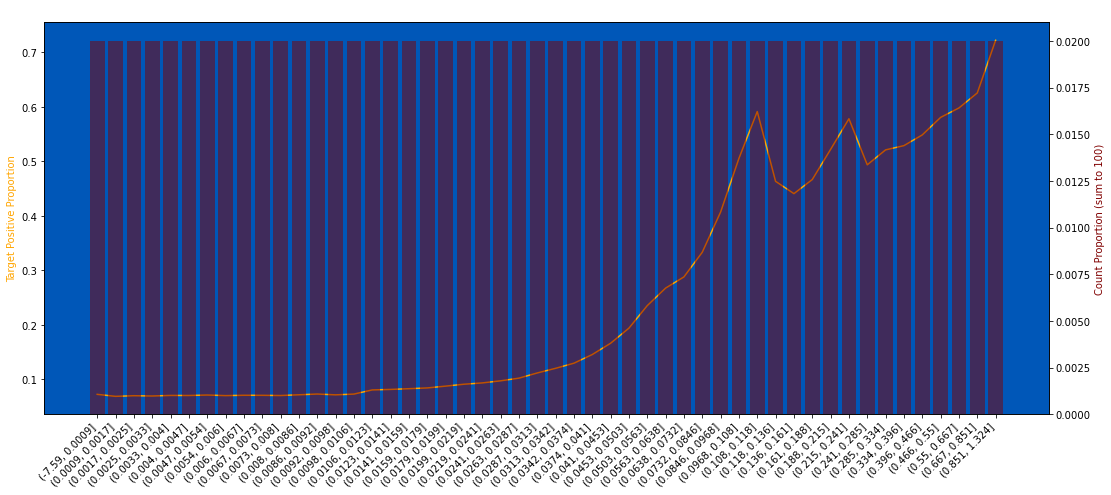

In [17]:
plot_target_check(train, "B_1", q=50, use_raw_bin=True)

In [18]:
%%time
df_list = round_dfs(df_list, col="B_1", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 362 ms, sys: 1.29 s, total: 1.65 s
Wall time: 2.57 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


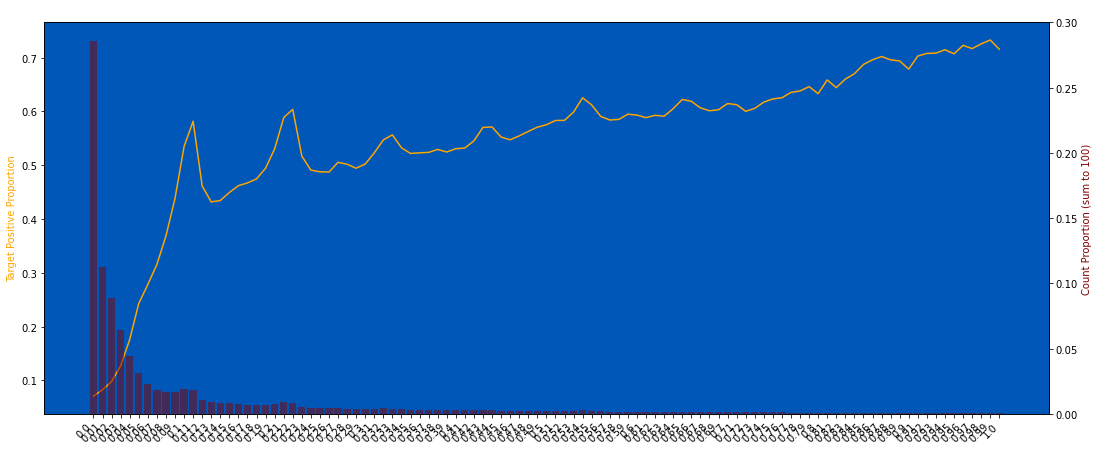

In [19]:
plot_target_check(train, "B_1", q=100, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

**ToDo:**
- Need to investigate why there is spike (with pattern), on 0.11, 0.22, 0.33, 0.44...?

Bottom 1% and Top 1% are dropped from this chart


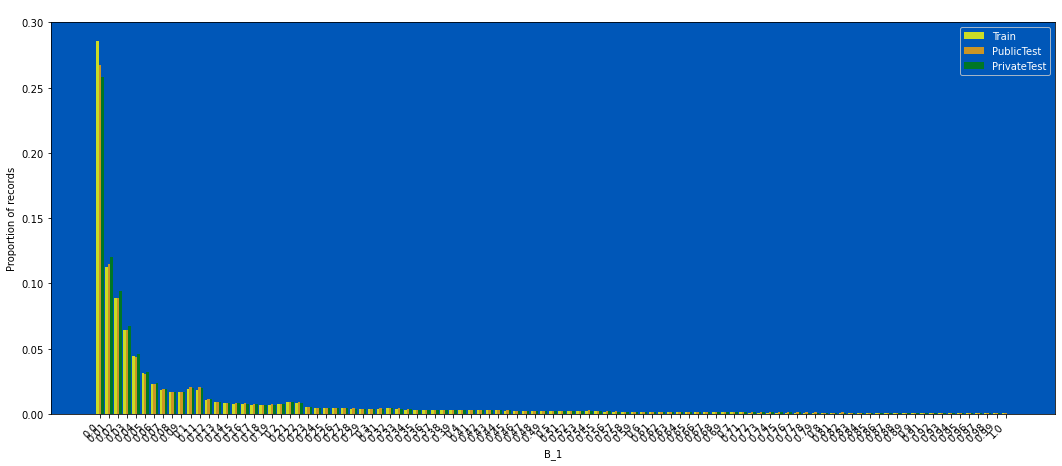

In [20]:
plot_train_test_distribution(df_list, "B_1", nunique_thr=8000)

### B_2

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


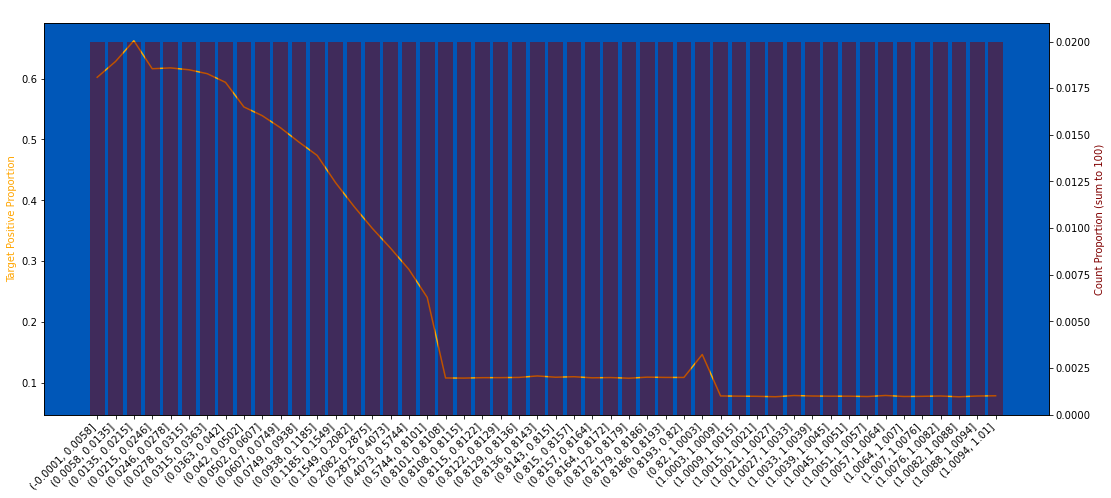

In [21]:
plot_target_check(train, "B_2", q=50, use_raw_bin=True)

In [22]:
%%time
df_list = round_dfs(df_list, col="B_2", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 352 ms, sys: 970 ms, total: 1.32 s
Wall time: 2.24 s


2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


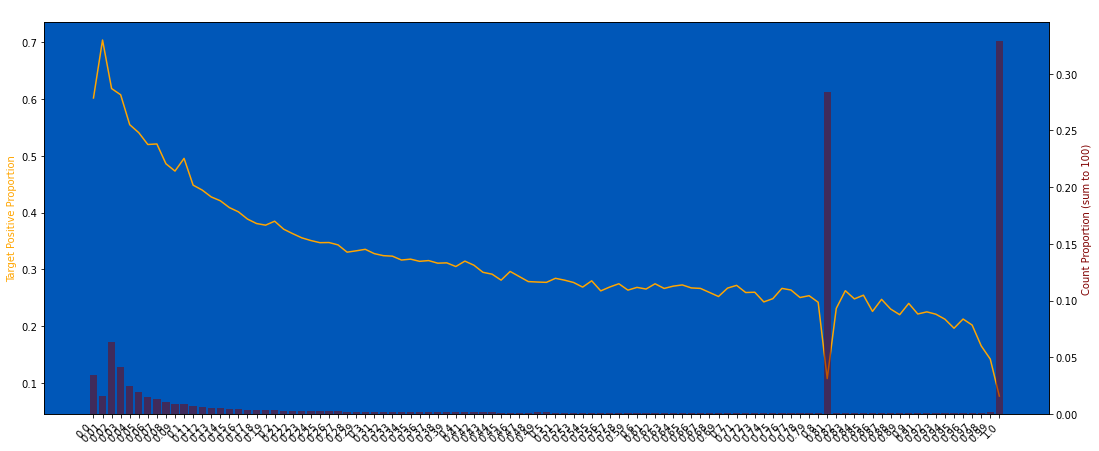

In [23]:
plot_target_check(train, "B_2", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

**ToDo:**
- Need to investigate why there are throughs (with pattern), on 0.81 and 1.0
  - They take about 60% of the observation, while dragging the whole trend down to about 1x %, which is significant lower than global average (25%)

Bottom 1% and Top 1% are dropped from this chart


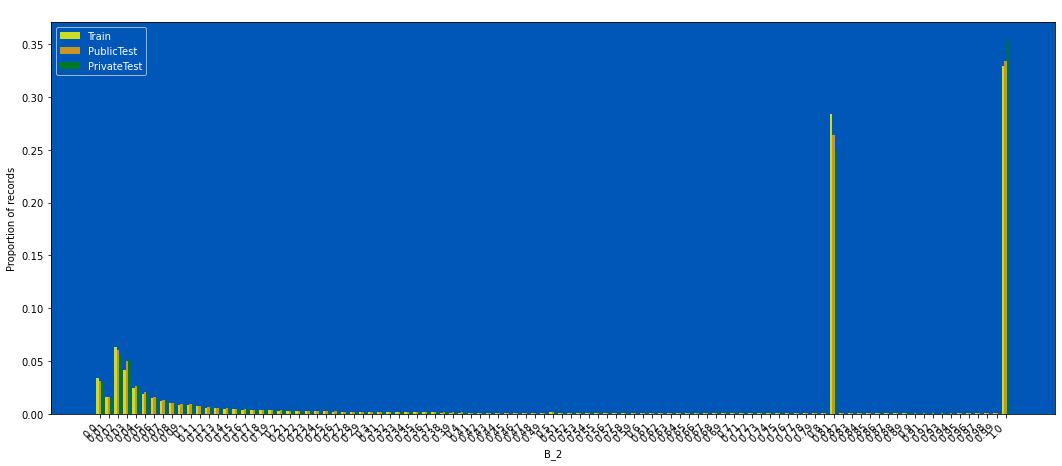

In [24]:
plot_train_test_distribution(df_list, "B_2", nunique_thr=8000)

### B_3

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


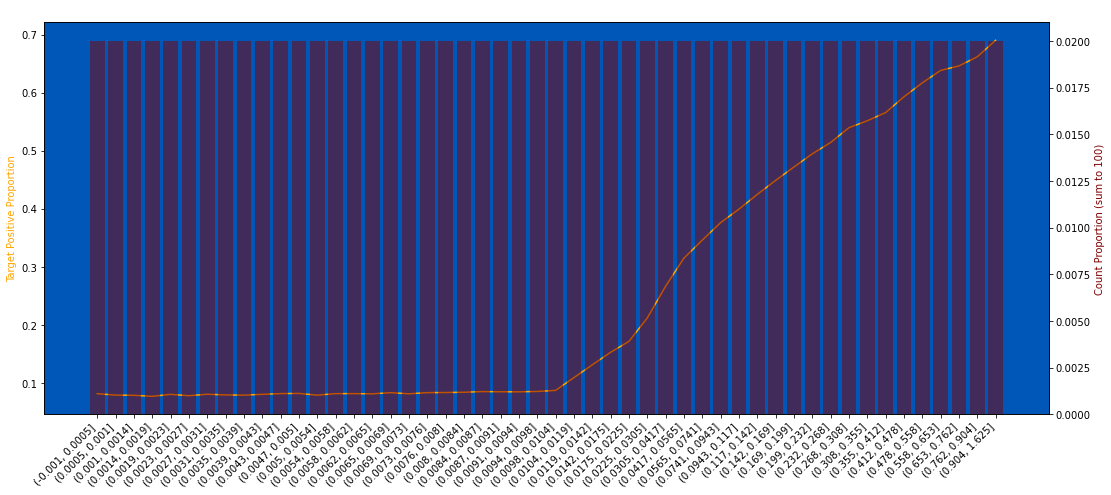

In [25]:
plot_target_check(train, "B_3", q=50, use_raw_bin=True)

In [26]:
%%time
df_list = round_dfs(df_list, col="B_3", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 336 ms, sys: 986 ms, total: 1.32 s
Wall time: 2.26 s


2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


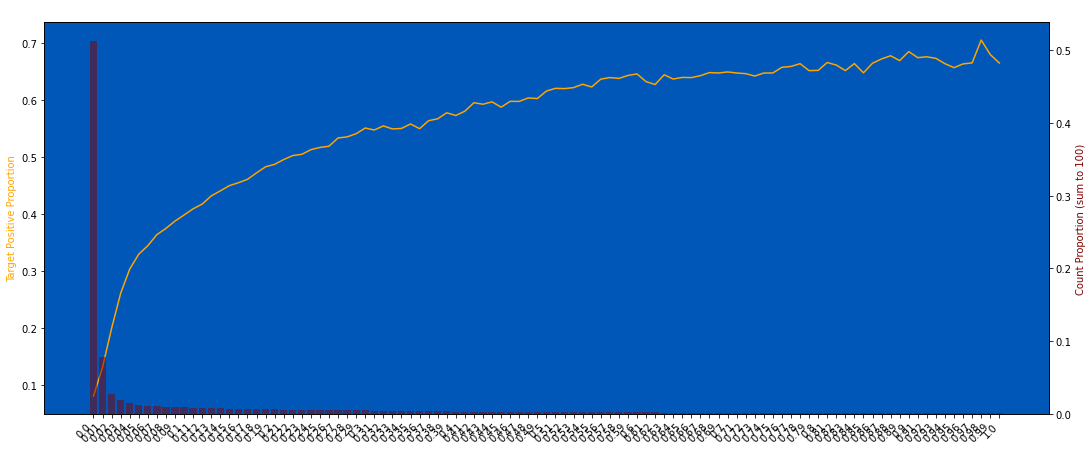

In [27]:
plot_target_check(train, "B_3", q=50, use_raw_bin=True, nunique_thr=8000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


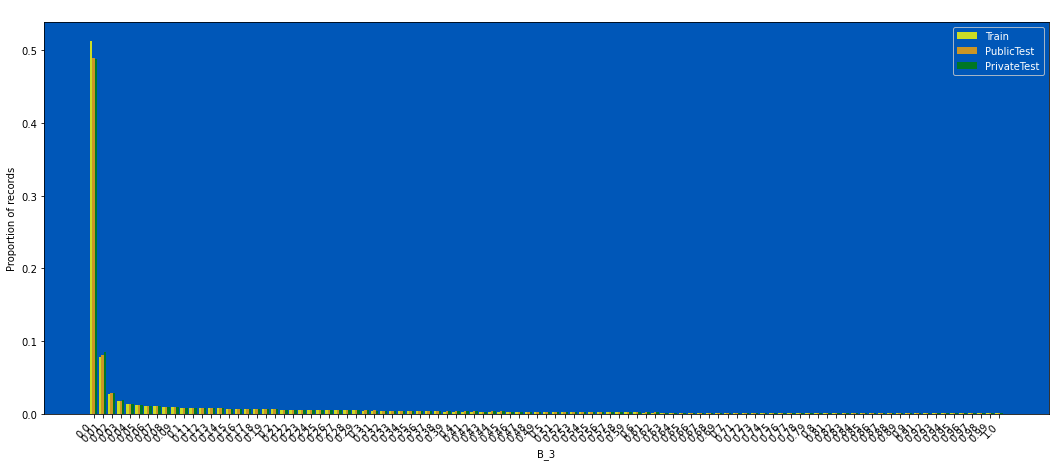

In [28]:
plot_train_test_distribution(df_list, "B_3", nunique_thr=8000)

### B_4

0 null count, 0.000 null proportion
nan of the targets have label = 1


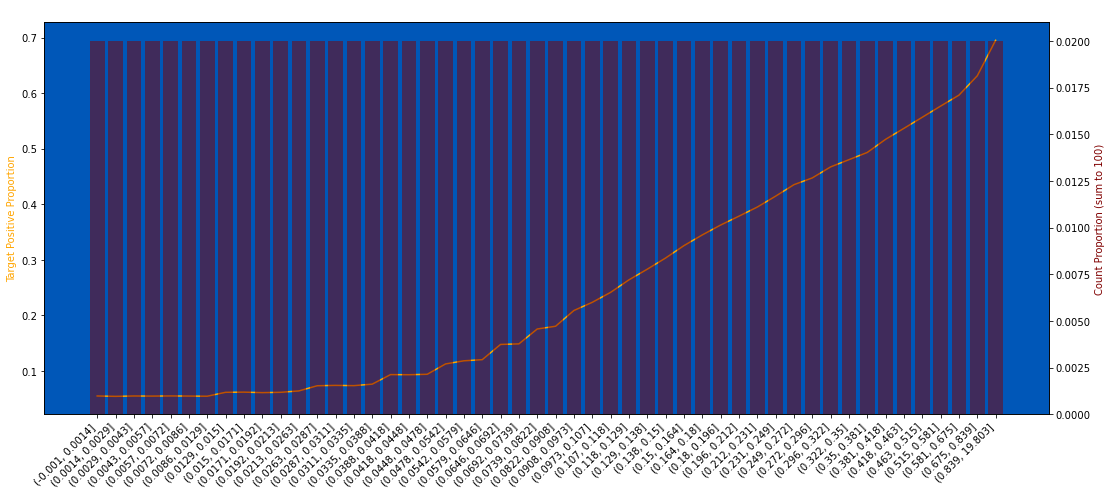

In [29]:
plot_target_check(train, "B_4", q=50, use_raw_bin=True, nunique_thr=1000)

In [30]:
%%time
df_list = round_dfs(df_list, col="B_4", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 343 ms, sys: 1.04 s, total: 1.38 s
Wall time: 2.29 s


Bottom 1% and Top 1% are dropped from this chart


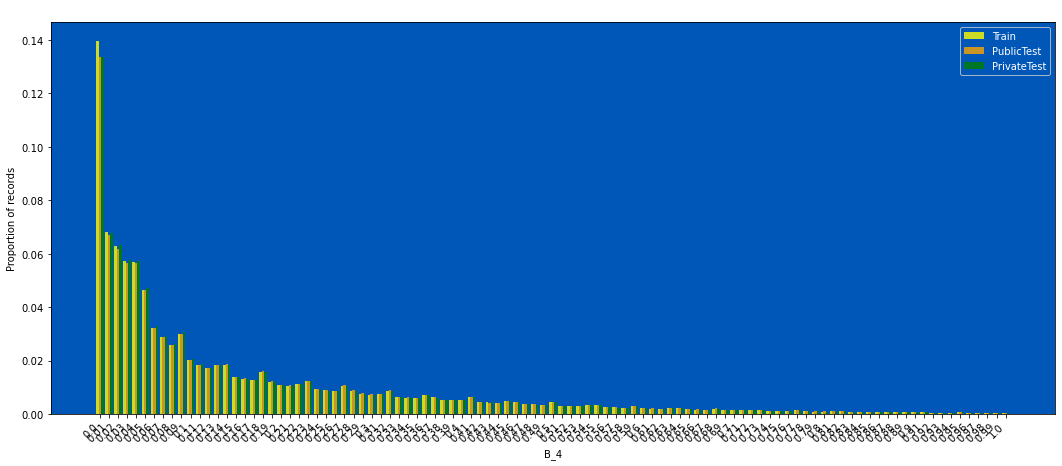

In [31]:
plot_train_test_distribution(df_list, "B_4", nunique_thr=8000)

### B_5

0 null count, 0.000 null proportion
nan of the targets have label = 1


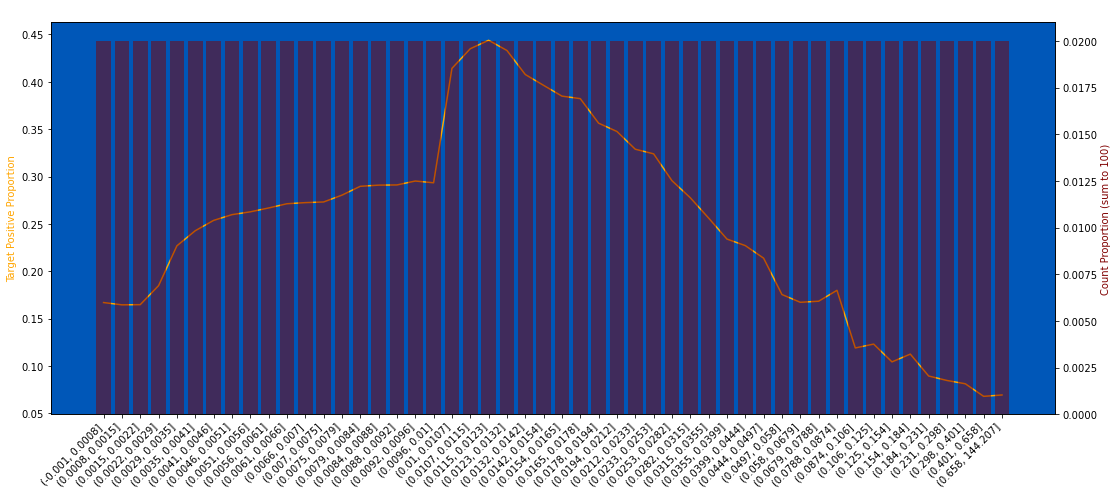

In [32]:
plot_target_check(train, "B_5", q=50, use_raw_bin=True)

In [33]:
%%time
df_list = round_dfs(df_list, col="B_5", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 359 ms, sys: 1.09 s, total: 1.45 s
Wall time: 2.38 s


In [34]:
# df_list = fill_nans(df_list, col="B_5", tuple_of_values=(0), add_new_col=False)

0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


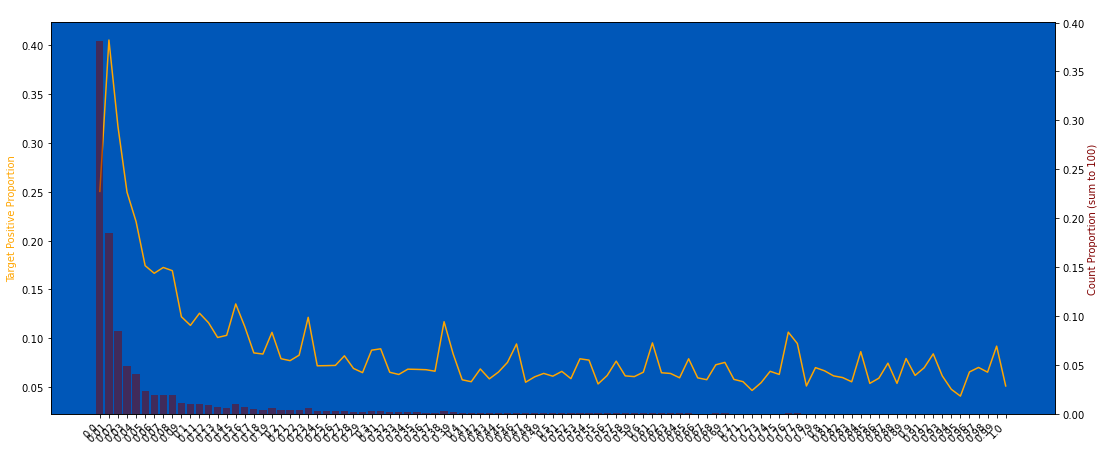

In [35]:
plot_target_check(train, "B_5", q=50, use_raw_bin=True, nunique_thr=8000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


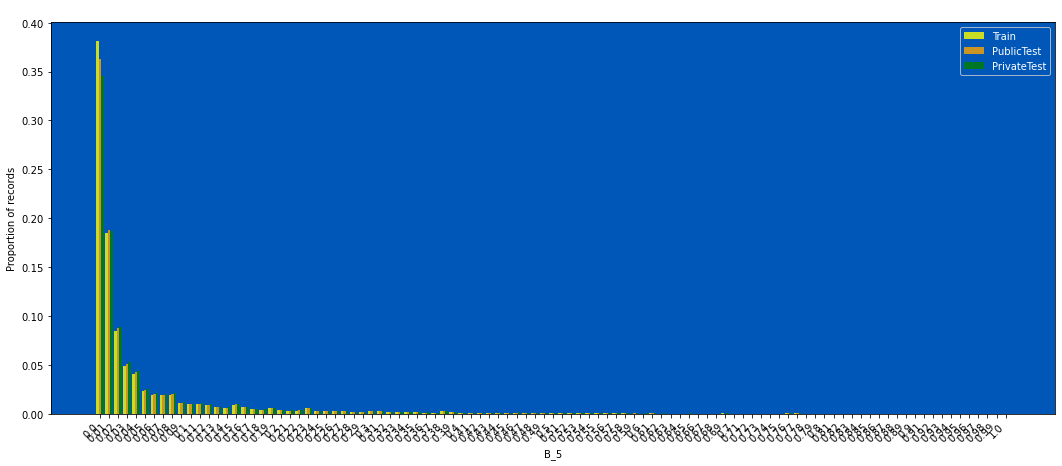

In [36]:
plot_train_test_distribution(df_list, "B_5", nunique_thr=8000)

### B_6

233 null count, 0.000 null proportion
0.2532 of the targets have label = 1


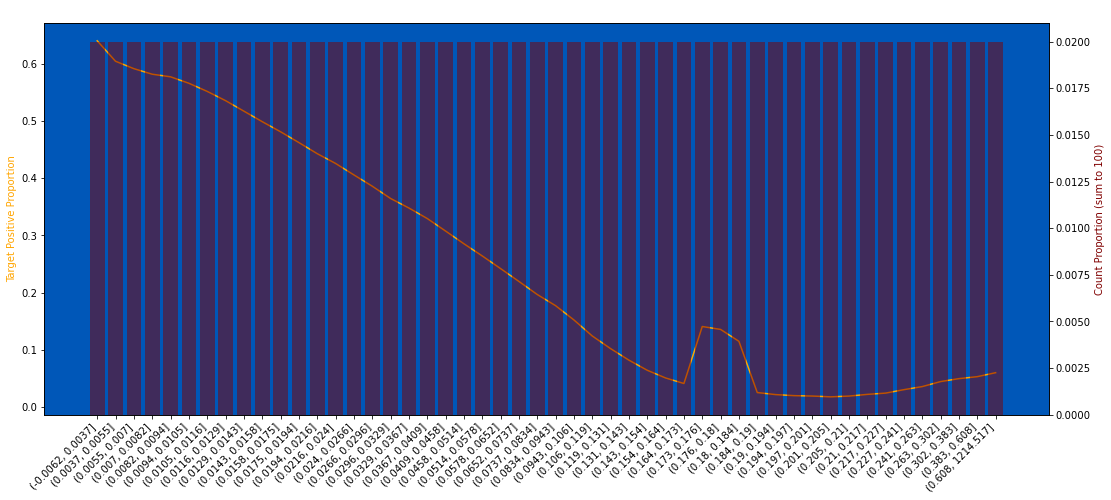

In [37]:
plot_target_check(train, "B_6", q=50, use_raw_bin=True)

In [38]:
%%time
df_list = round_dfs(df_list, col="B_6", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 346 ms, sys: 1.11 s, total: 1.46 s
Wall time: 2.38 s


233 null count, 0.000 null proportion
0.2532 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


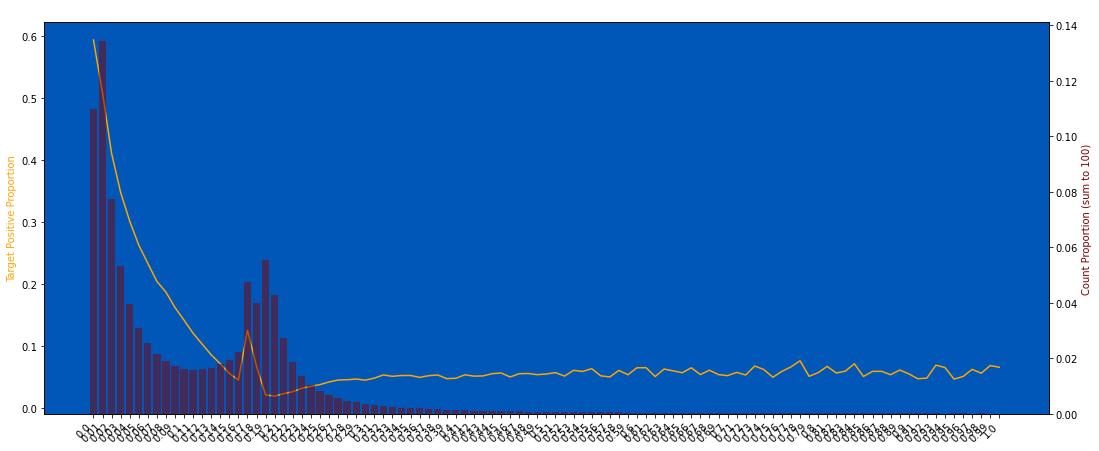

In [39]:
plot_target_check(train, "B_6", q=50, use_raw_bin=True, nunique_thr=7200, strfy_x=True)

**ToDo:**
- Need to investigate why there is a spike (which doesn't follow the trend), on 0.18 & 0.19
- Also, this variable has multi-peaks, would that be the root cause

Bottom 1% and Top 1% are dropped from this chart


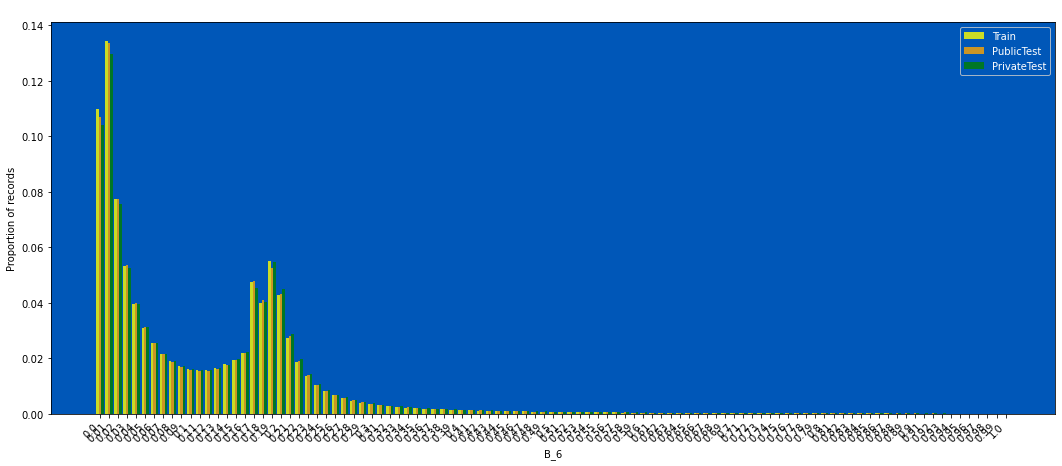

In [40]:
plot_train_test_distribution(df_list, "B_6", nunique_thr=8000)

### B_7

0 null count, 0.000 null proportion
nan of the targets have label = 1


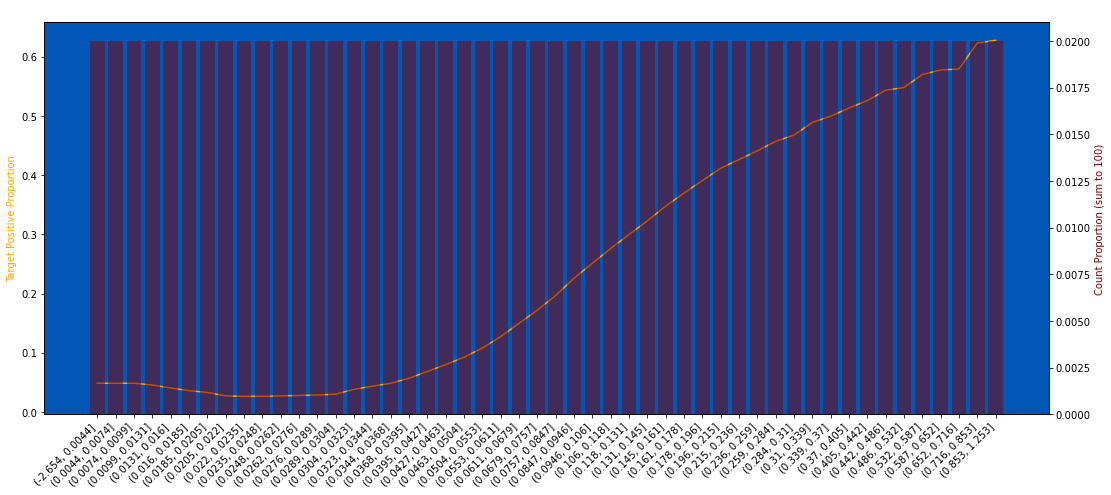

In [41]:
plot_target_check(train, "B_7", q=50, use_raw_bin=True)

In [42]:
%%time
df_list = round_dfs(df_list, col="B_7", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 349 ms, sys: 1.17 s, total: 1.52 s
Wall time: 2.44 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


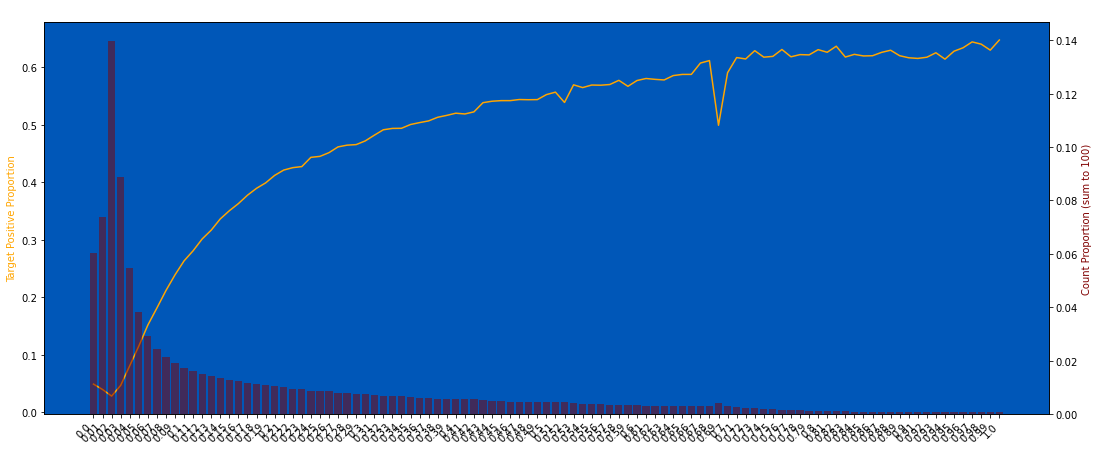

In [43]:
plot_target_check(train, "B_7", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


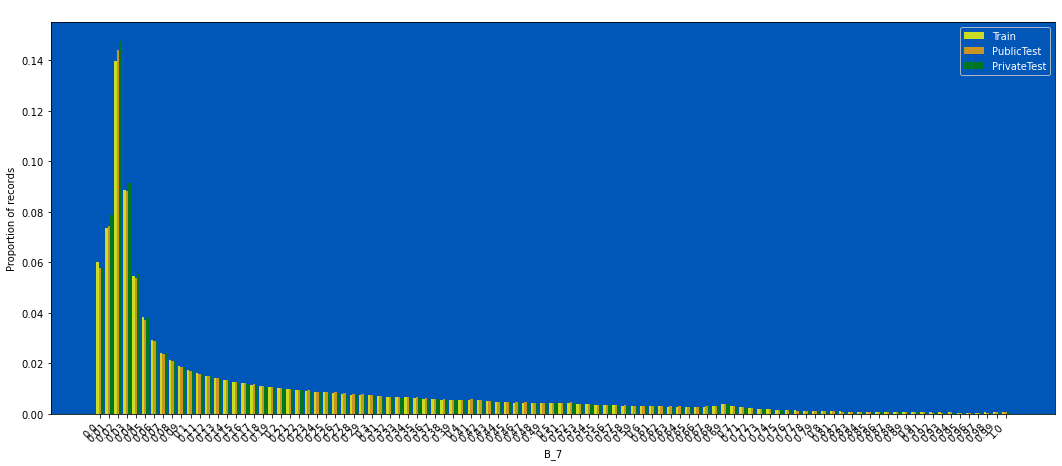

In [44]:
plot_train_test_distribution(df_list, "B_7", nunique_thr=8000)

### B_8

22268 null count, 0.004 null proportion
0.3044 of the targets have label = 1


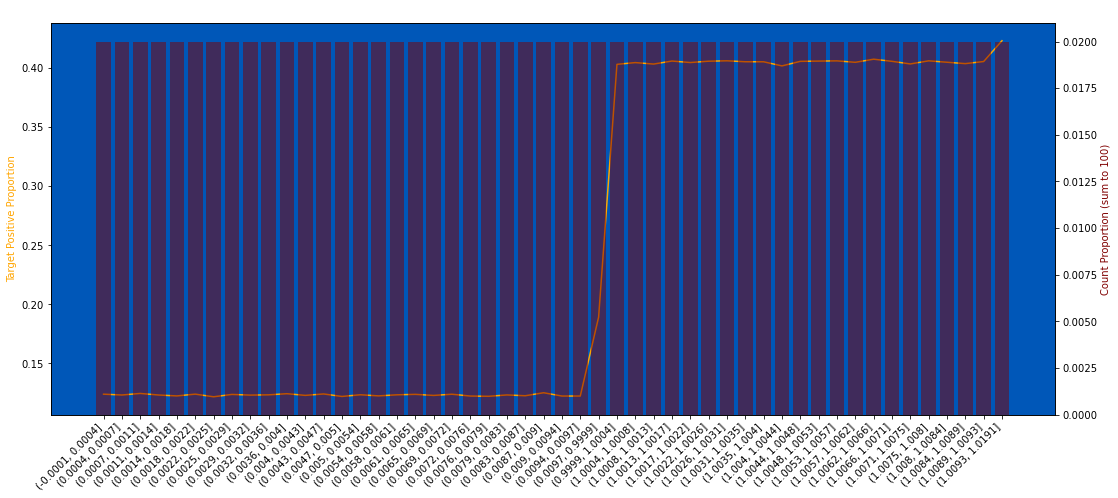

In [45]:
plot_target_check(train, "B_8", q=50, use_raw_bin=True)

In [46]:
%%time
df_list = round_dfs(df_list, col="B_8", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 310 ms, sys: 1.13 s, total: 1.44 s
Wall time: 2.37 s


In [47]:
train.groupby(["B_8"])["target"].mean()

B_8
0.0000   0.1233
0.9900   0.3732
1.0000   0.4057
1.0100   0.6547
Name: target, dtype: float64

In [48]:
for df in df_list:
    df["B_8"] = df["B_8"].round(0)

22268 null count, 0.004 null proportion
0.3044 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


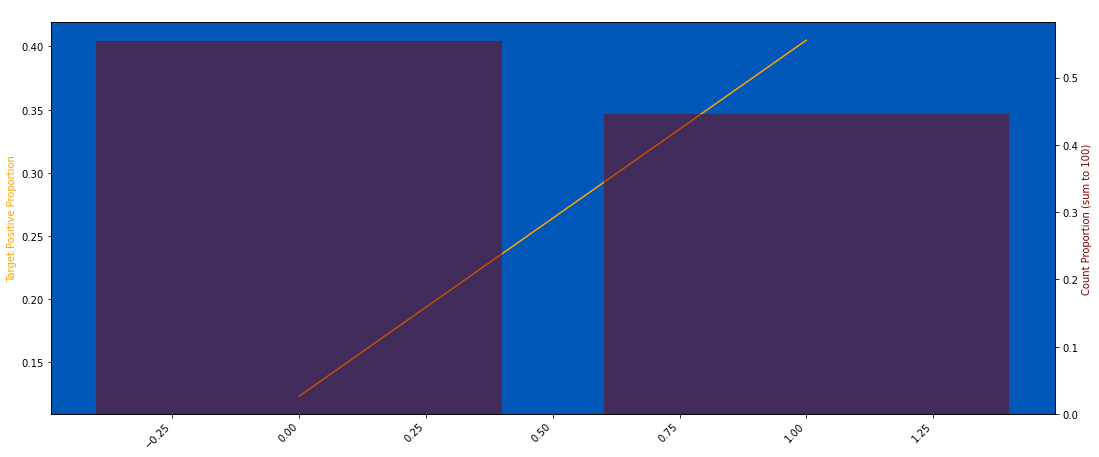

In [49]:
plot_target_check(train, "B_8", q=50, use_raw_bin=True)

Bottom 1% and Top 1% are dropped from this chart


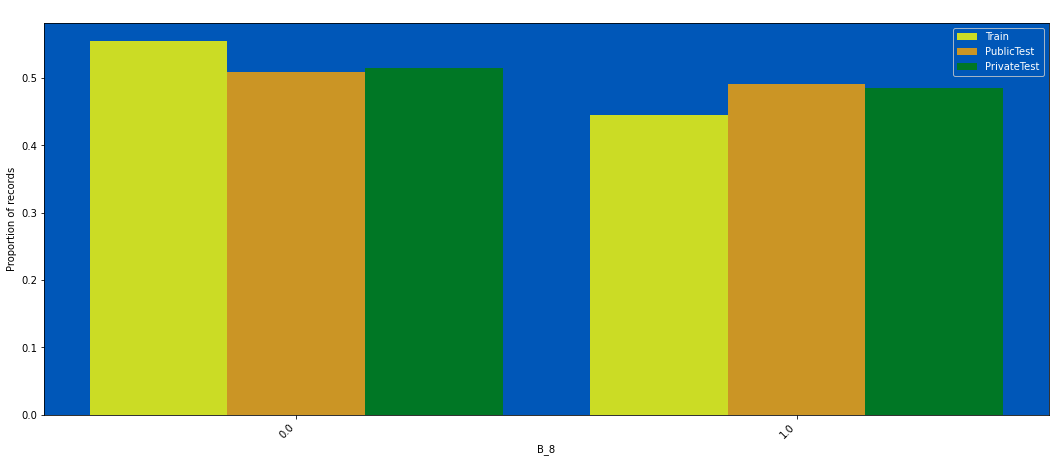

In [50]:
plot_train_test_distribution(df_list, "B_8", nunique_thr=8000)

### B_9

0 null count, 0.000 null proportion
nan of the targets have label = 1


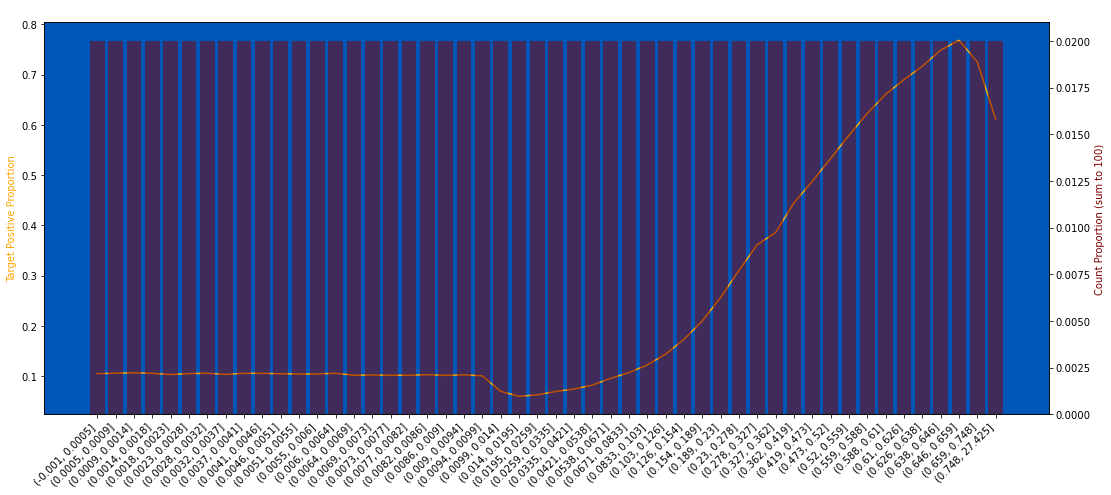

In [51]:
plot_target_check(train, "B_9", q=50, use_raw_bin=True)

In [52]:
%%time
df_list = round_dfs(df_list, col="B_9", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 326 ms, sys: 1.17 s, total: 1.49 s
Wall time: 2.46 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


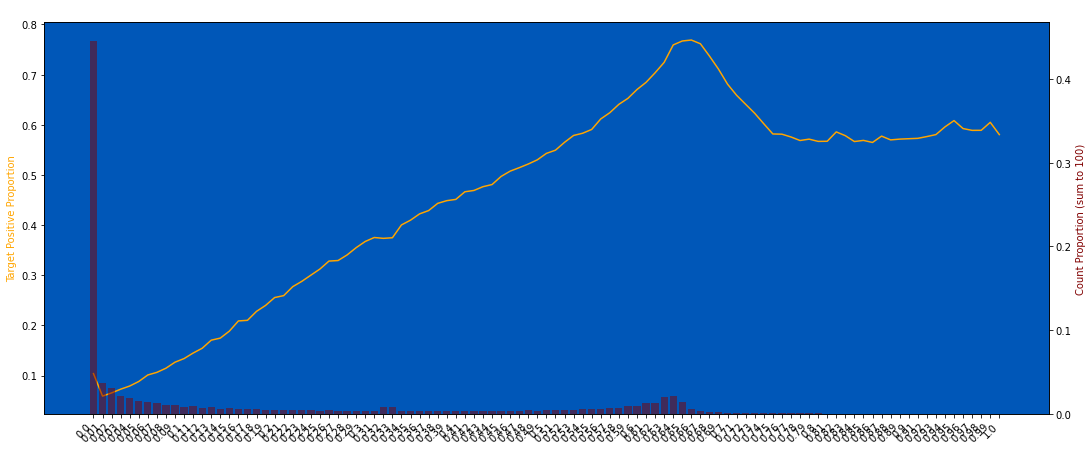

In [53]:
plot_target_check(train, "B_9", q=50, use_raw_bin=True, nunique_thr=3000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


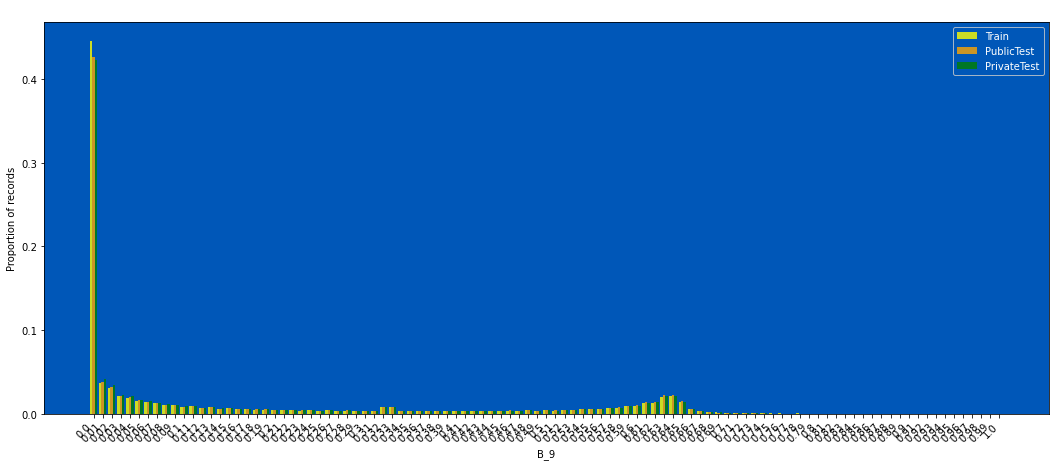

In [54]:
plot_train_test_distribution(df_list, "B_9", nunique_thr=8000)

### B_10

0 null count, 0.000 null proportion
nan of the targets have label = 1


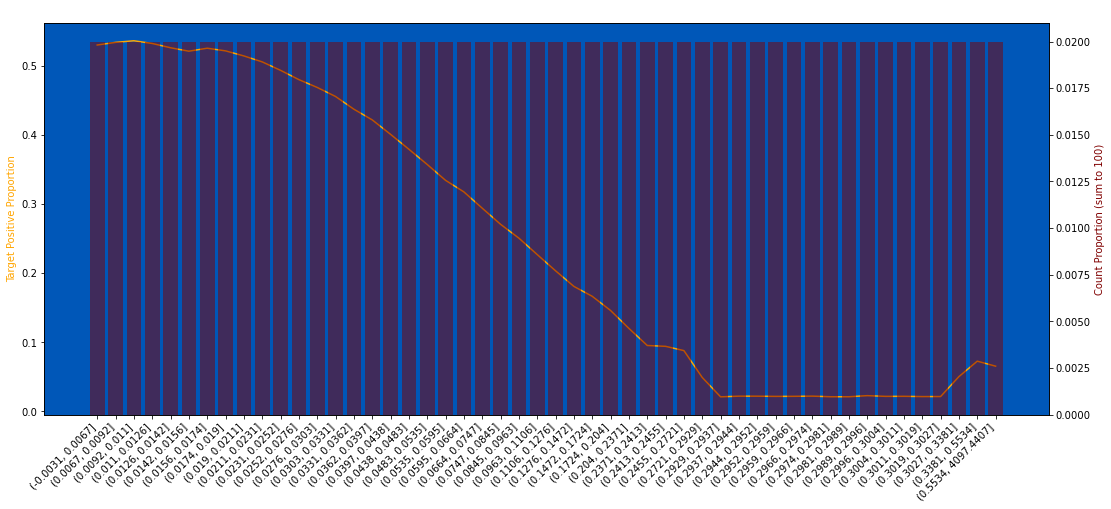

In [55]:
plot_target_check(train, "B_10", q=50, use_raw_bin=True)

In [56]:
%%time
df_list = round_dfs(df_list, col="B_10", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 357 ms, sys: 1.19 s, total: 1.55 s
Wall time: 2.47 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


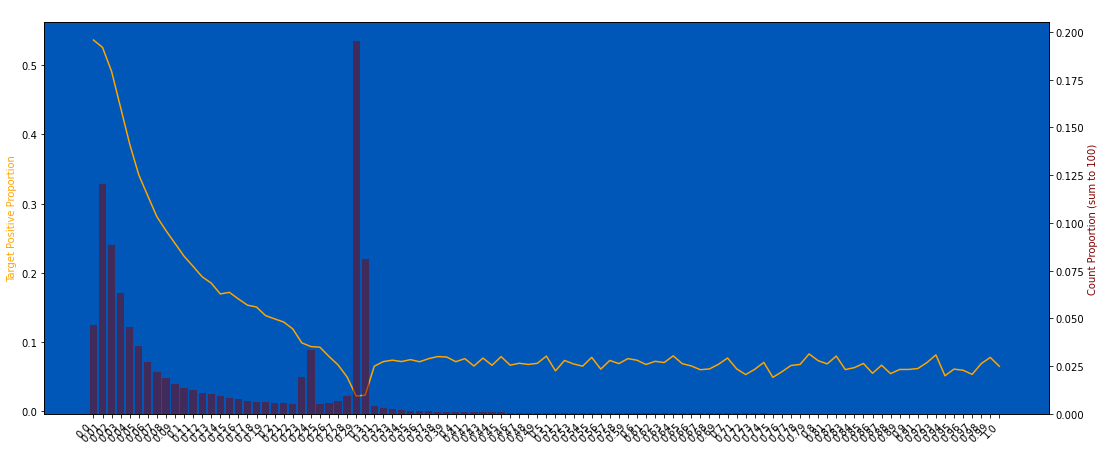

In [57]:
b10_summary = plot_target_check(train, "B_10", q=50, use_raw_bin=True, nunique_thr=7000, strfy_x=True, return_df=True)

Bottom 1% and Top 1% are dropped from this chart


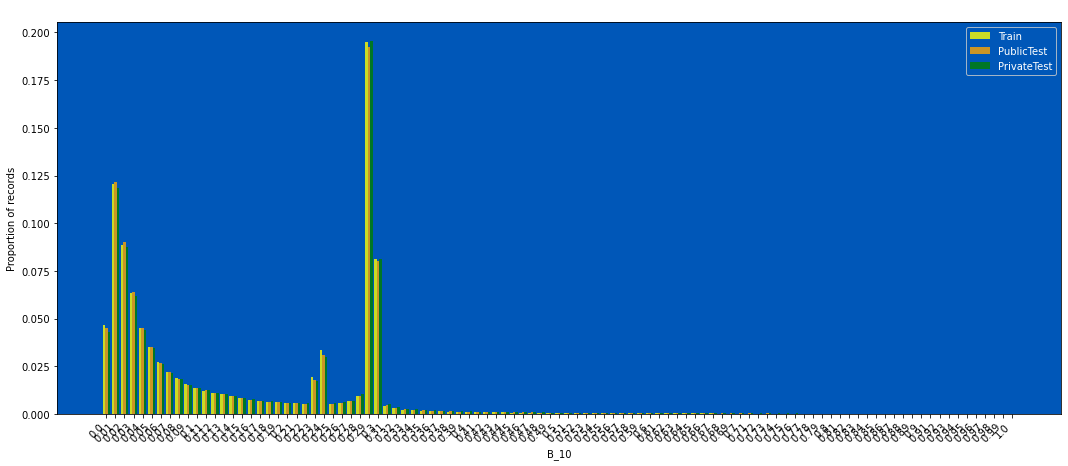

In [58]:
plot_train_test_distribution(df_list, "B_10", nunique_thr=8000)

### B_11

0 null count, 0.000 null proportion
nan of the targets have label = 1


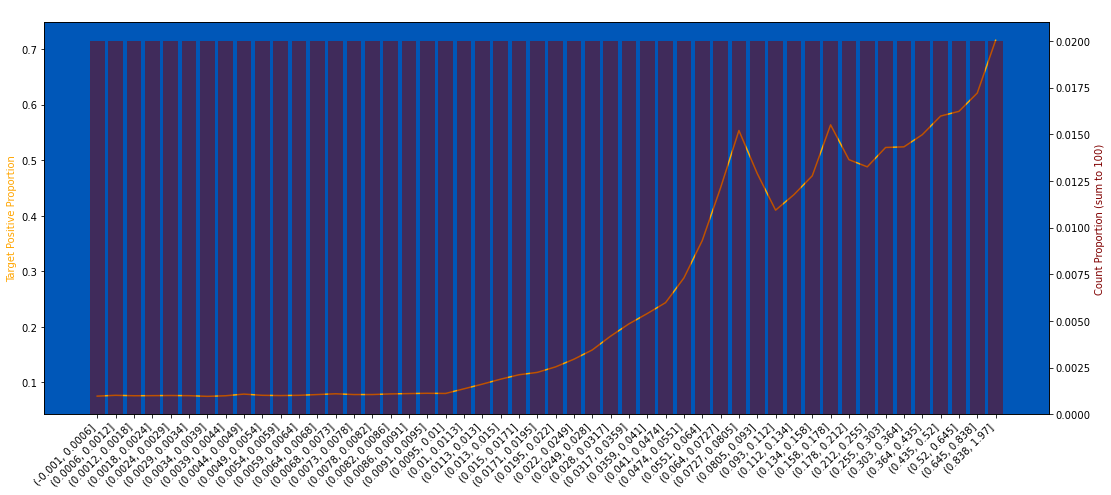

In [59]:
plot_target_check(train, "B_11", q=50, use_raw_bin=True)

In [60]:
%%time
df_list = round_dfs(df_list, col="B_11", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 350 ms, sys: 1.18 s, total: 1.53 s
Wall time: 2.47 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


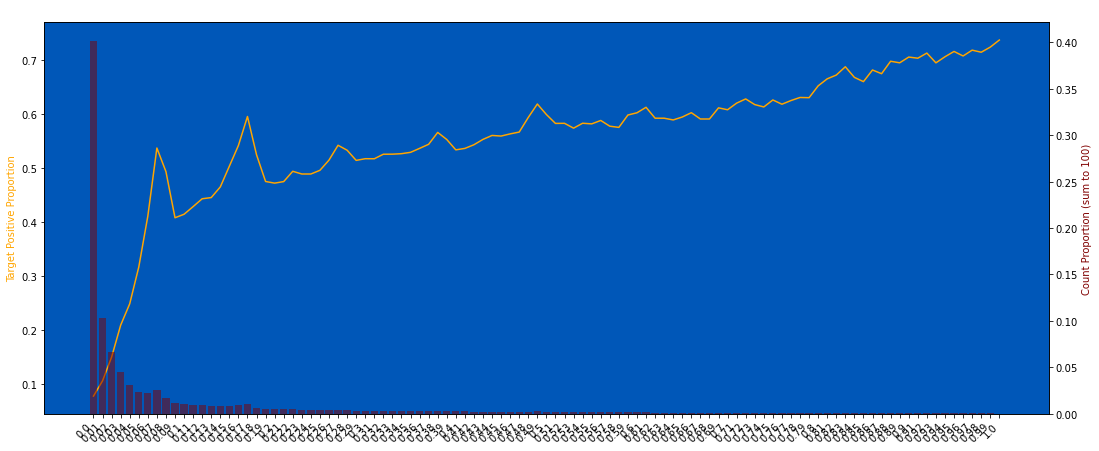

In [61]:
plot_target_check(train, "B_11", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


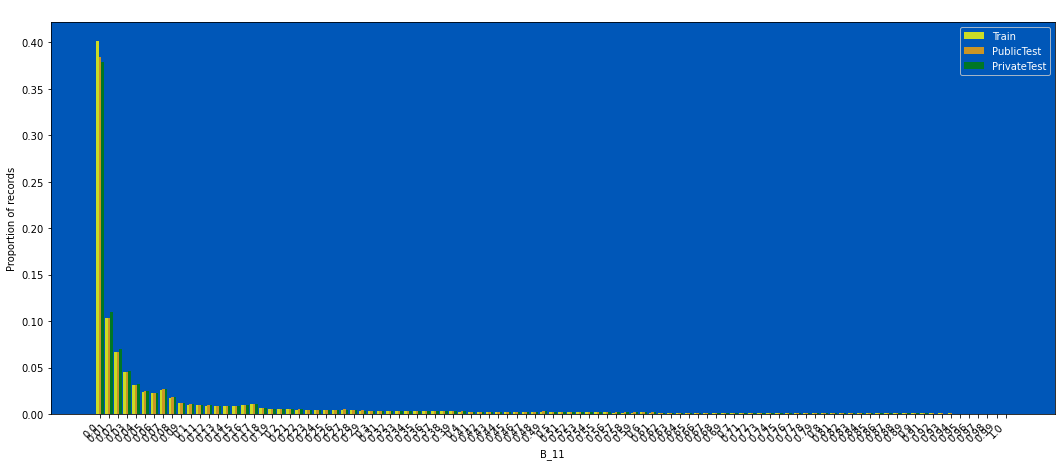

In [62]:
plot_train_test_distribution(df_list, "B_11", nunique_thr=8000)

### B_12

0 null count, 0.000 null proportion
nan of the targets have label = 1


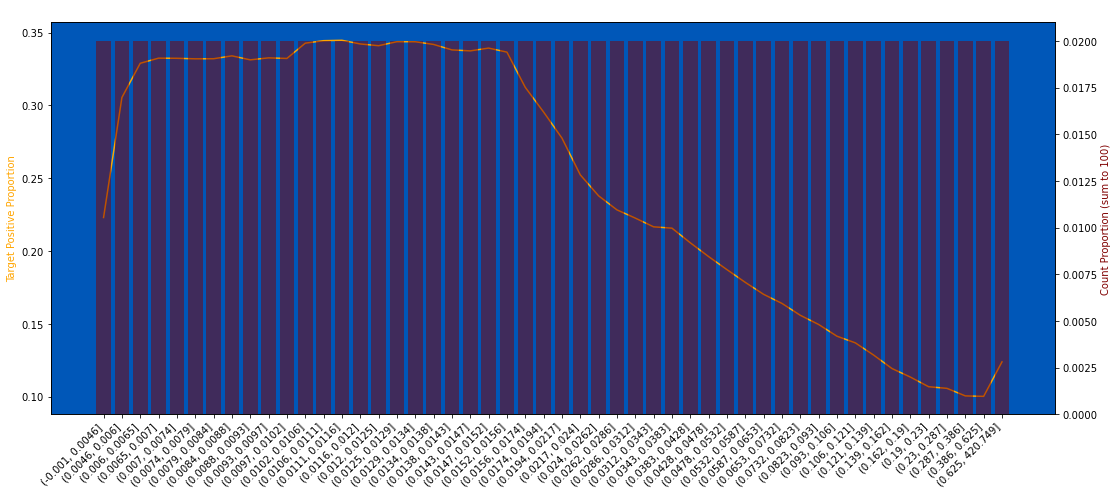

In [63]:
plot_target_check(train, "B_12", q=50, use_raw_bin=True)

In [64]:
%%time
df_list = round_dfs(df_list, col="B_12", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 350 ms, sys: 1.21 s, total: 1.56 s
Wall time: 2.49 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


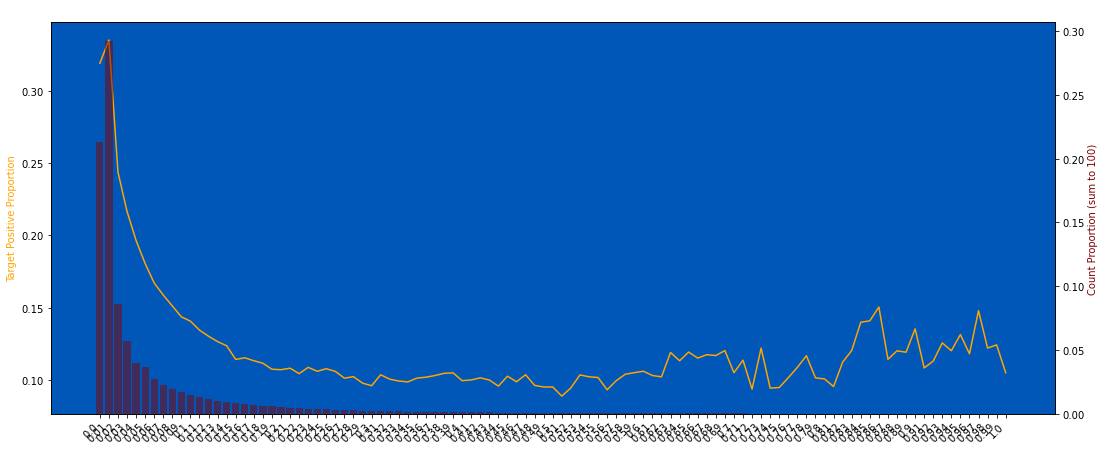

In [65]:
plot_target_check(train, "B_12", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


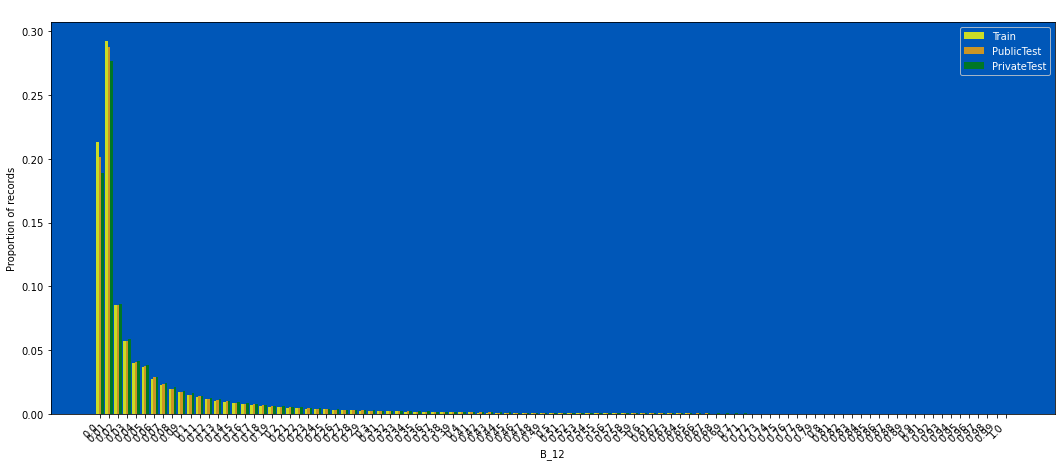

In [66]:
plot_train_test_distribution(df_list, "B_12", nunique_thr=8000)

### B_13

49519 null count, 0.009 null proportion
0.4906 of the targets have label = 1


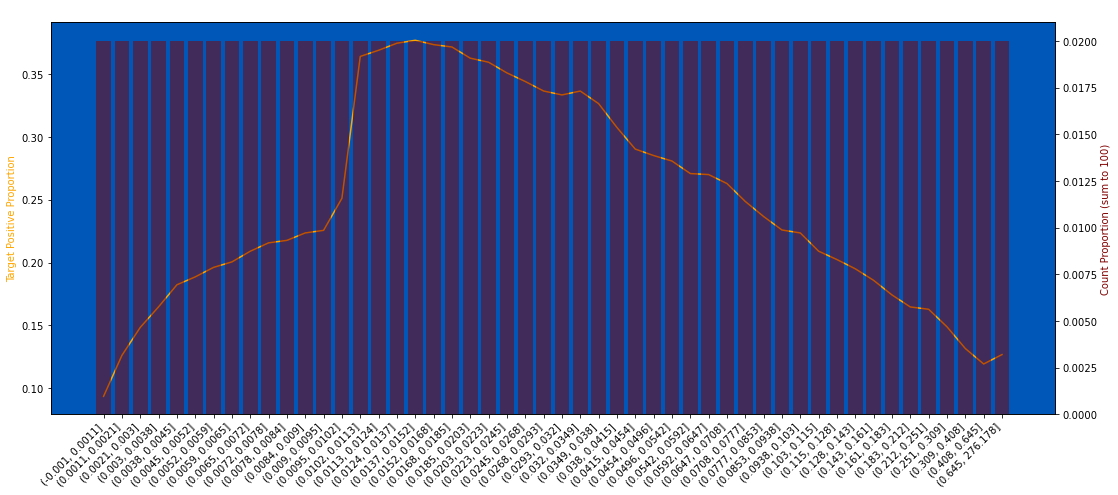

In [67]:
plot_target_check(train, "B_13", q=50, use_raw_bin=True)

In [68]:
%%time
df_list = round_dfs(df_list, col="B_13", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 299 ms, sys: 1.17 s, total: 1.47 s
Wall time: 2.41 s


49519 null count, 0.009 null proportion
0.4906 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


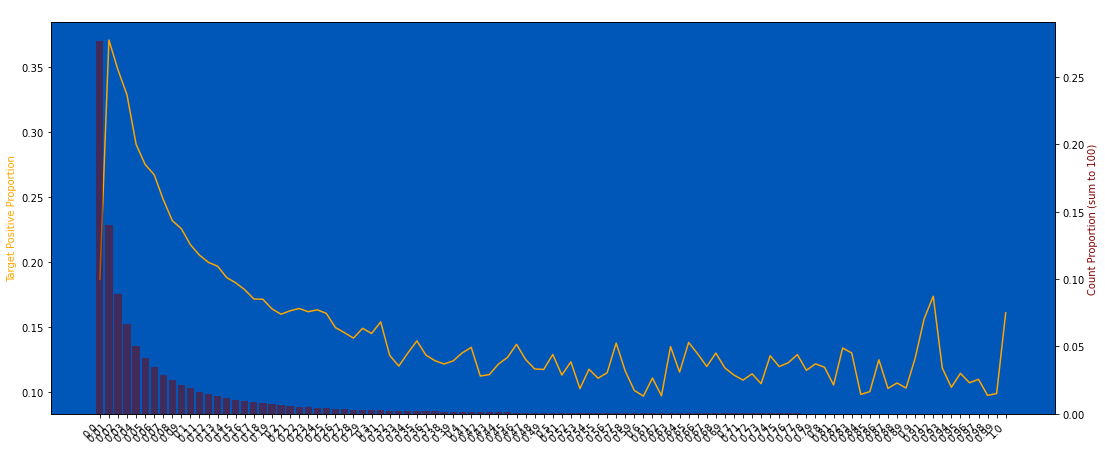

In [69]:
plot_target_check(train, "B_13", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


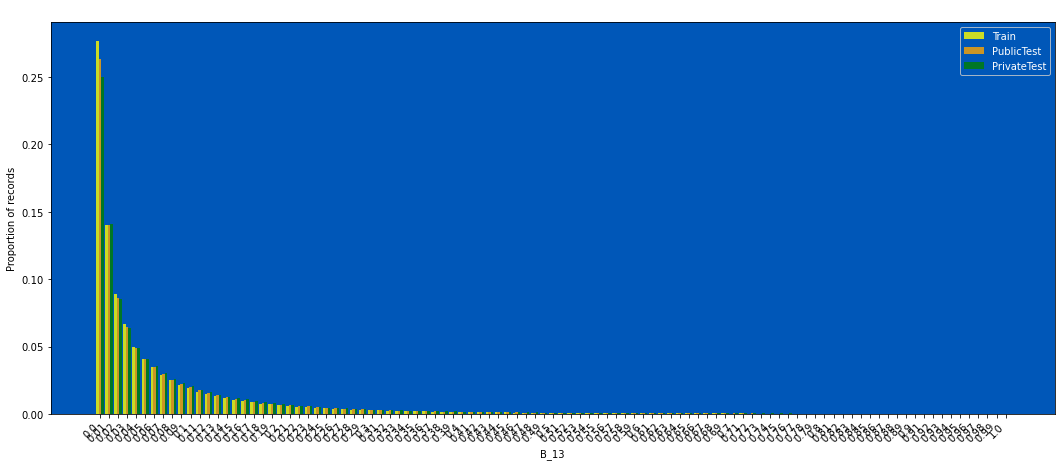

In [70]:
plot_train_test_distribution(df_list, "B_13", nunique_thr=8000)

### B_14

0 null count, 0.000 null proportion
nan of the targets have label = 1


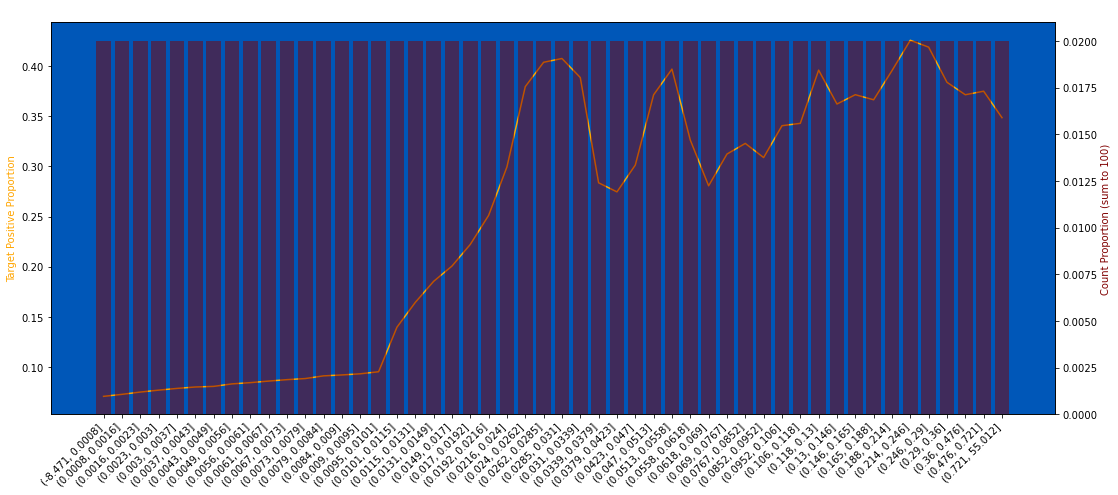

In [71]:
plot_target_check(train, "B_14", q=50, use_raw_bin=True)

In [72]:
%%time
df_list = round_dfs(df_list, col="B_14", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 298 ms, sys: 1.18 s, total: 1.47 s
Wall time: 2.42 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


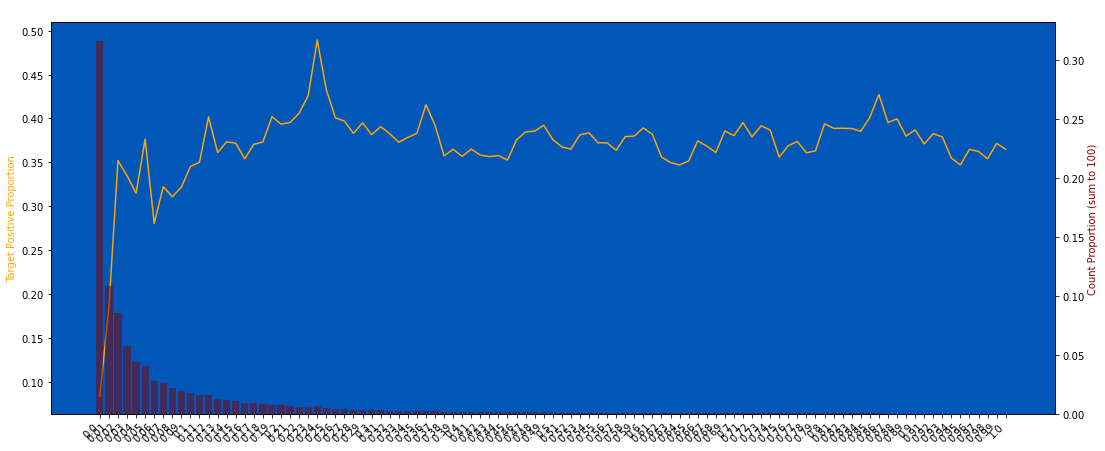

In [73]:
plot_target_check(train, "B_14", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


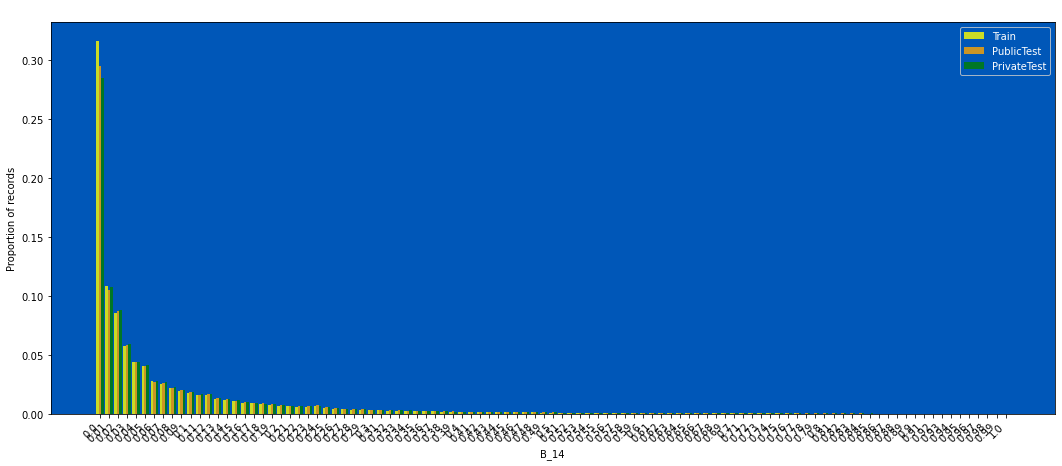

In [74]:
plot_train_test_distribution(df_list, "B_14", nunique_thr=8000)

### B_15

6923 null count, 0.001 null proportion
0.0858 of the targets have label = 1


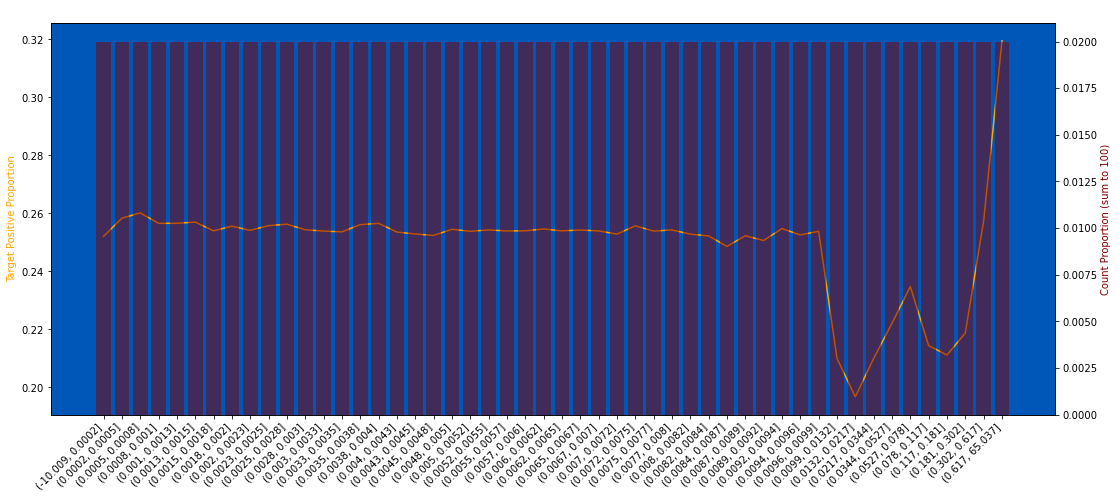

In [75]:
plot_target_check(train, "B_15", q=50, use_raw_bin=True)

In [76]:
%%time
df_list = round_dfs(df_list, col="B_15", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 341 ms, sys: 1.25 s, total: 1.59 s
Wall time: 2.56 s


6923 null count, 0.001 null proportion
0.0858 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


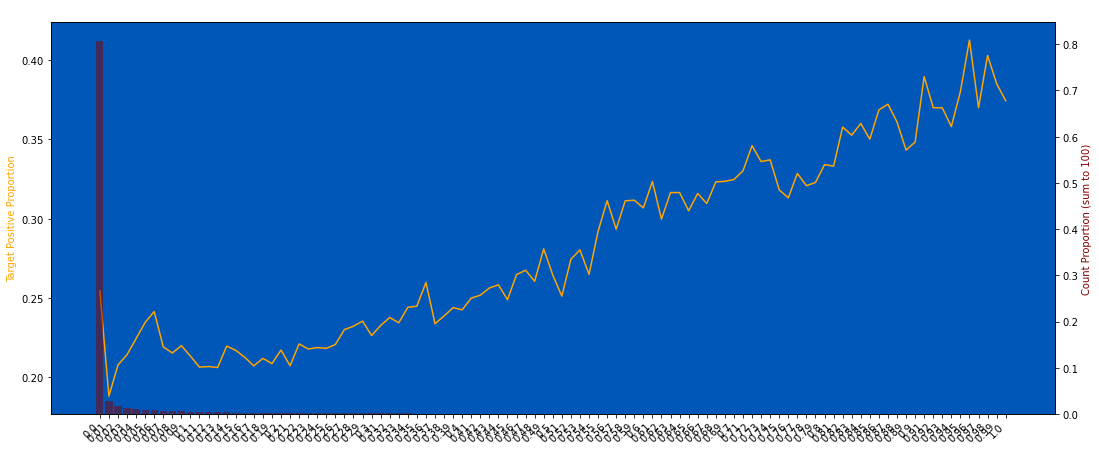

In [77]:
plot_target_check(train, "B_15", q=50, use_raw_bin=True, nunique_thr=3000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


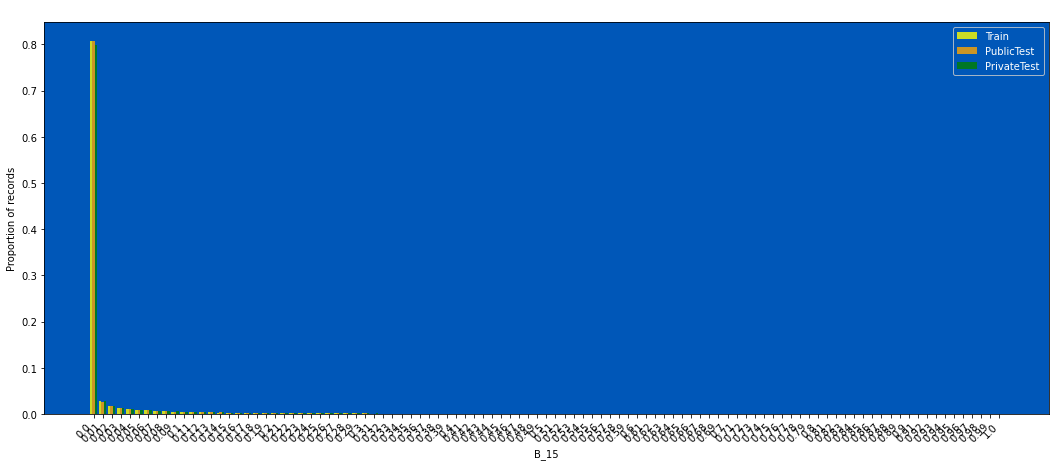

In [78]:
plot_train_test_distribution(df_list, "B_15", nunique_thr=8000)

### B_16

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


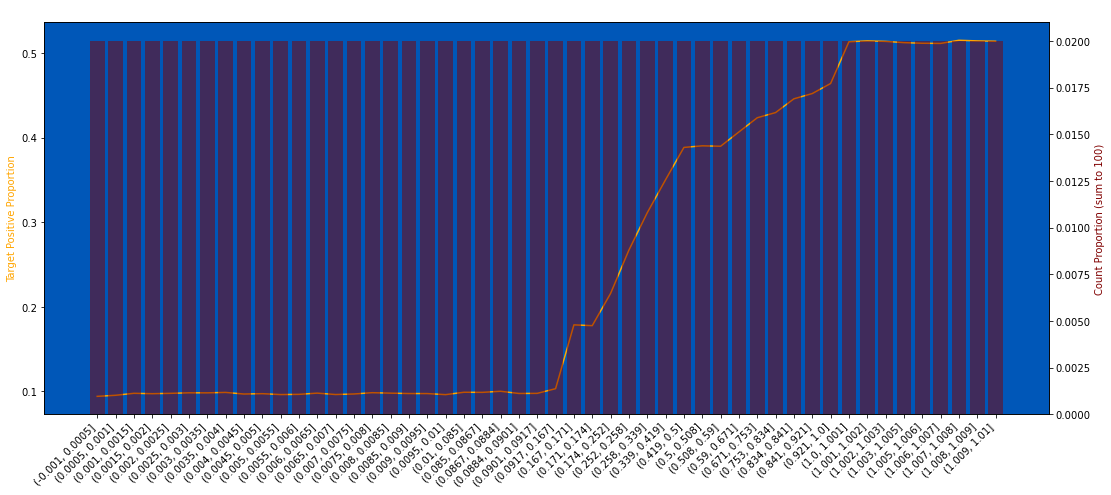

In [79]:
plot_target_check(train, "B_16", q=50, use_raw_bin=True)

In [80]:
%%time
df_list = round_dfs(df_list, col="B_16", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 282 ms, sys: 1.2 s, total: 1.48 s
Wall time: 2.41 s


2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


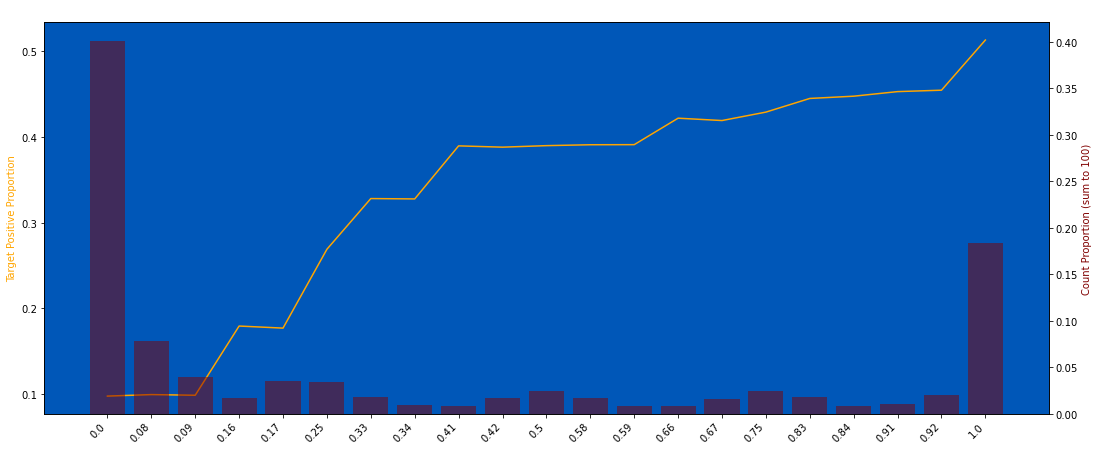

In [81]:
plot_target_check(train, "B_16", q=50, use_raw_bin=True, nunique_thr=3000, strfy_x=True)

In [82]:
for df in df_list:
    df["B_16_"] = (df["B_16"] / 0.083).round(0)

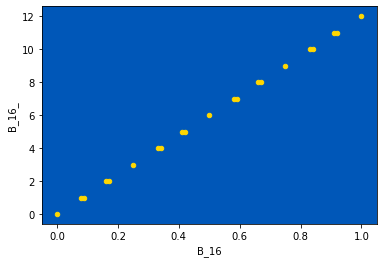

In [83]:
check_binning(train, "B_16", end=1000000)

In [84]:
for df in df_list:
    df["B_16"] = (df["B_16"] / 0.083).round(0)

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


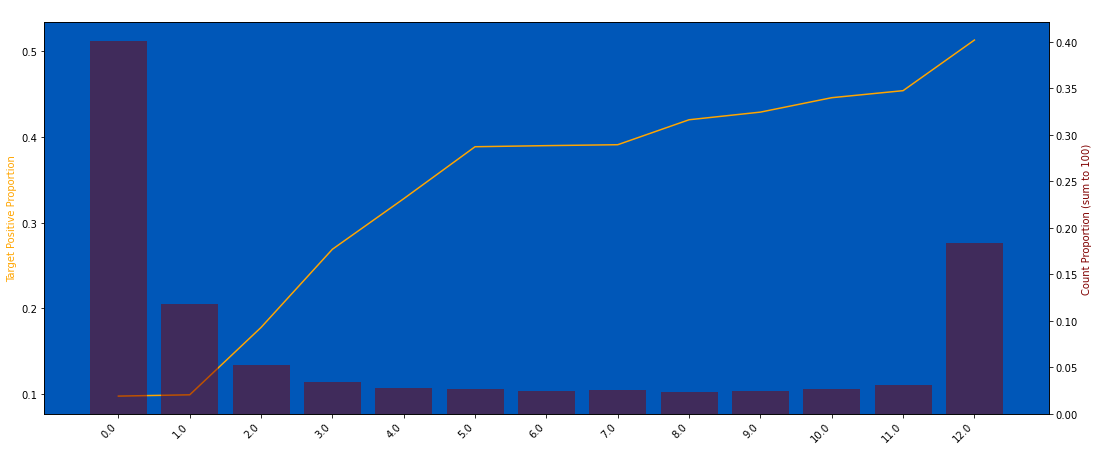

In [85]:
plot_target_check(train, "B_16", q=50, use_raw_bin=True, nunique_thr=3000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


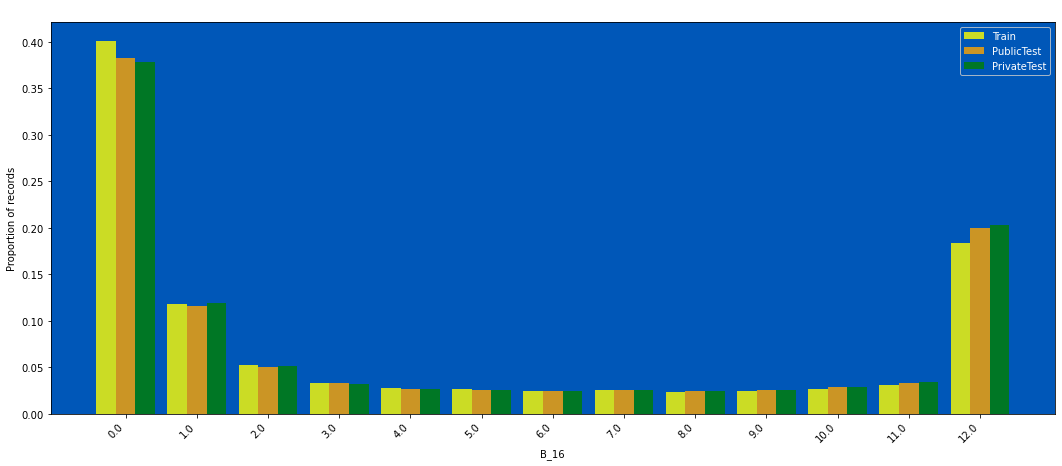

In [86]:
plot_train_test_distribution(df_list, "B_16", nunique_thr=8000)

### B_17

3137598 null count, 0.567 null proportion
0.1226 of the targets have label = 1


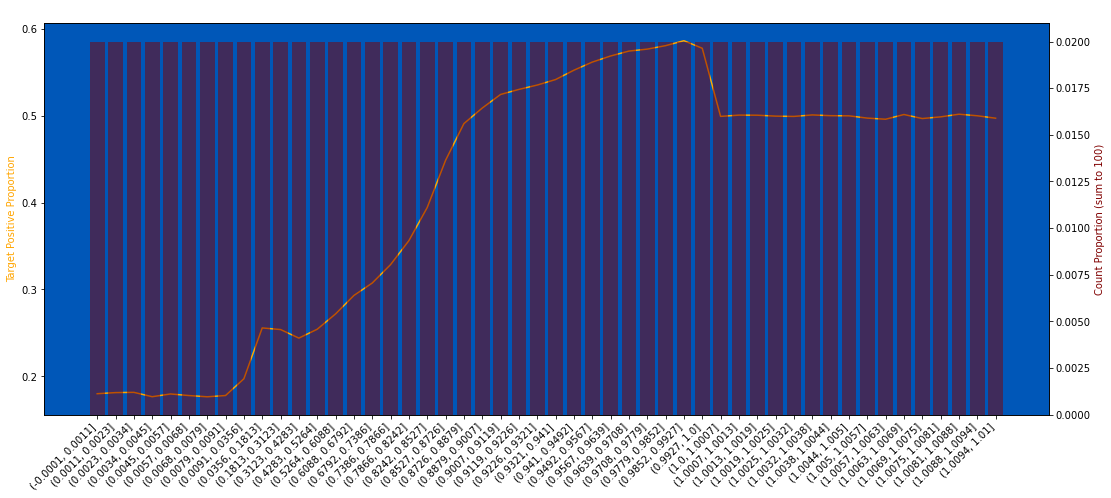

In [87]:
plot_target_check(train, "B_17", q=50, use_raw_bin=True)

In [88]:
%%time
df_list = round_dfs(df_list, col="B_17", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 301 ms, sys: 1.29 s, total: 1.59 s
Wall time: 2.64 s


3137598 null count, 0.567 null proportion
0.1226 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


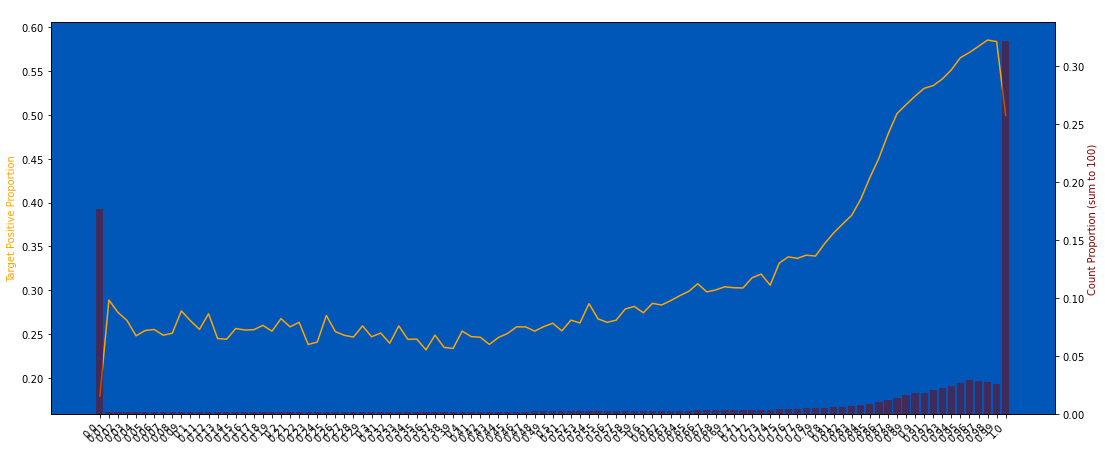

In [89]:
plot_target_check(train, "B_17", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


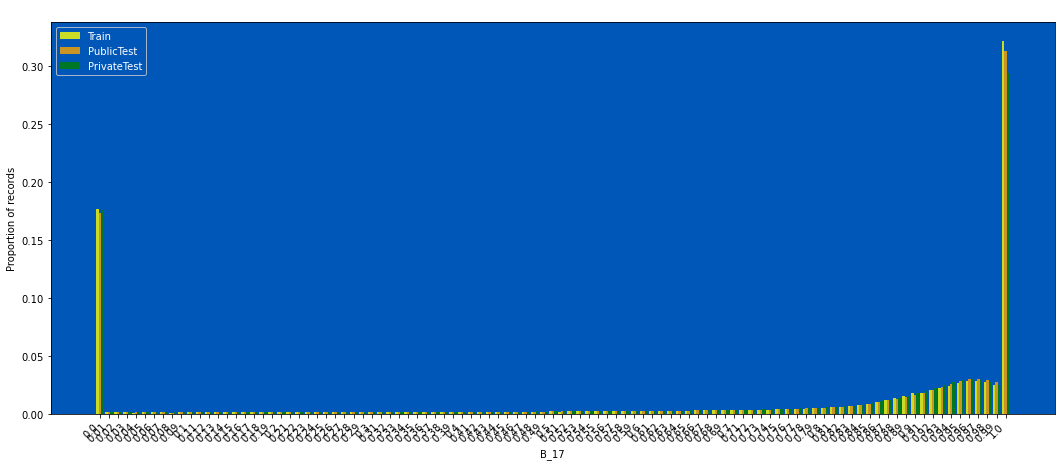

In [90]:
plot_train_test_distribution(df_list, "B_17", nunique_thr=8000)

### B_18

0 null count, 0.000 null proportion
nan of the targets have label = 1


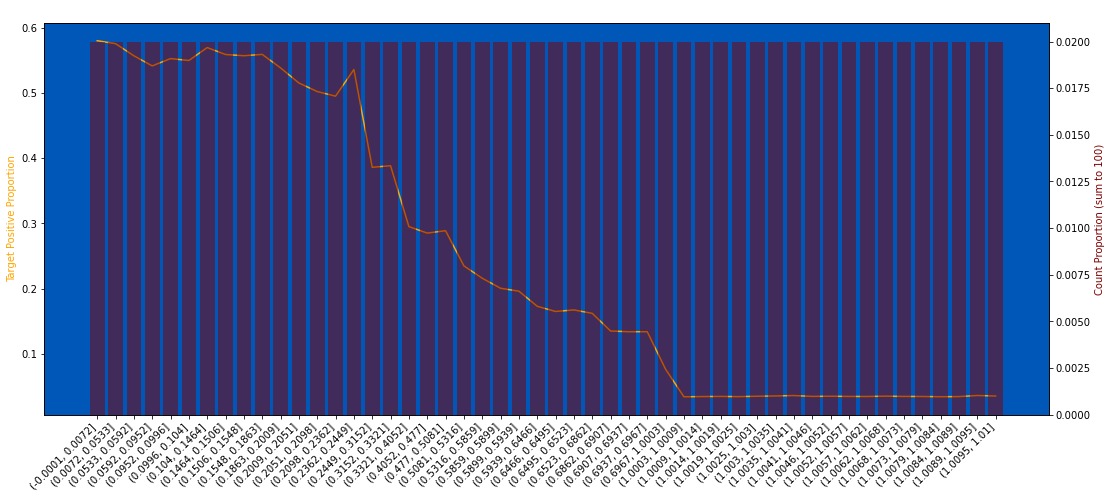

In [91]:
plot_target_check(train, "B_18", q=50, use_raw_bin=True)

In [92]:
%%time
df_list = round_dfs(df_list, col="B_18", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 280 ms, sys: 1.1 s, total: 1.38 s
Wall time: 2.28 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


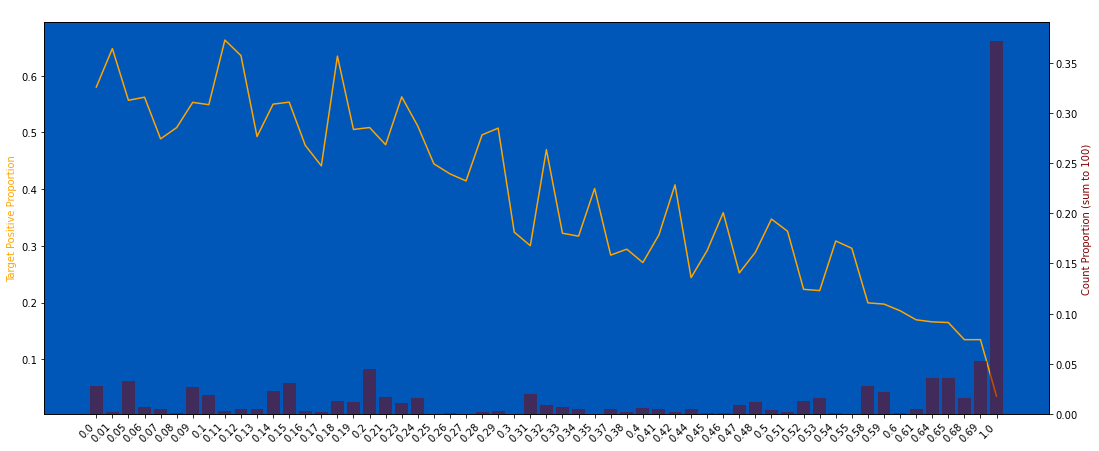

In [93]:
plot_target_check(train, "B_18", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True)

In [94]:
for df in df_list:
    df["B_18_"] = (df["B_18"] / 0.05).round(0)

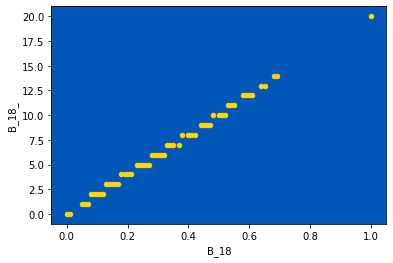

In [95]:
check_binning(train, "B_18", end=500000)

In [96]:
for df in df_list:
    df["B_18"] = (df["B_18"] / 0.05).round(0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


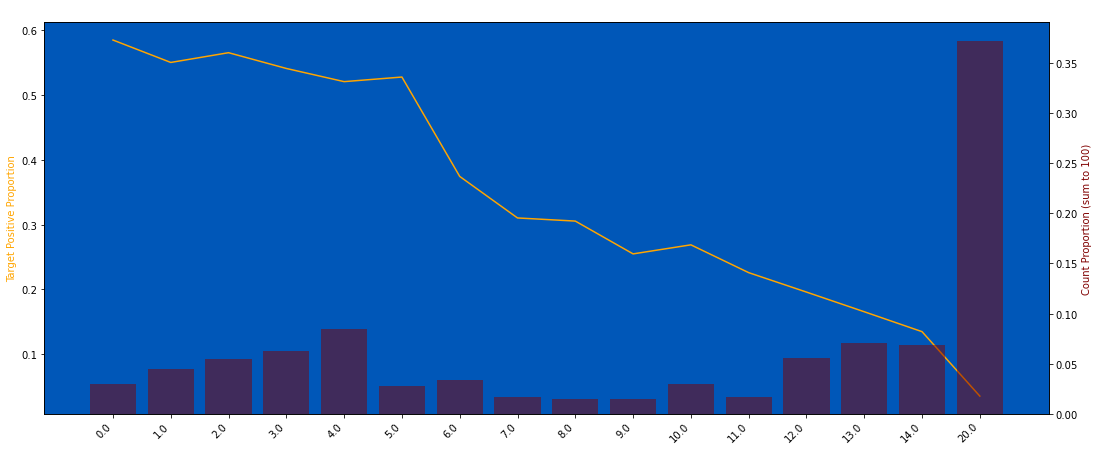

In [97]:
plot_target_check(train, "B_18", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


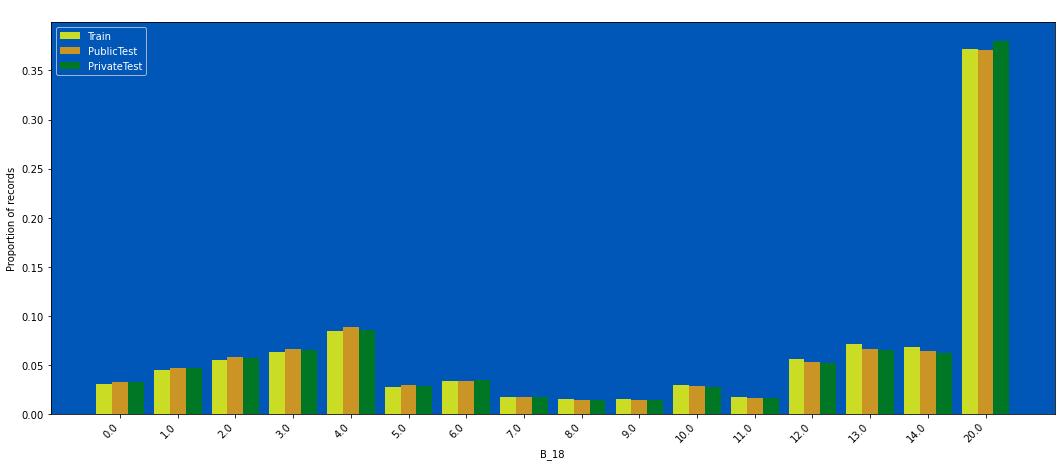

In [98]:
plot_train_test_distribution(df_list, "B_18", nunique_thr=8000)

### B_19

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


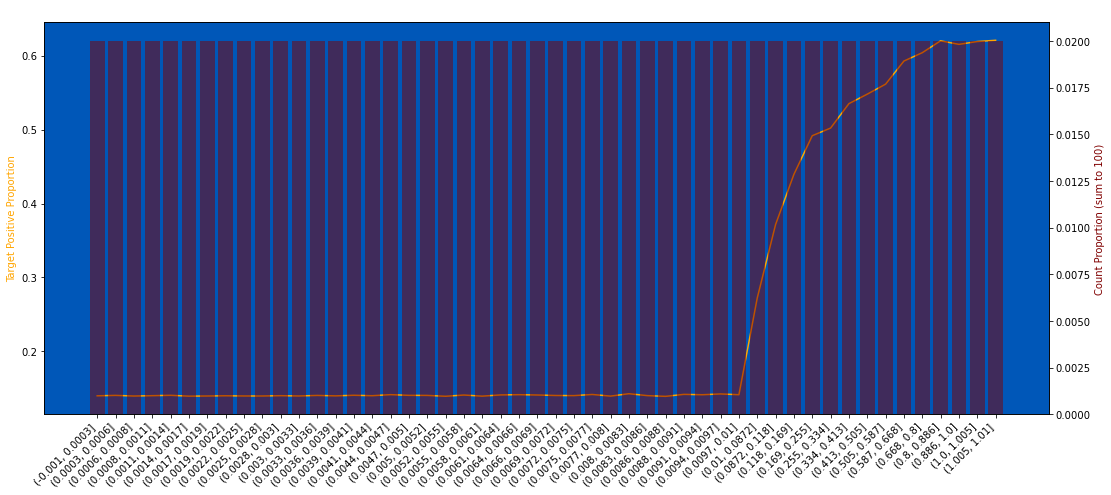

In [99]:
plot_target_check(train, "B_19", q=50, use_raw_bin=True)

In [100]:
%%time
df_list = round_dfs(df_list, col="B_19", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 302 ms, sys: 1.27 s, total: 1.57 s
Wall time: 2.49 s


2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


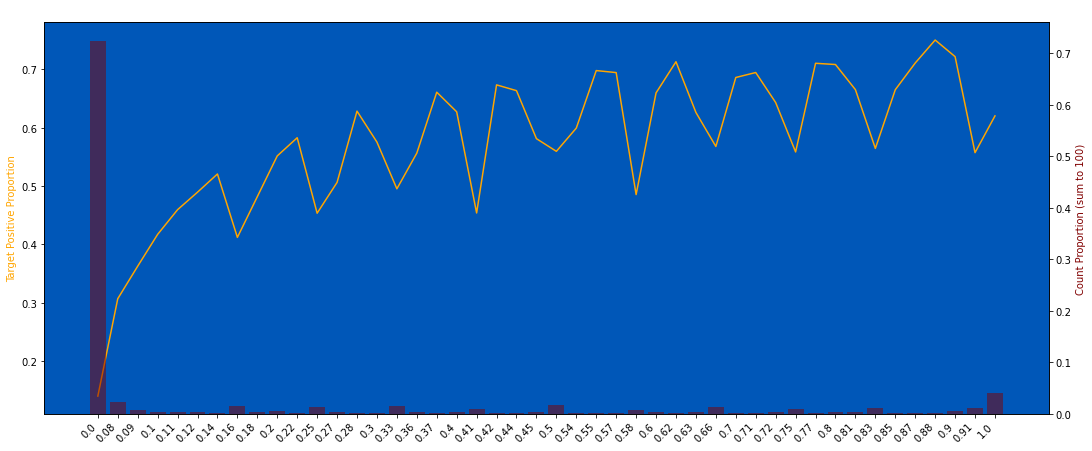

In [101]:
plot_target_check(train, "B_19", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True, without_drop_tail=True)

In [102]:
%%time
for df in df_list:
    df["B_19_"] = (df["B_19"] / 0.0799)
df_list = round_dfs(df_list, col="B_19_", decimals=0, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 191 ms, sys: 1.02 s, total: 1.22 s
Wall time: 1.43 s


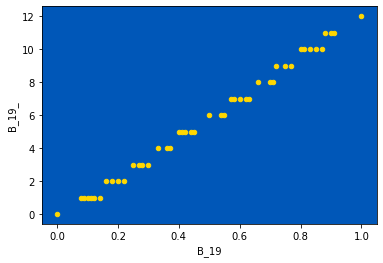

In [103]:
check_binning(train, "B_19", end=500000)

In [104]:
for df in df_list:
    df["B_19"] = (df["B_19"] / 0.0799)
df_list = round_dfs(df_list, col="B_19", decimals=0, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


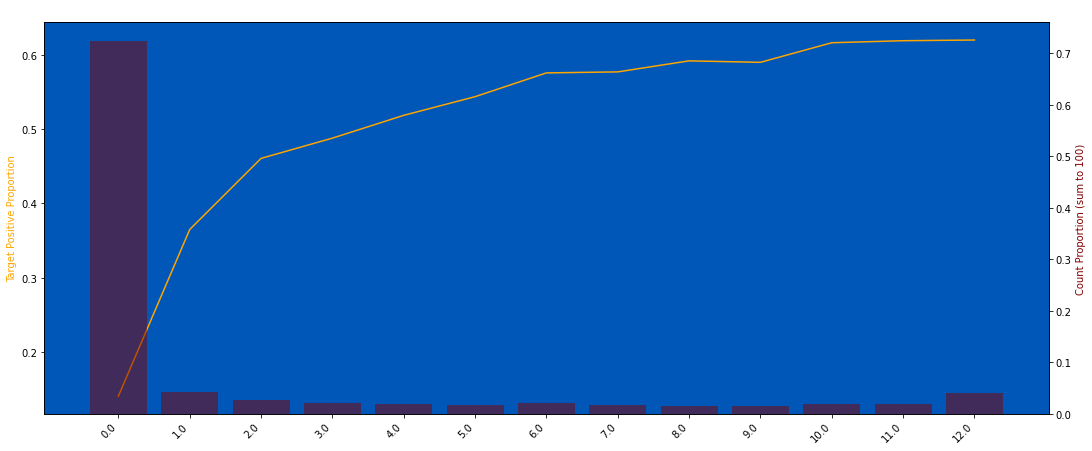

In [105]:
plot_target_check(train, "B_19", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


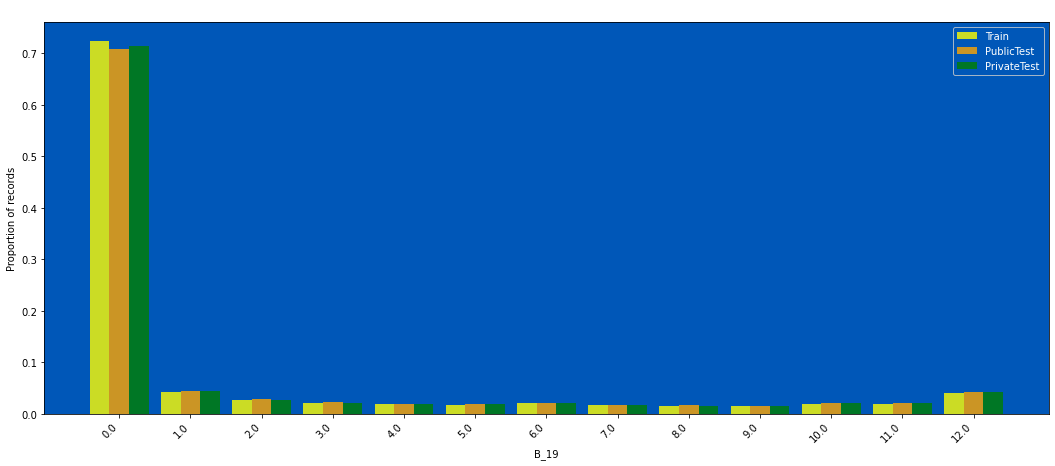

In [106]:
plot_train_test_distribution(df_list, "B_19", nunique_thr=8000)

### B_20

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


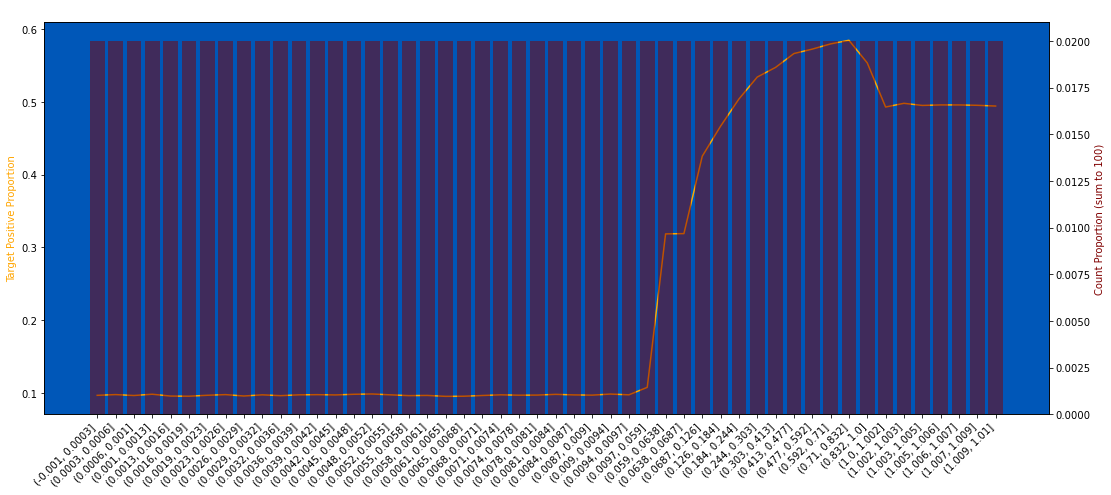

In [107]:
plot_target_check(train, "B_20", q=50, use_raw_bin=True)

In [108]:
%%time
df_list = round_dfs(df_list, col="B_20", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 299 ms, sys: 1.36 s, total: 1.66 s
Wall time: 2.57 s


2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


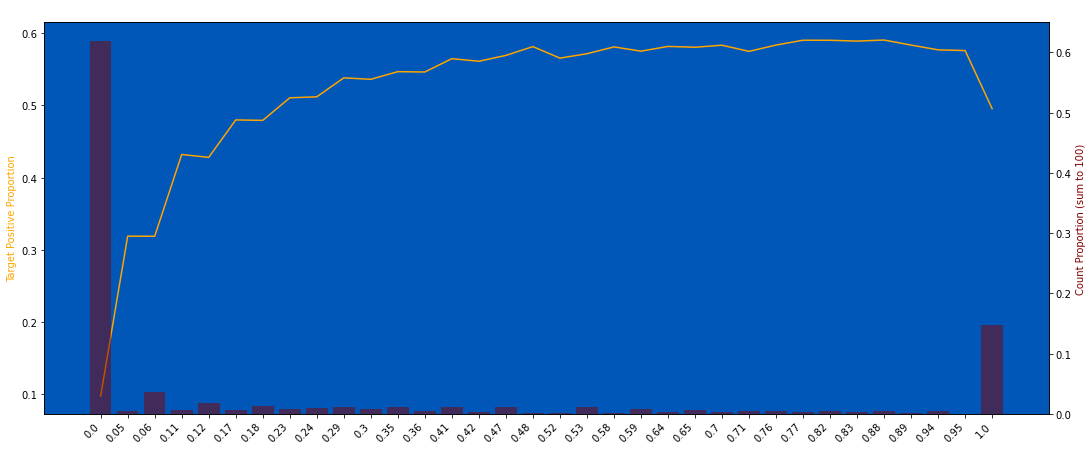

In [109]:
plot_target_check(train, "B_20", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

In [110]:
%%time
for df in df_list:
    df["B_20_"] = (df["B_20"] / 0.06).round(0)

CPU times: user 84.3 ms, sys: 400 ms, total: 484 ms
Wall time: 54.8 ms


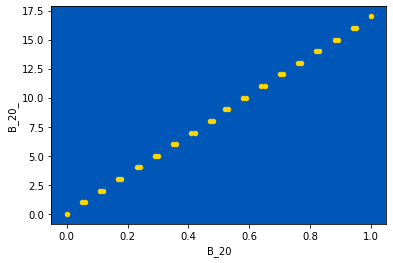

In [111]:
check_binning(train, "B_20", end=1000000)

In [112]:
for df in df_list:
    df["B_20"] = (df["B_20"] / 0.06).round(0)

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


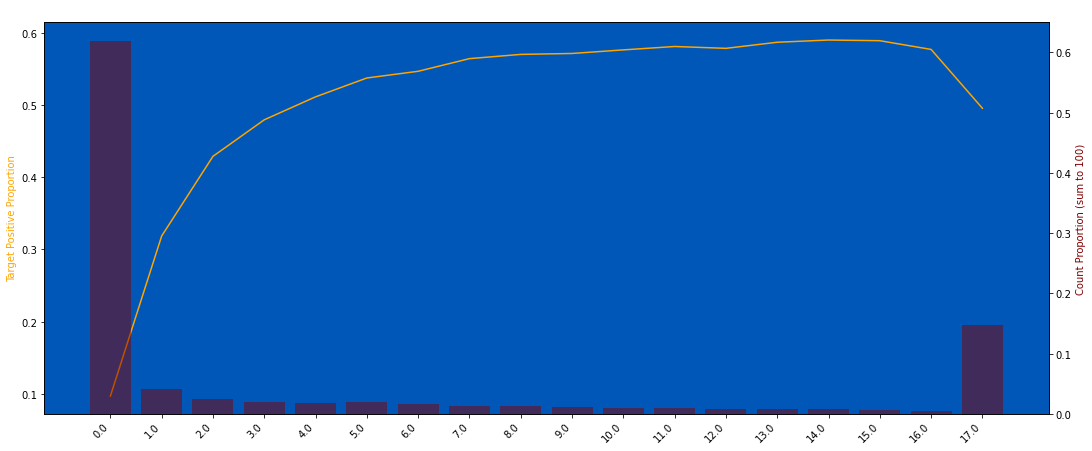

In [113]:
plot_target_check(train, "B_20", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


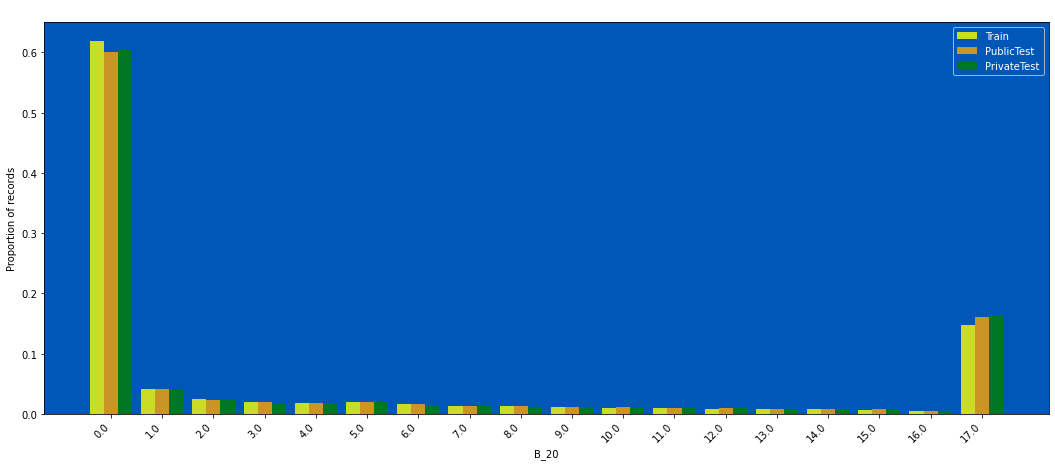

In [114]:
plot_train_test_distribution(df_list, "B_20", nunique_thr=8000)

### B_21

0 null count, 0.000 null proportion
nan of the targets have label = 1


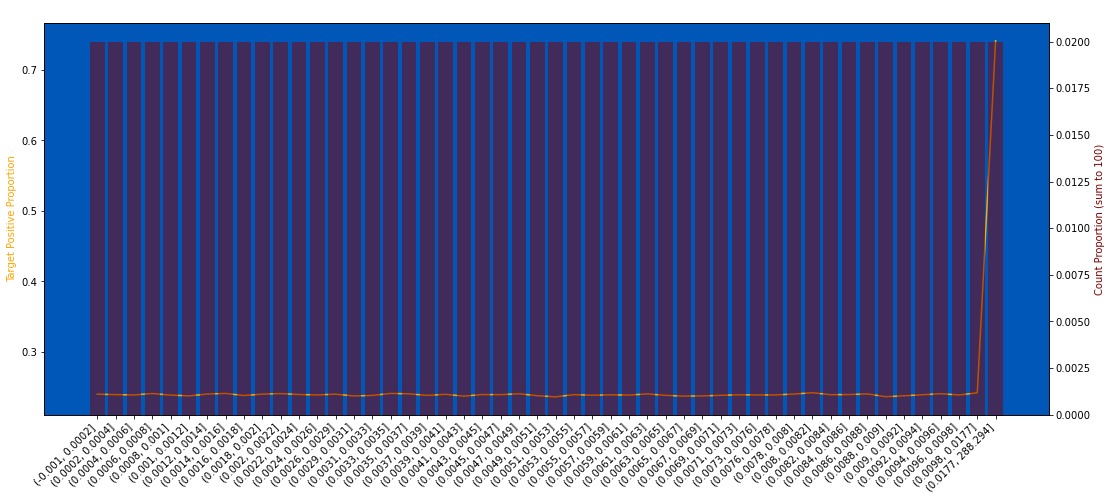

In [115]:
plot_target_check(train, "B_21", q=50, use_raw_bin=True)

In [116]:
%%time
df_list = round_dfs(df_list, col="B_21", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 297 ms, sys: 1.29 s, total: 1.59 s
Wall time: 2.49 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


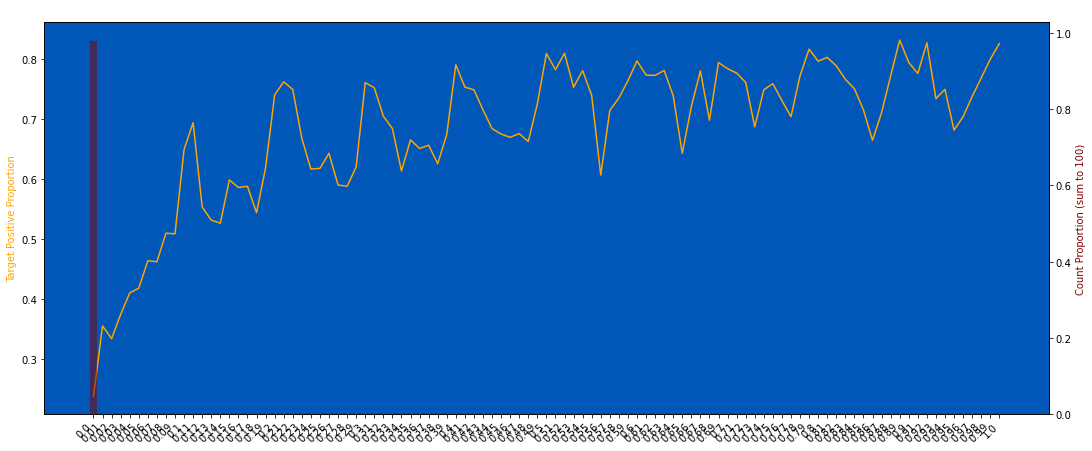

In [117]:
plot_target_check(train, "B_21", q=200, use_raw_bin=True, nunique_thr=10000, strfy_x=True)

In [118]:
%%time
for df in df_list:
    df["B_21_"] = ((df["B_21"] - 0.01) / 0.1)
df_list = round_dfs(df_list, col="B_21_", decimals=0, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 148 ms, sys: 788 ms, total: 936 ms
Wall time: 1.49 s


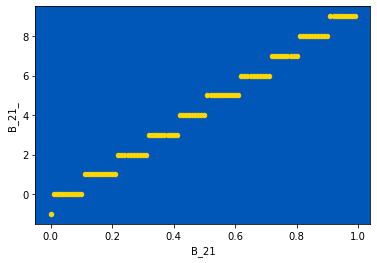

In [119]:
check_binning(train, "B_21", end=100)

In [120]:
for df in df_list:
    df["B_21"] = ((df["B_21"] - 0.01) / 0.1)
df_list = round_dfs(df_list, col="B_21", decimals=0, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [121]:
for df in df_list:
    df["B_21"] += 1

0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


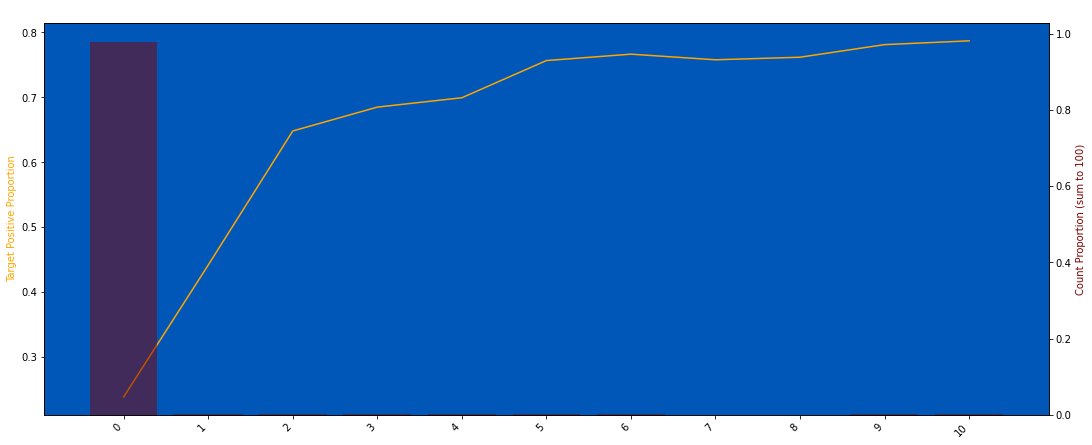

In [122]:
plot_target_check(train, "B_21", q=200, use_raw_bin=True, nunique_thr=10000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


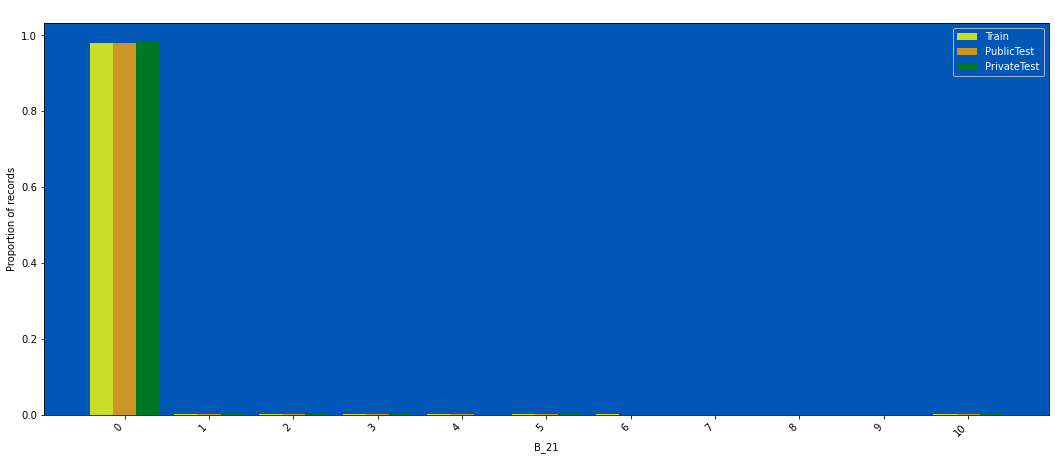

In [123]:
plot_train_test_distribution(df_list, "B_21", nunique_thr=8000)

### B_22

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


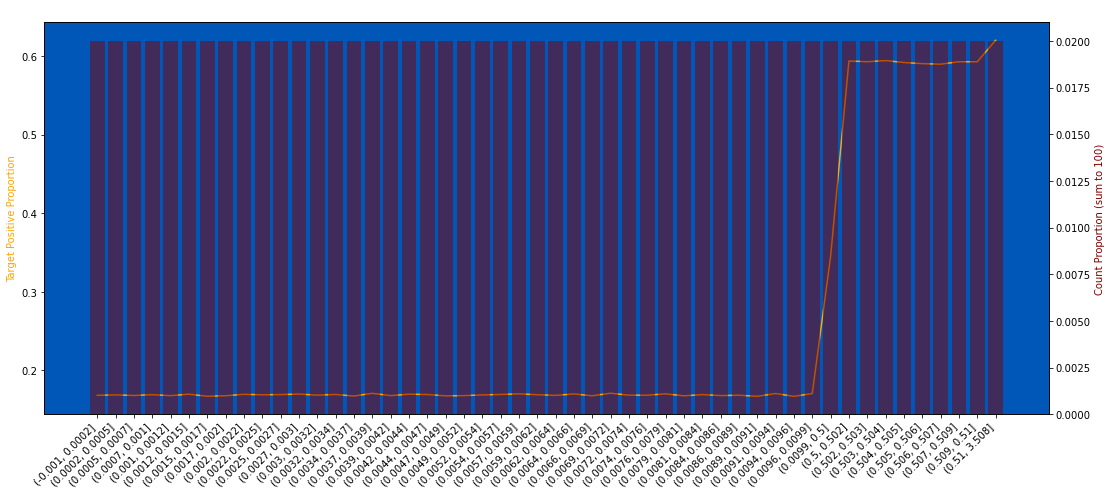

In [124]:
plot_target_check(train, "B_22", q=50, use_raw_bin=True, nunique_thr=7000)

In [125]:
%%time
df_list = round_dfs(df_list, col="B_22", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 267 ms, sys: 1.2 s, total: 1.47 s
Wall time: 2.41 s


2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


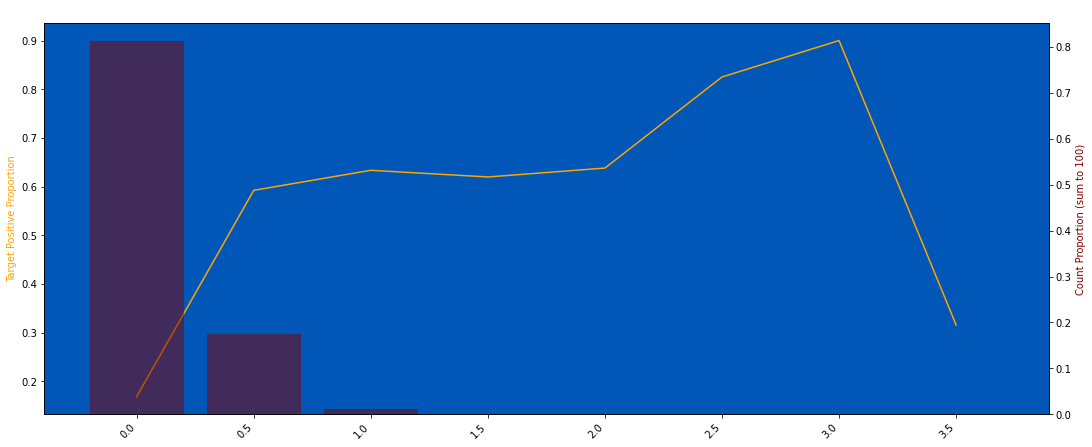

In [126]:
plot_target_check(train, "B_22", q=50, use_raw_bin=True, nunique_thr=7000, strfy_x=True, without_drop_tail=True)

In [127]:
for df in df_list:
    df["B_22"] *= 2

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


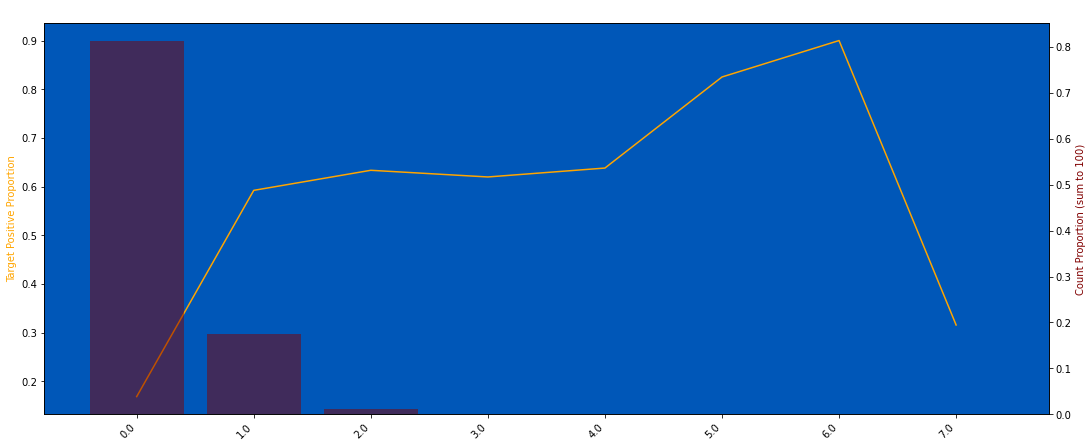

In [128]:
plot_target_check(train, "B_22", q=50, use_raw_bin=True, nunique_thr=7000, strfy_x=True, without_drop_tail=True)

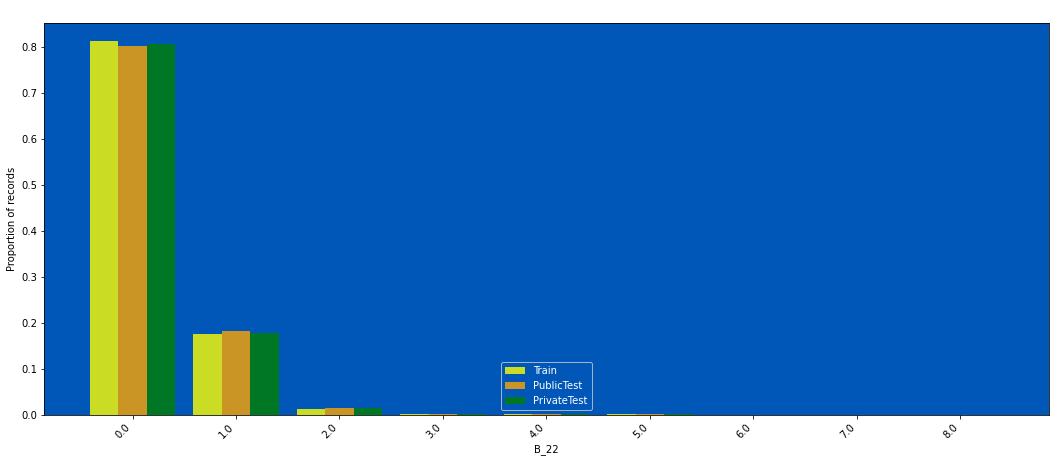

In [129]:
plot_train_test_distribution(df_list, "B_22", nunique_thr=8000, without_drop_tail=True)

### B_23

0 null count, 0.000 null proportion
nan of the targets have label = 1


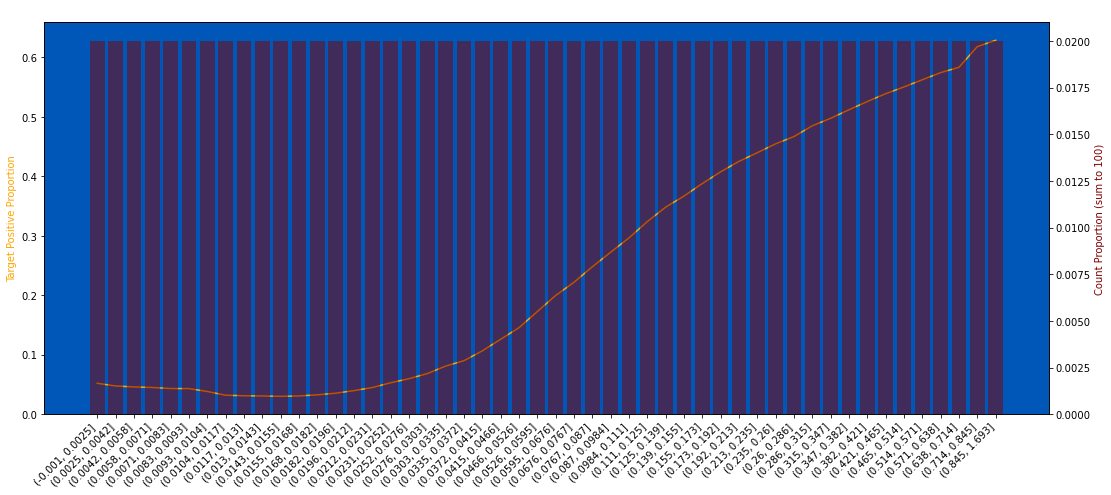

In [130]:
plot_target_check(train, "B_23", q=50, use_raw_bin=True)

In [131]:
%%time
df_list = round_dfs(df_list, col="B_23", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 322 ms, sys: 1.26 s, total: 1.58 s
Wall time: 2.53 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


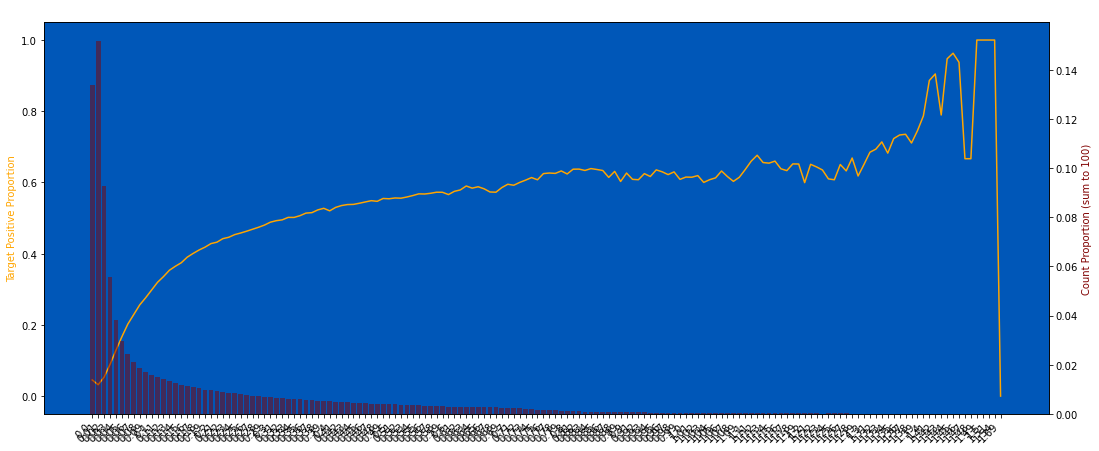

In [132]:
plot_target_check(train, "B_23", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

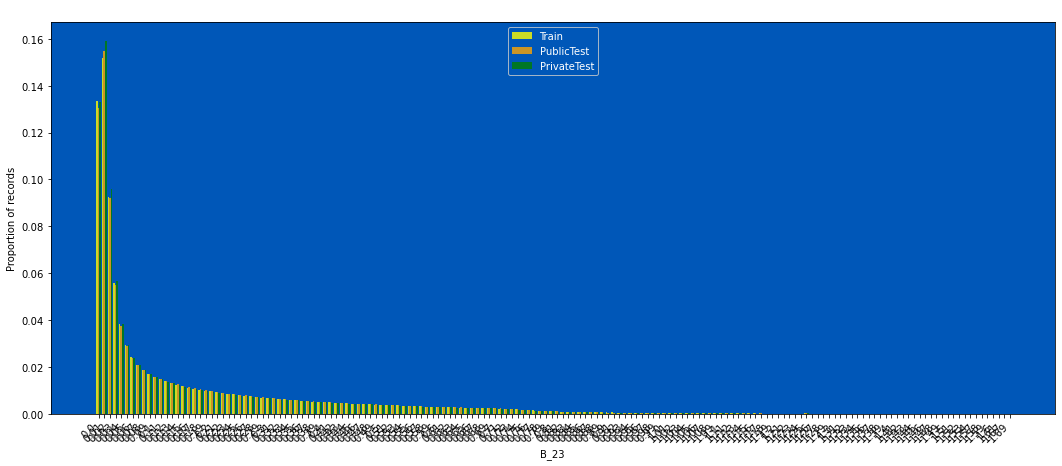

In [133]:
plot_train_test_distribution(df_list, "B_23", nunique_thr=5000, without_drop_tail=True)

### B_24

0 null count, 0.000 null proportion
nan of the targets have label = 1


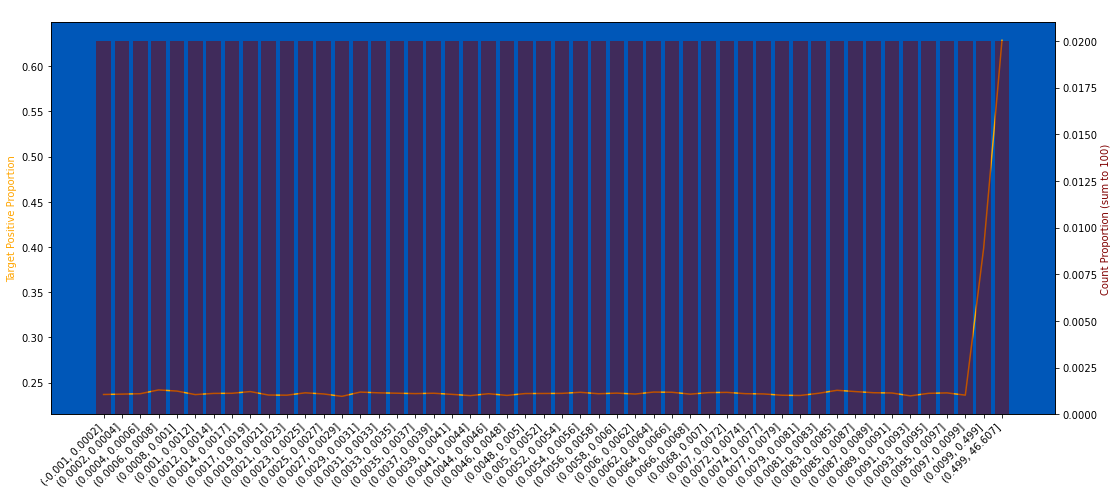

In [134]:
plot_target_check(train, "B_24", q=50, use_raw_bin=True)

In [135]:
%%time
df_list = round_dfs(df_list, col="B_24", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 302 ms, sys: 1.13 s, total: 1.43 s
Wall time: 2.37 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


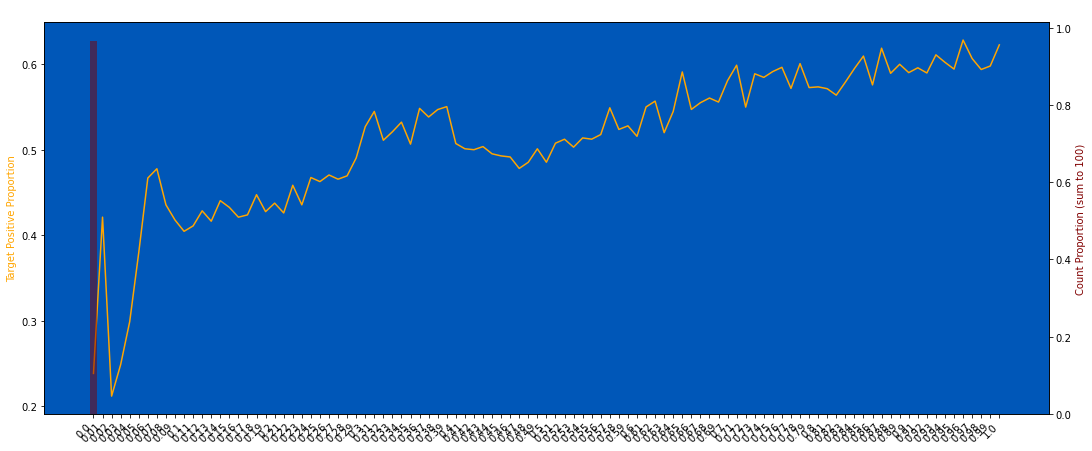

In [136]:
plot_target_check(train, "B_24", q=200, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

In [137]:
%%time
for df in df_list:
    df["B_24_"] = (df["B_24"] / 0.05).round(0)

CPU times: user 21 ms, sys: 30.4 ms, total: 51.4 ms
Wall time: 50.4 ms


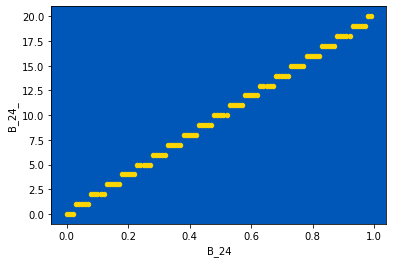

In [138]:
check_binning(train, "B_24", end=100)

In [139]:
for df in df_list:
    df["B_24"] = (df["B_24"] / 0.05).round(0)

0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


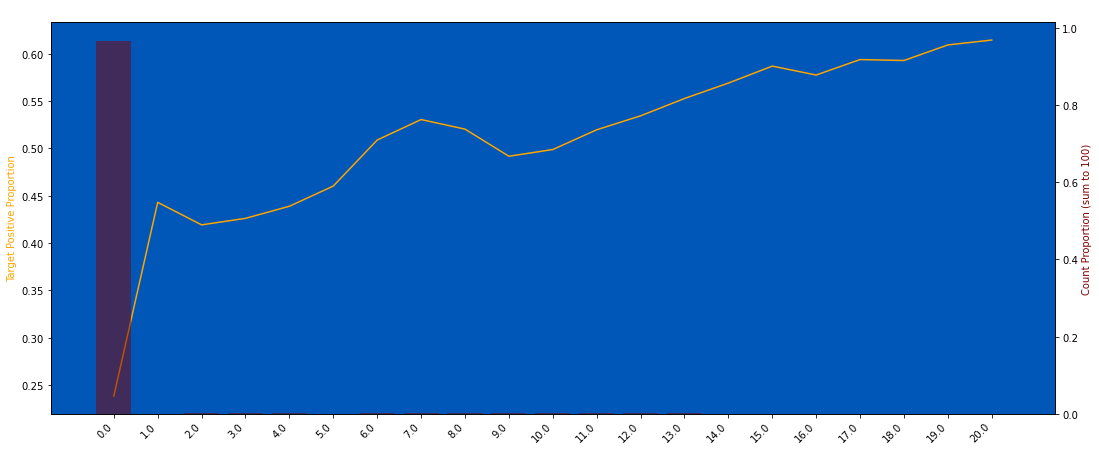

In [140]:
plot_target_check(train, "B_24", q=200, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


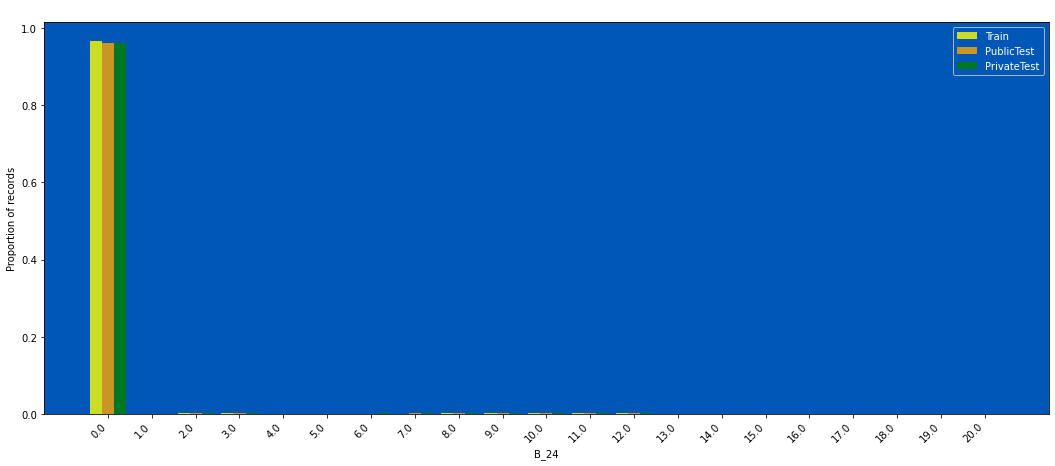

In [141]:
plot_train_test_distribution(df_list, "B_24", nunique_thr=8000)

### B_25

6923 null count, 0.001 null proportion
0.0858 of the targets have label = 1


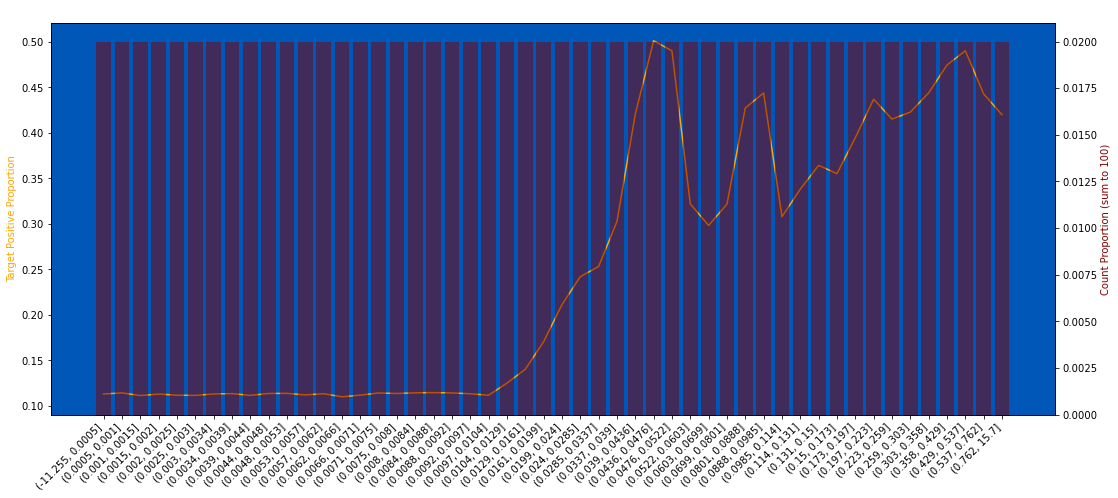

In [142]:
plot_target_check(train, "B_25", q=50, use_raw_bin=True)

In [143]:
%%time
df_list = round_dfs(df_list, col="B_25", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 284 ms, sys: 1.19 s, total: 1.47 s
Wall time: 2.37 s


6923 null count, 0.001 null proportion
0.0858 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


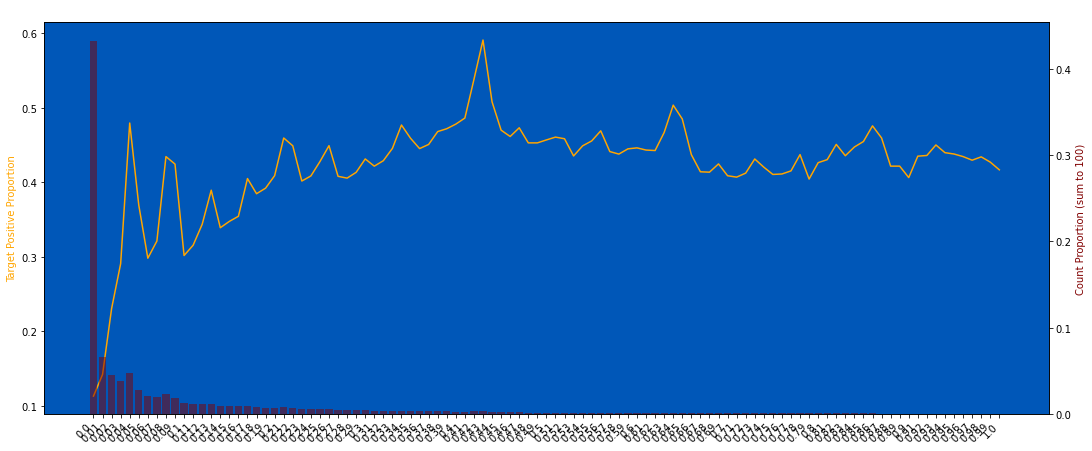

In [144]:
plot_target_check(train, "B_25", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


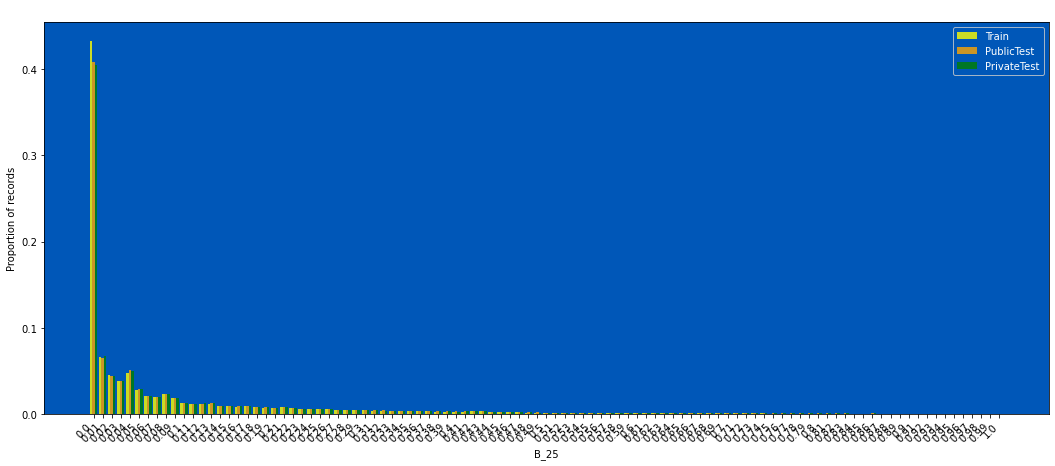

In [145]:
plot_train_test_distribution(df_list, "B_25", nunique_thr=8000)

### B_26

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


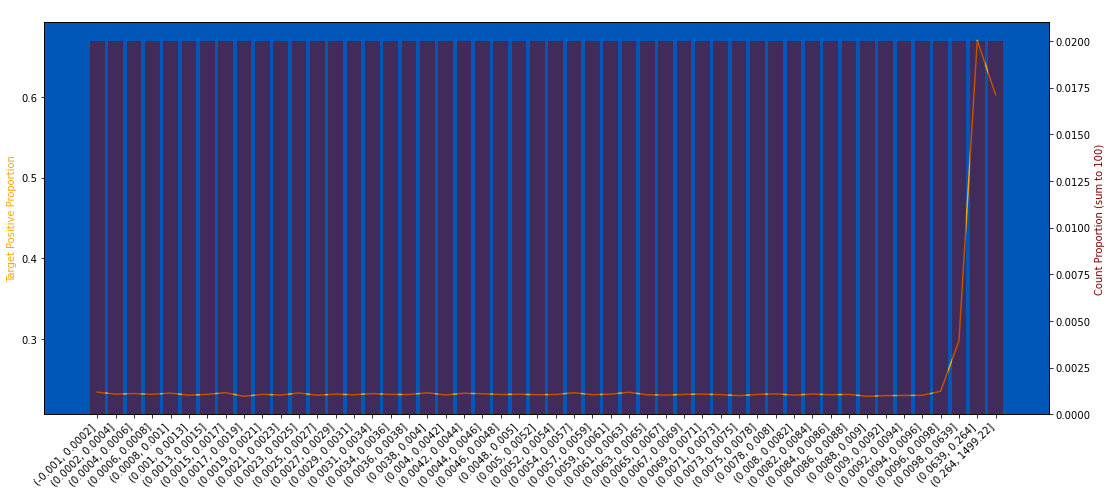

In [146]:
plot_target_check(train, "B_26", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

In [147]:
%%time
df_list = round_dfs(df_list, col="B_26", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 260 ms, sys: 1.12 s, total: 1.38 s
Wall time: 2.32 s


2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


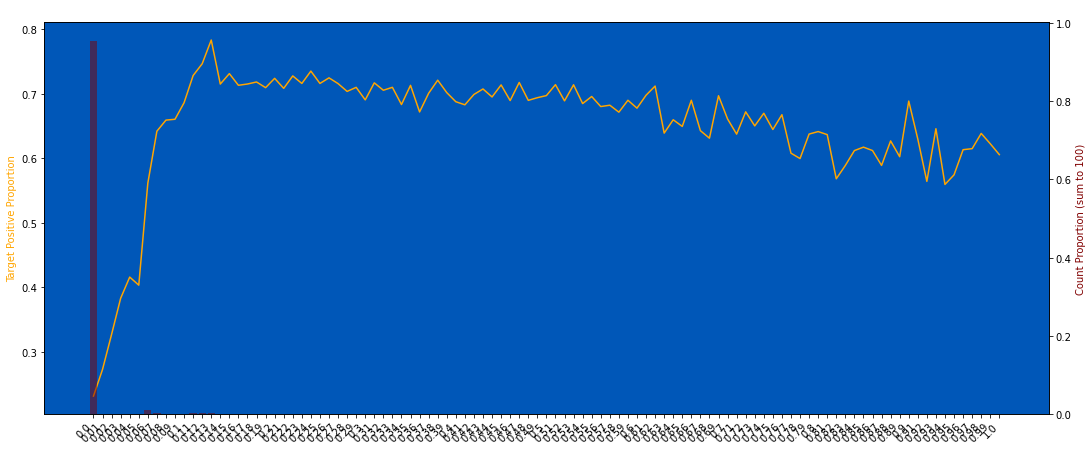

In [148]:
plot_target_check(train, "B_26", q=100, use_raw_bin=True, nunique_thr=35000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


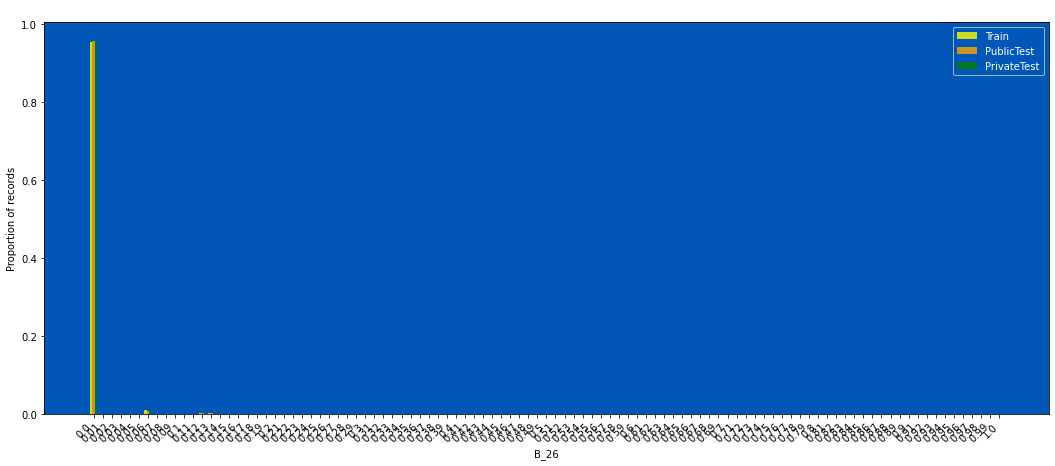

In [149]:
plot_train_test_distribution(df_list, "B_26", nunique_thr=8000)

### B_27

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


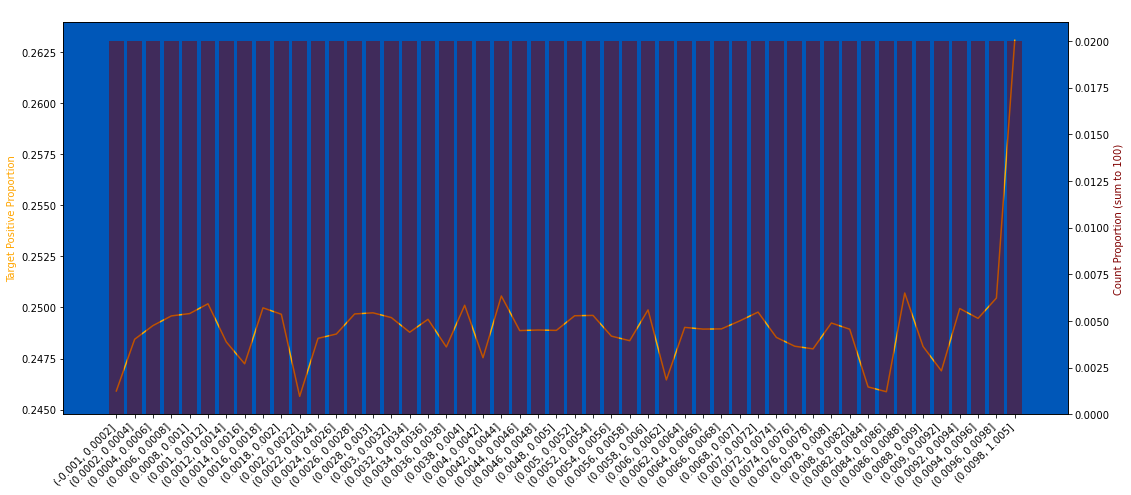

In [150]:
plot_target_check(train, "B_27", q=50, use_raw_bin=True)

In [151]:
%%time
df_list = round_dfs(df_list, col="B_27", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 262 ms, sys: 1.15 s, total: 1.41 s
Wall time: 2.36 s


2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


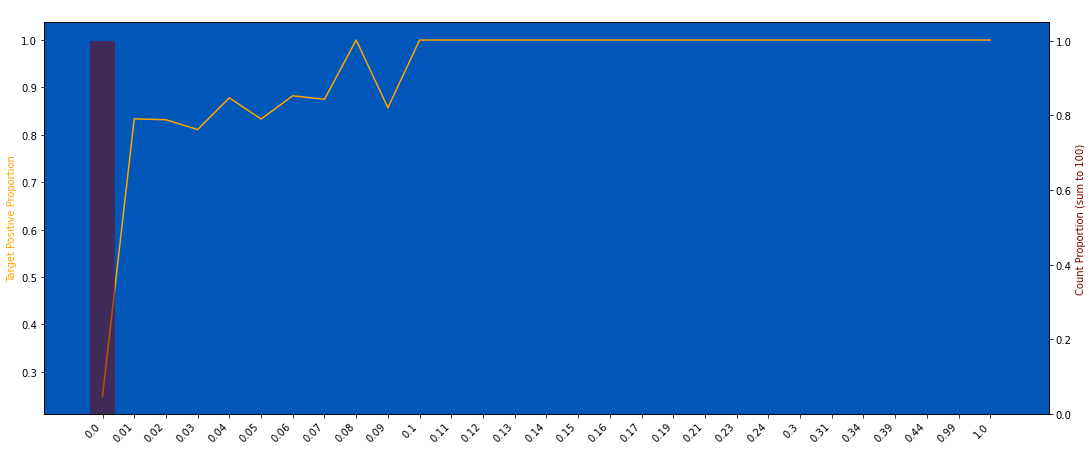

In [152]:
plot_target_check(train, "B_27", q=500, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

In [153]:
for df in df_list:
    df["B_27"] = np.where(df["B_27"] > 0, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


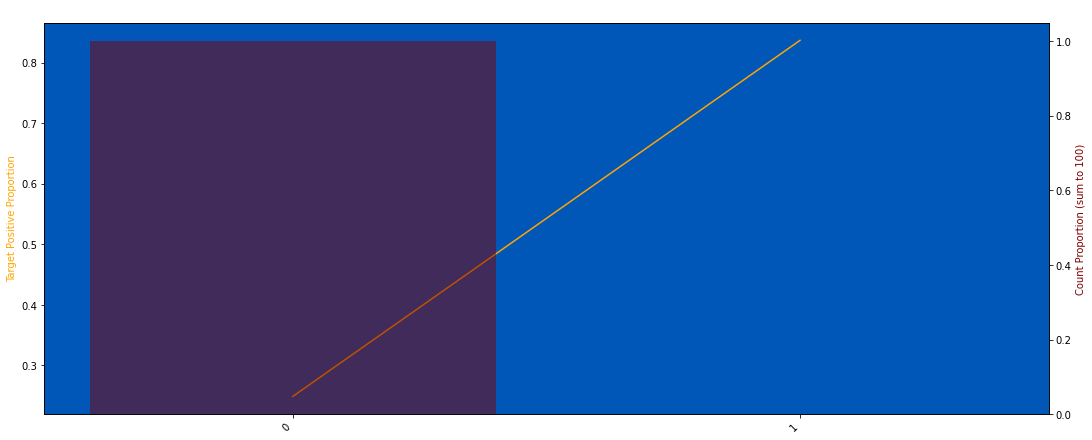

In [154]:
plot_target_check(train, "B_27", q=500, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

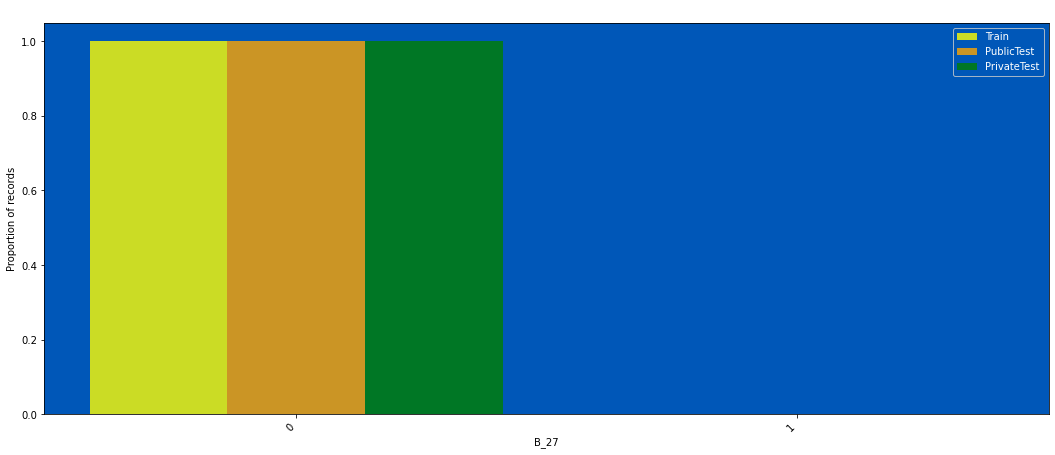

In [155]:
plot_train_test_distribution(df_list, "B_27", nunique_thr=8000, without_drop_tail=True)

### B_28

0 null count, 0.000 null proportion
nan of the targets have label = 1


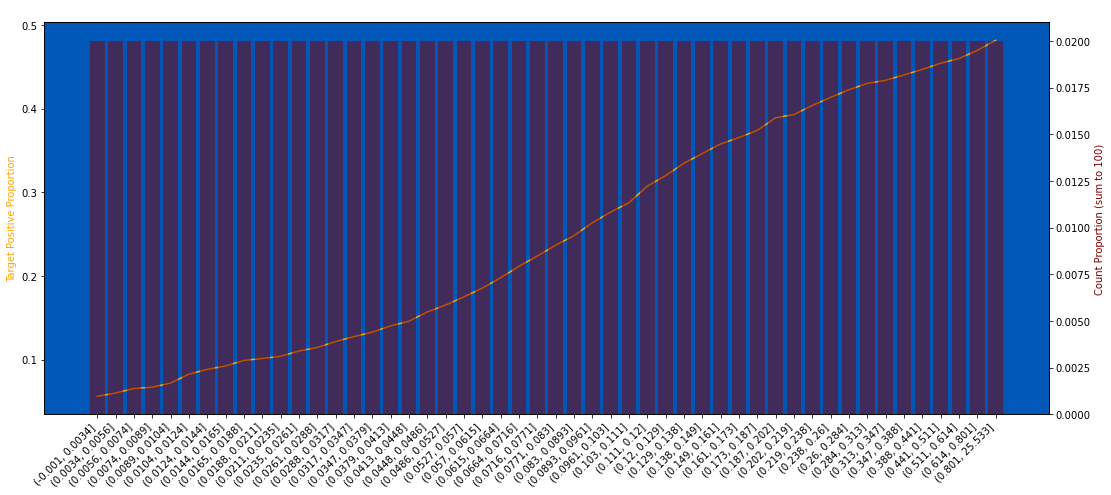

In [156]:
plot_target_check(train, "B_28", q=50, use_raw_bin=True)

In [157]:
%%time
df_list = round_dfs(df_list, col="B_28", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 280 ms, sys: 1.16 s, total: 1.44 s
Wall time: 2.37 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


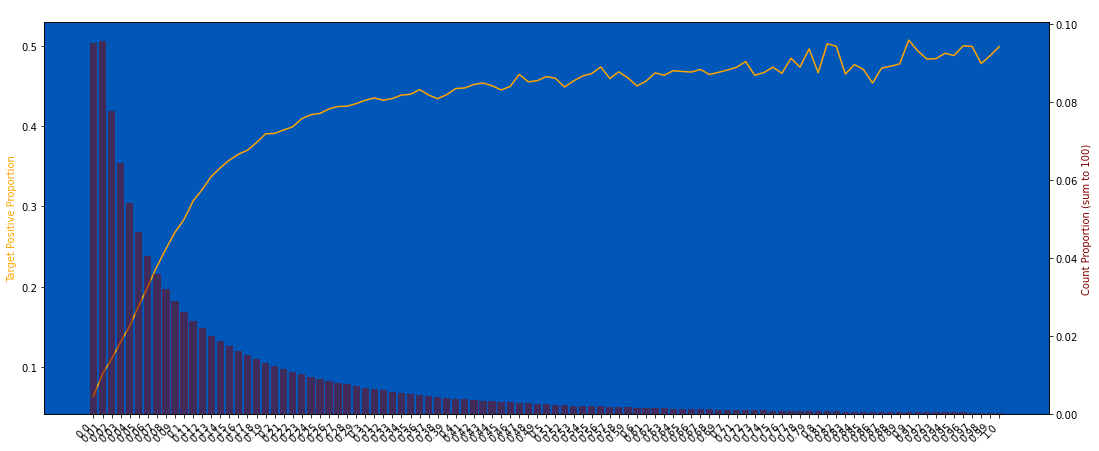

In [158]:
plot_target_check(train, "B_28", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


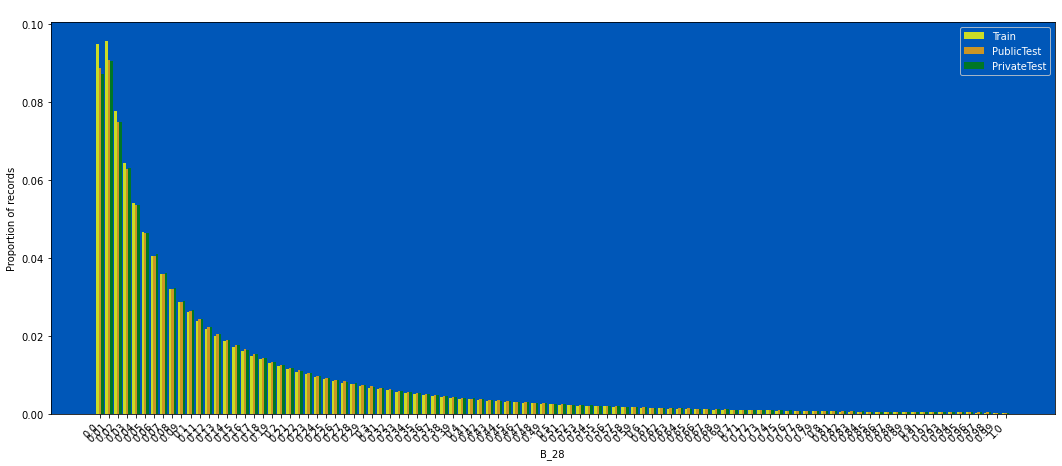

In [159]:
plot_train_test_distribution(df_list, "B_28", nunique_thr=8000)

### B_29

5150035 null count, 0.931 null proportion
0.2512 of the targets have label = 1


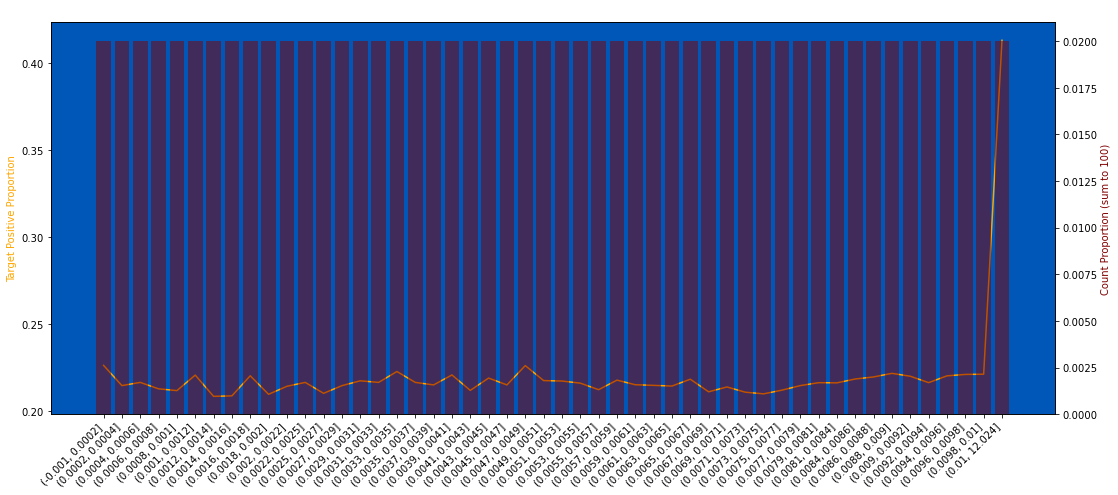

In [160]:
plot_target_check(train, "B_29", q=50, use_raw_bin=True)

In [161]:
%%time
df_list = round_dfs(df_list, col="B_29", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 235 ms, sys: 1.01 s, total: 1.24 s
Wall time: 2.34 s


5150035 null count, 0.931 null proportion
0.2512 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


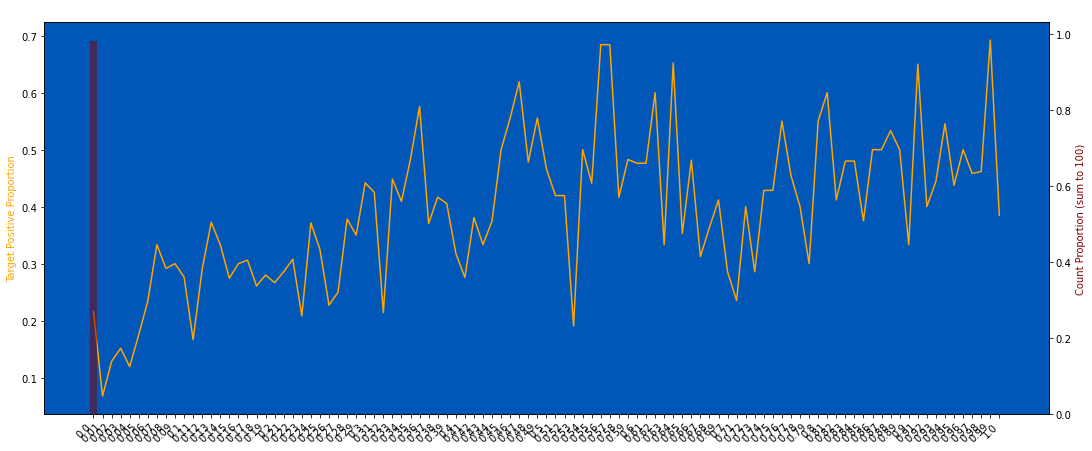

In [162]:
plot_target_check(train, "B_29", q=150, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


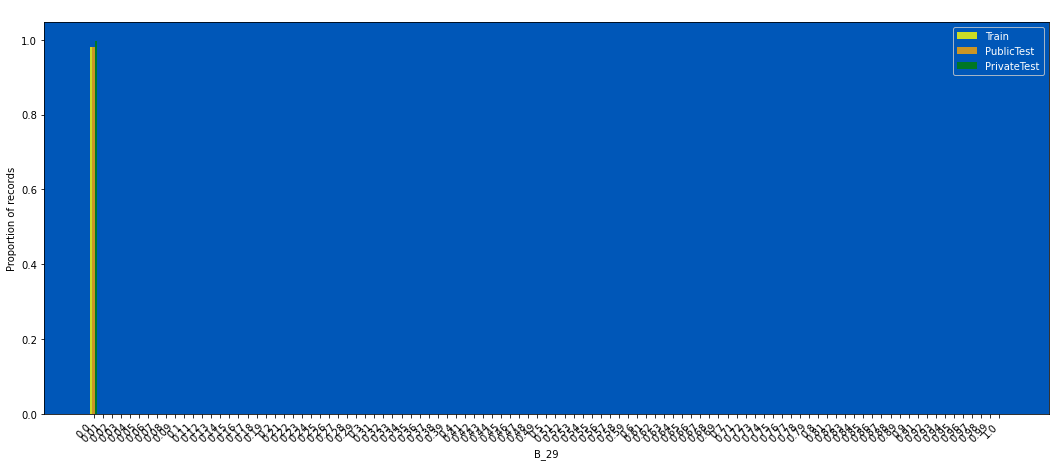

In [163]:
plot_train_test_distribution(df_list, "B_29", nunique_thr=8000)

### B_30

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


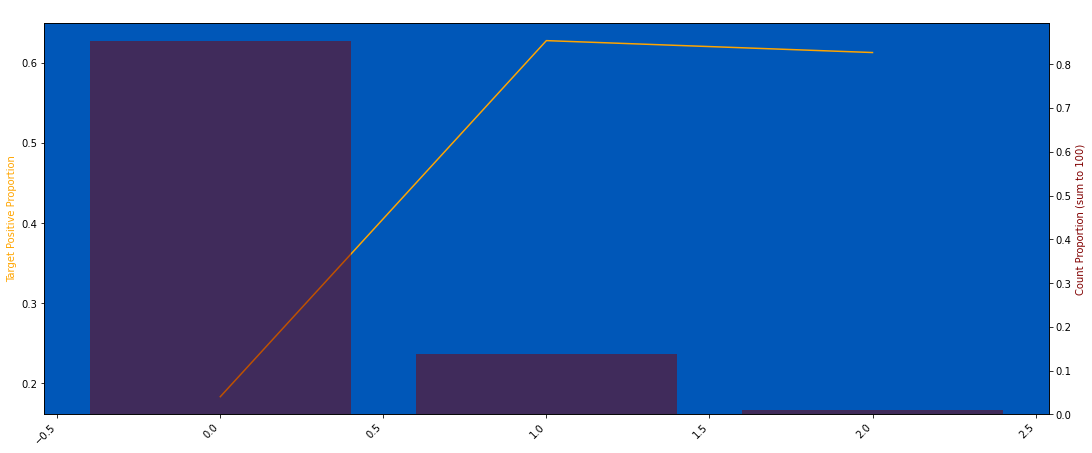

In [164]:
plot_target_check(train, "B_30", q=50, use_raw_bin=True, without_drop_tail=True)

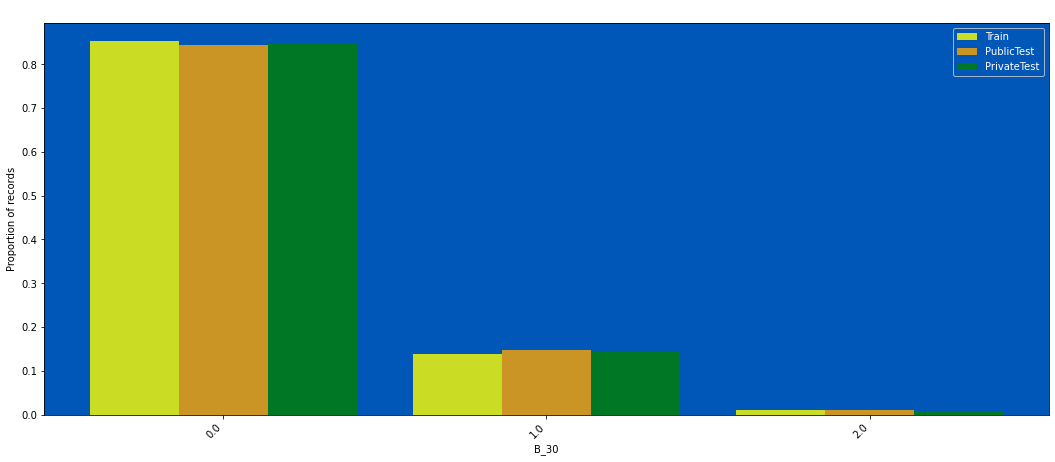

In [165]:
plot_train_test_distribution(df_list, "B_30", nunique_thr=8000, without_drop_tail=True)

### B_31

0 null count, 0.000 null proportion
nan of the targets have label = 1


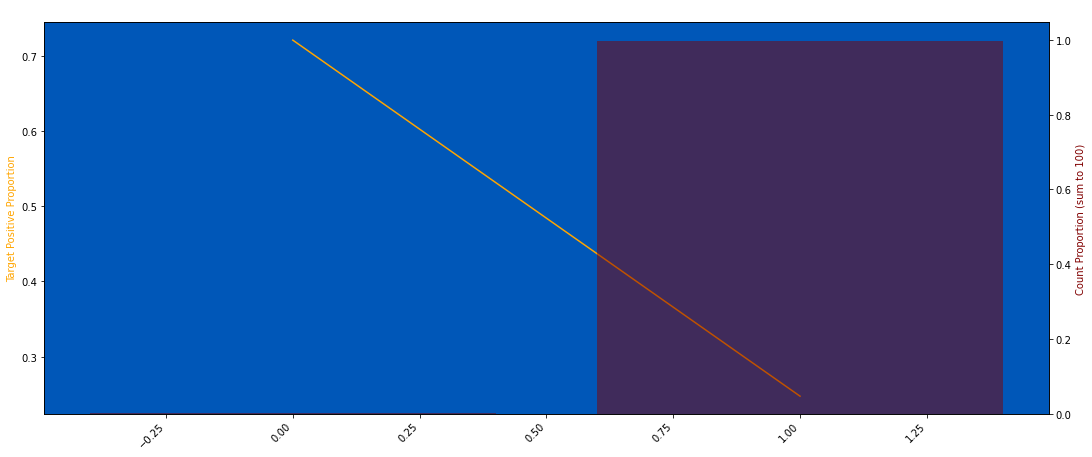

In [166]:
plot_target_check(train, "B_31", q=50, use_raw_bin=True, nunique_thr=3, without_drop_tail=True)

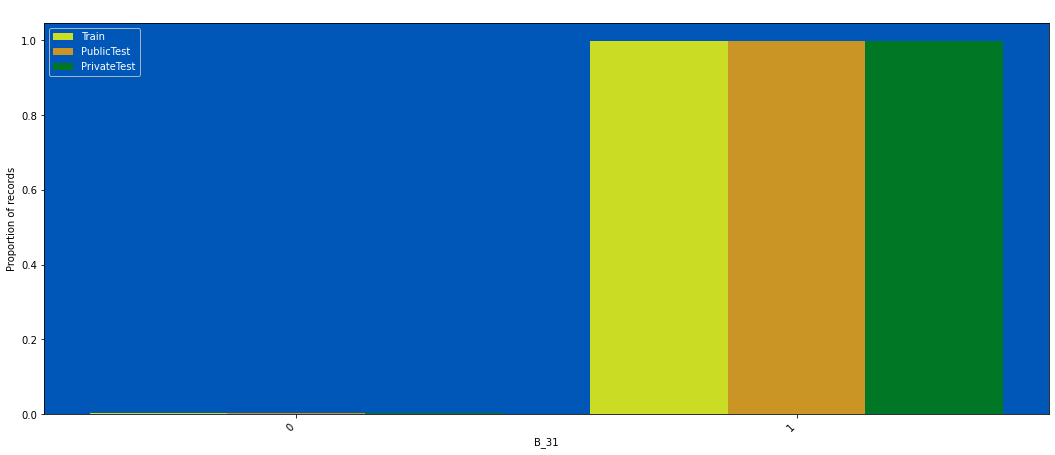

In [167]:
plot_train_test_distribution(df_list, "B_31", nunique_thr=8000, without_drop_tail=True)

### B_32

0 null count, 0.000 null proportion
nan of the targets have label = 1


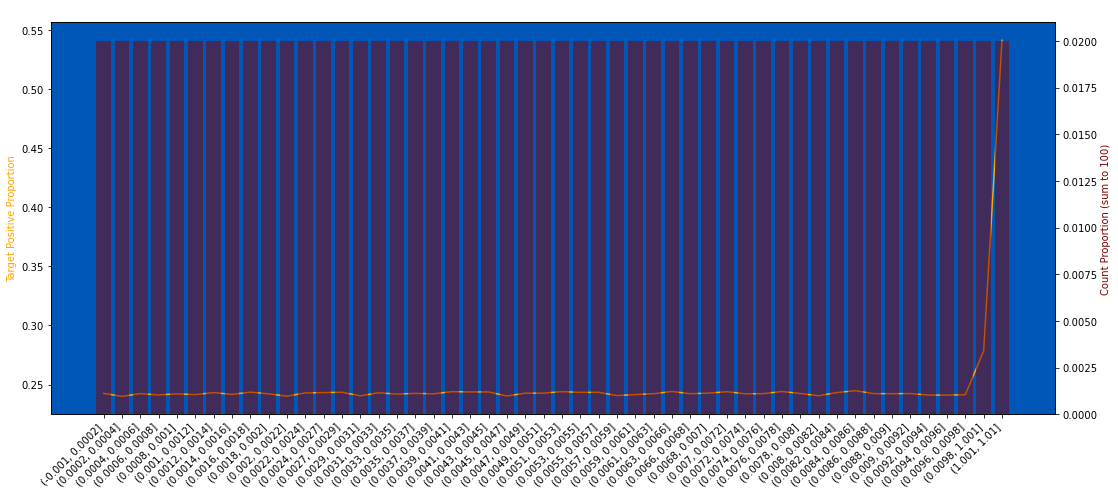

In [168]:
plot_target_check(train, "B_32", q=50, use_raw_bin=True)

In [169]:
%%time
df_list = round_dfs(df_list, col="B_32", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 229 ms, sys: 1.02 s, total: 1.24 s
Wall time: 2.19 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


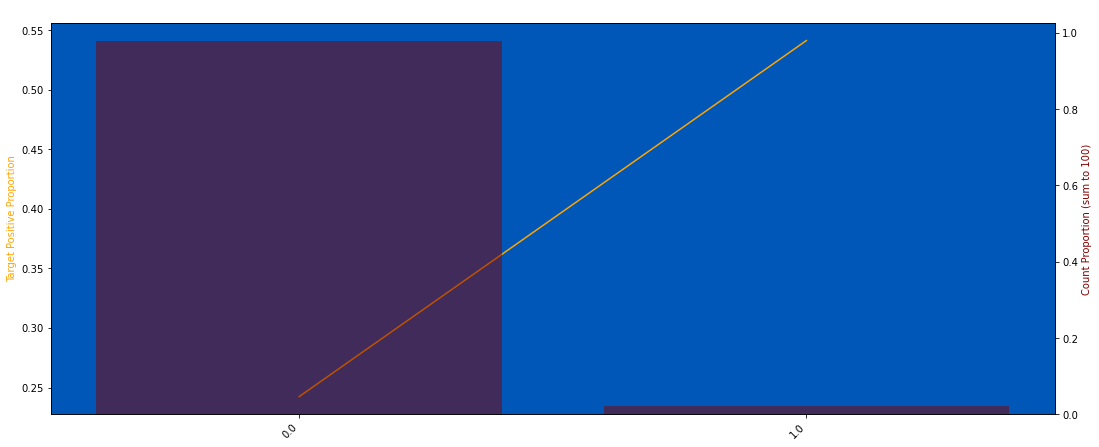

In [170]:
plot_target_check(train, "B_32", q=50, use_raw_bin=True, nunique_thr=50000, strfy_x=True, without_drop_tail=True)

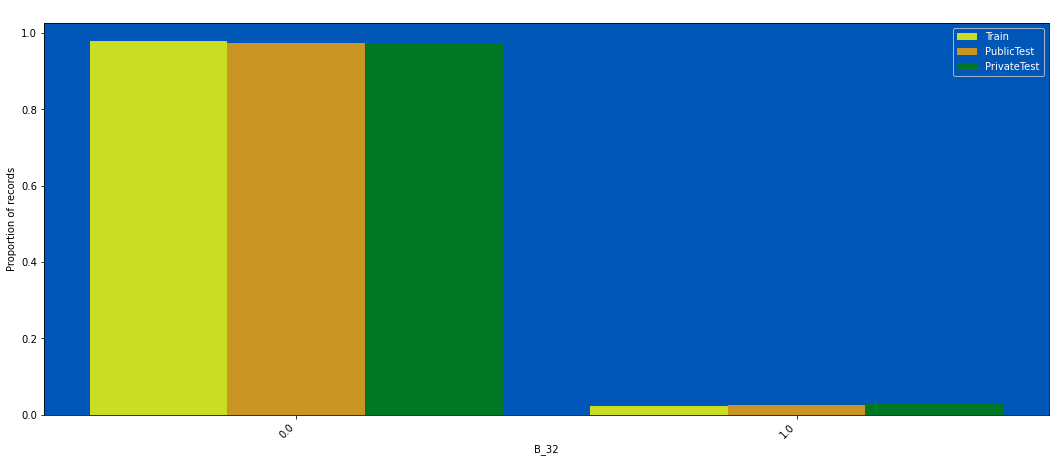

In [171]:
plot_train_test_distribution(df_list, "B_32", nunique_thr=8000, without_drop_tail=True)

### B_33

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


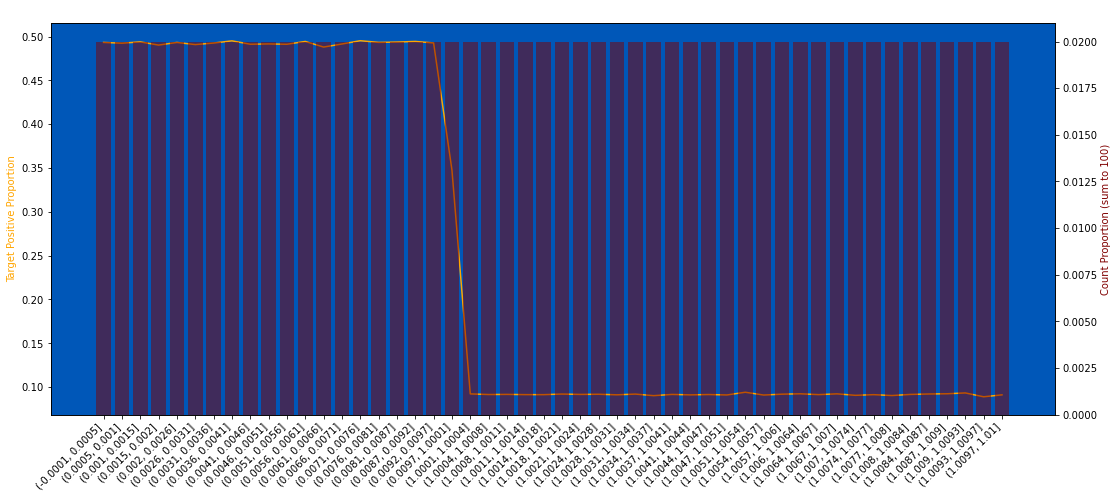

In [172]:
plot_target_check(train, "B_33", q=50, use_raw_bin=True)

In [173]:
%%time
df_list = round_dfs(df_list, col="B_33", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 247 ms, sys: 1 s, total: 1.25 s
Wall time: 2.18 s


2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


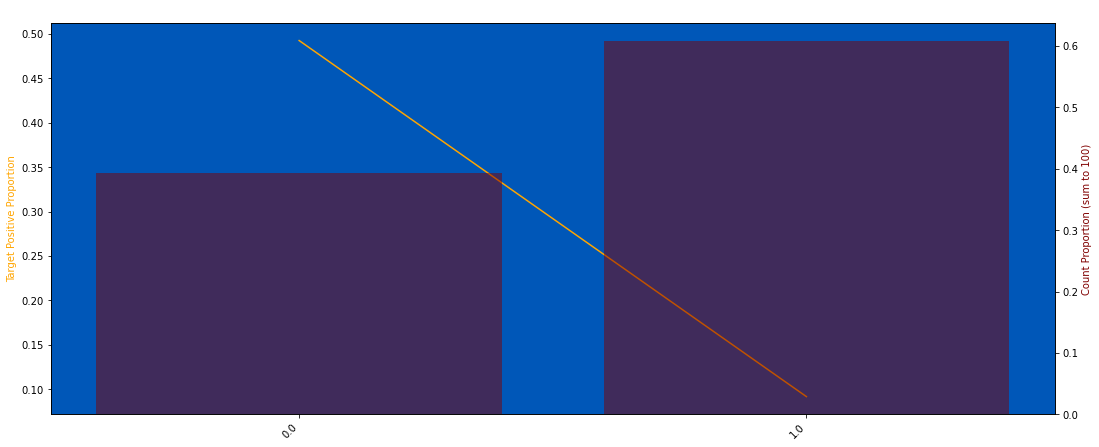

In [174]:
plot_target_check(train, "B_33", q=50, use_raw_bin=True, nunique_thr=50000, strfy_x=True, without_drop_tail=True)

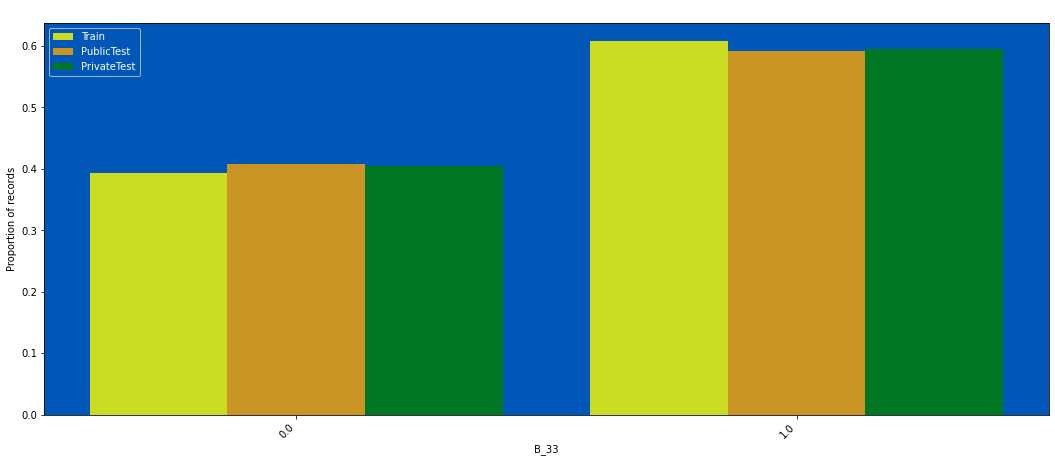

In [175]:
plot_train_test_distribution(df_list, "B_33", nunique_thr=8000, without_drop_tail=True)

### B_36

0 null count, 0.000 null proportion
nan of the targets have label = 1


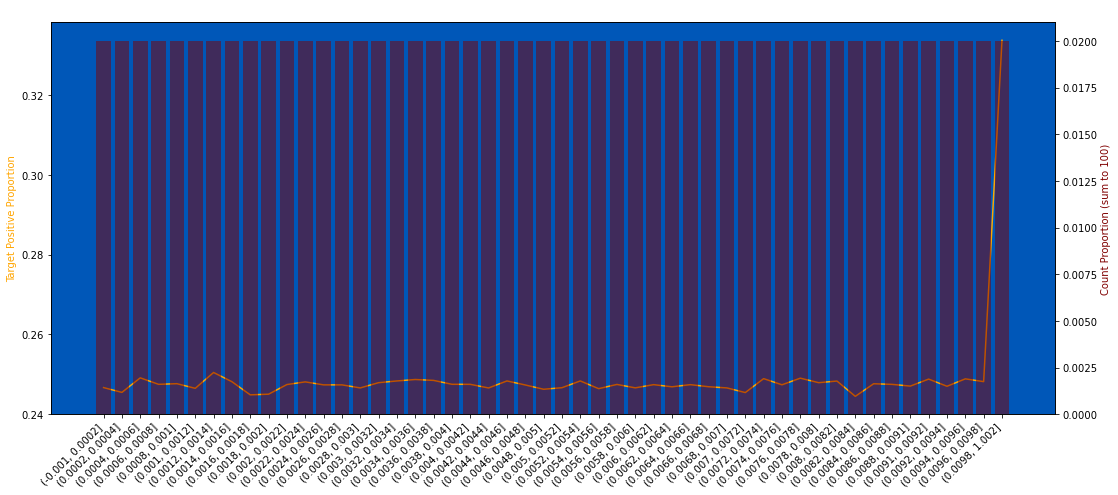

In [176]:
plot_target_check(train, "B_36", q=50, use_raw_bin=True)

In [177]:
%%time
df_list = round_dfs(df_list, col="B_36", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 244 ms, sys: 1.05 s, total: 1.29 s
Wall time: 2.22 s


0 null count, 0.000 null proportion
nan of the targets have label = 1


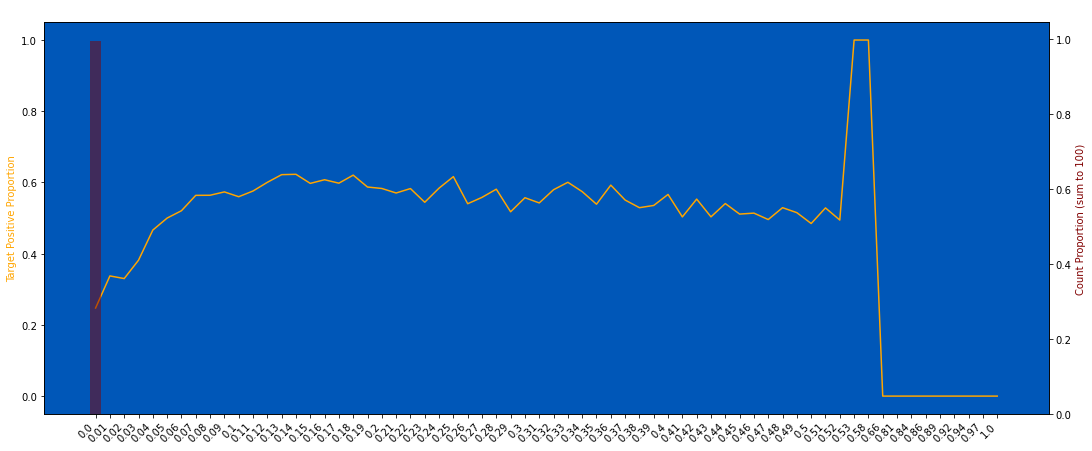

In [178]:
plot_target_check(train, "B_36", q=100, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

In [179]:
for df in df_list:
    df["B_36"] = np.where(df["B_36"] > 0, 1, 0)

0 null count, 0.000 null proportion
nan of the targets have label = 1


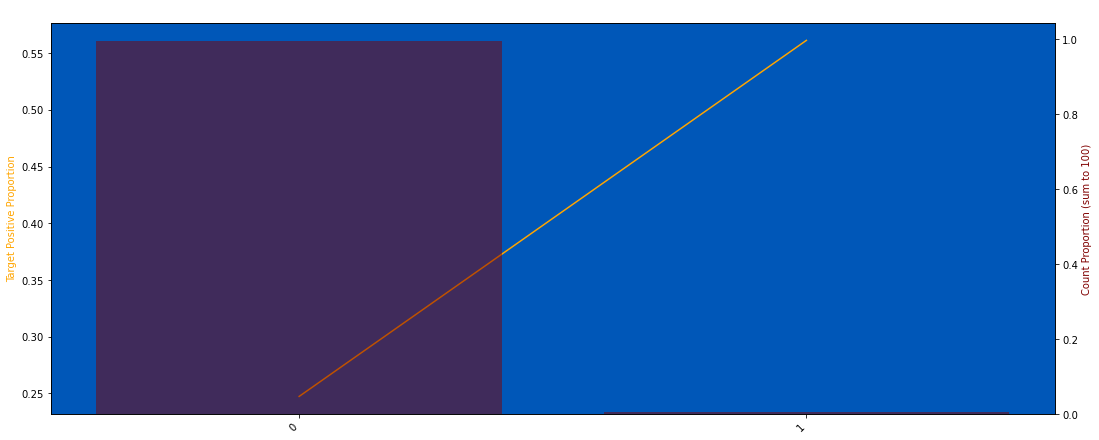

In [180]:
plot_target_check(train, "B_36", q=100, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

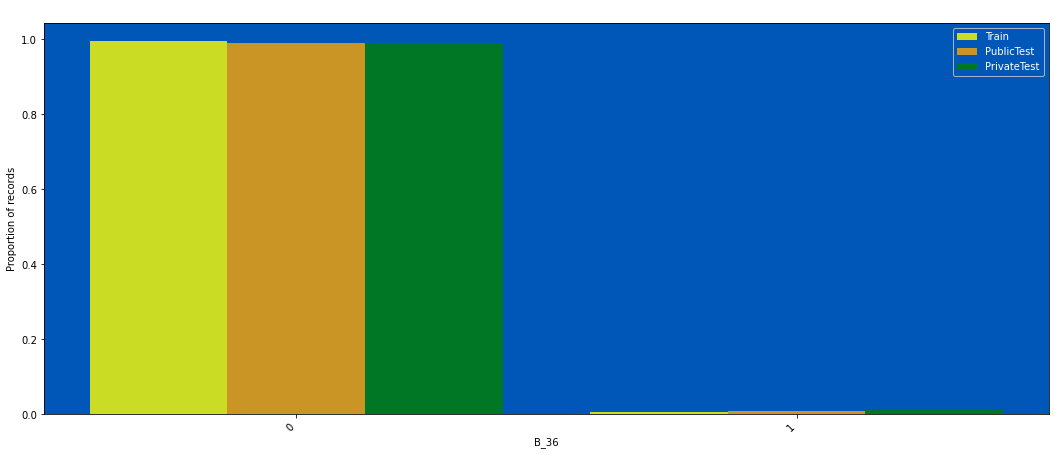

In [181]:
plot_train_test_distribution(df_list, "B_36", nunique_thr=8000, without_drop_tail=True)

In [182]:
gc.collect()

40476

### B_37

56 null count, 0.000 null proportion
0.1964 of the targets have label = 1


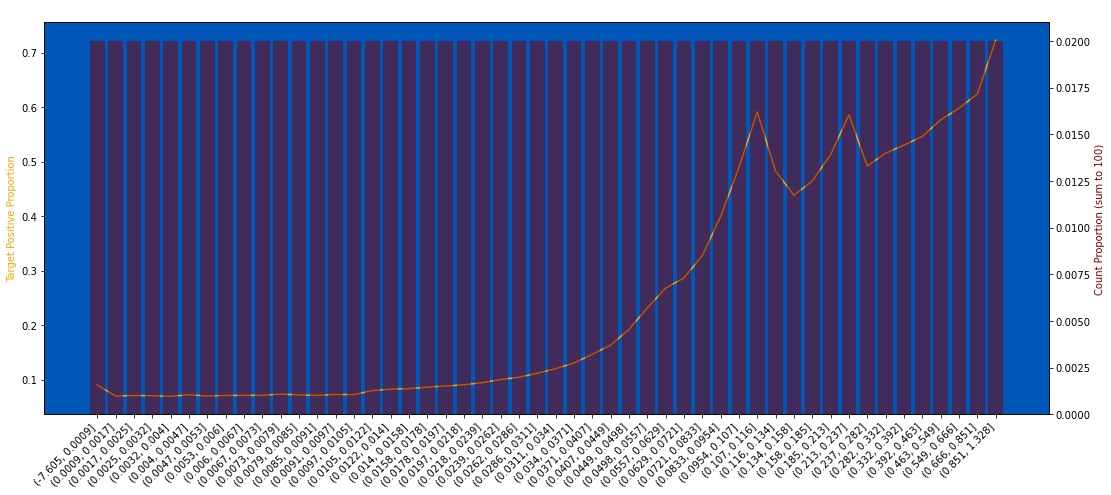

In [183]:
plot_target_check(train, "B_37", q=50, use_raw_bin=True)

In [184]:
%%time
df_list = round_dfs(df_list, col="B_37", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 253 ms, sys: 1.05 s, total: 1.3 s
Wall time: 2.25 s


56 null count, 0.000 null proportion
0.1964 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


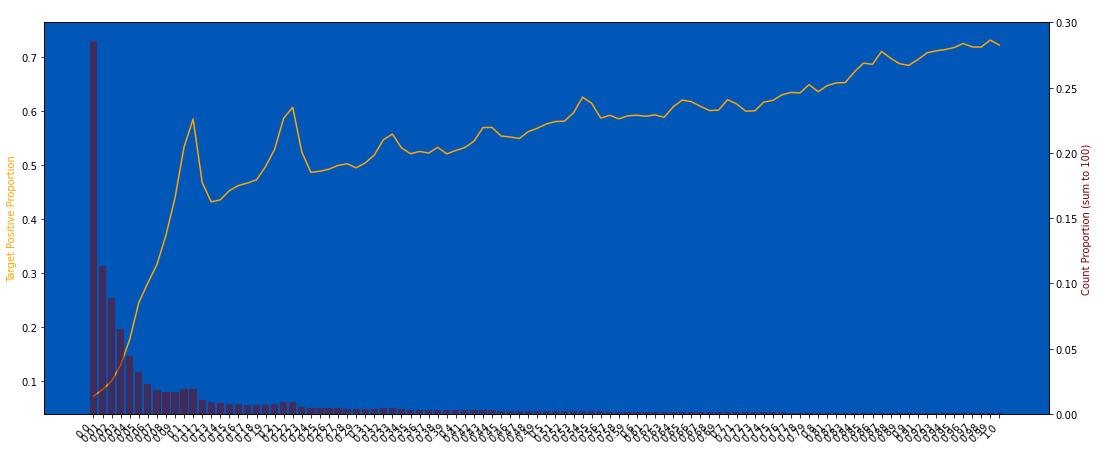

In [185]:
plot_target_check(train, "B_37", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

### B_38

In [186]:
mapping = dict(train.groupby(["B_38"])["target"].mean())
mapping

{1.0: 0.13526434704800755,
 2.0: 0.0633063558246025,
 3.0: 0.32860357758809544,
 4.0: 0.6997155131782841,
 5.0: 0.5594304673871995,
 6.0: 0.6149160701061467,
 7.0: 0.49886498756891146}

In [187]:
for df in df_list:
    df["B_38"] = df["B_38"].map(mapping)

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


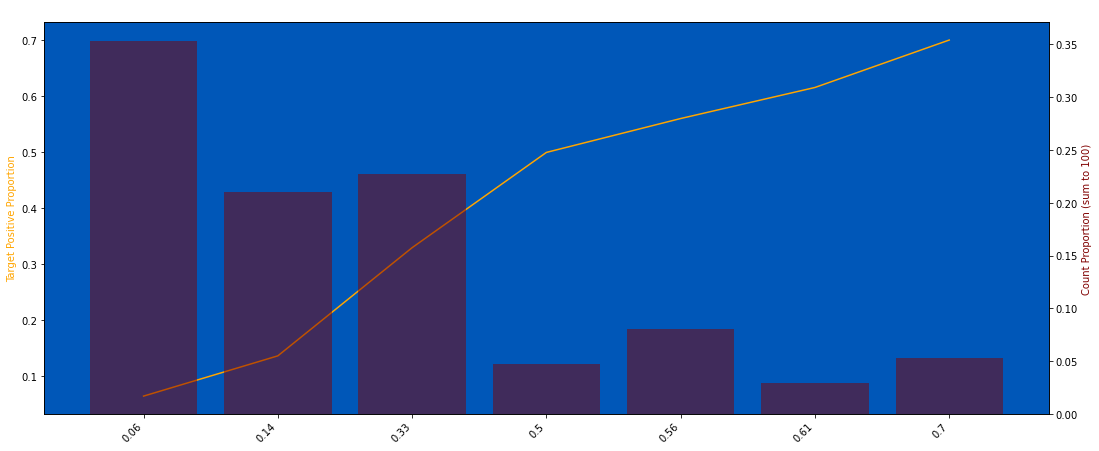

In [188]:
plot_target_check(train, "B_38", q=50, use_raw_bin=True, nunique_thr=50, strfy_x=True, without_drop_tail=True)

In [189]:
for df in df_list:
    df["B_38"] = df["B_38"].astype("category").cat.codes
    df["B_38"] = df["B_38"].replace(-1, 0)

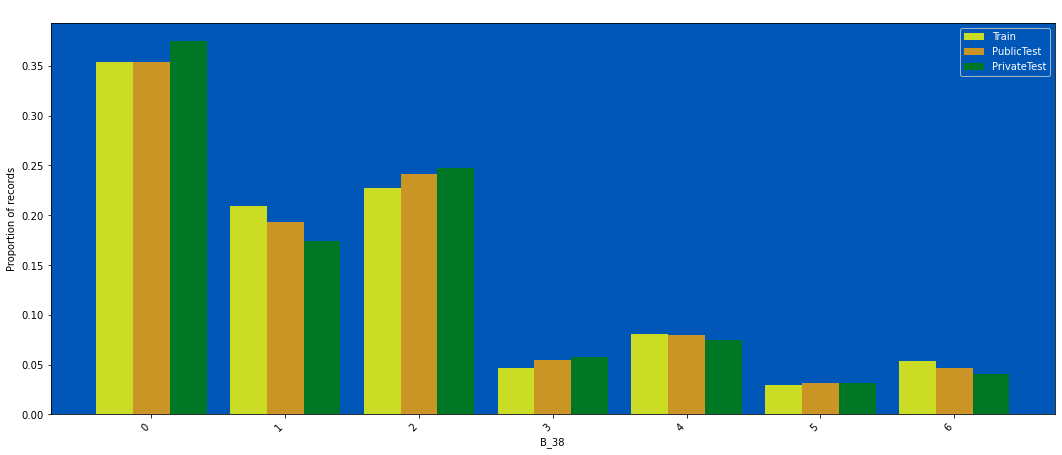

In [190]:
plot_train_test_distribution(df_list, "B_38", nunique_thr=1000, without_drop_tail=True)

### B_39

5497819 null count, 0.994 null proportion
0.2473 of the targets have label = 1


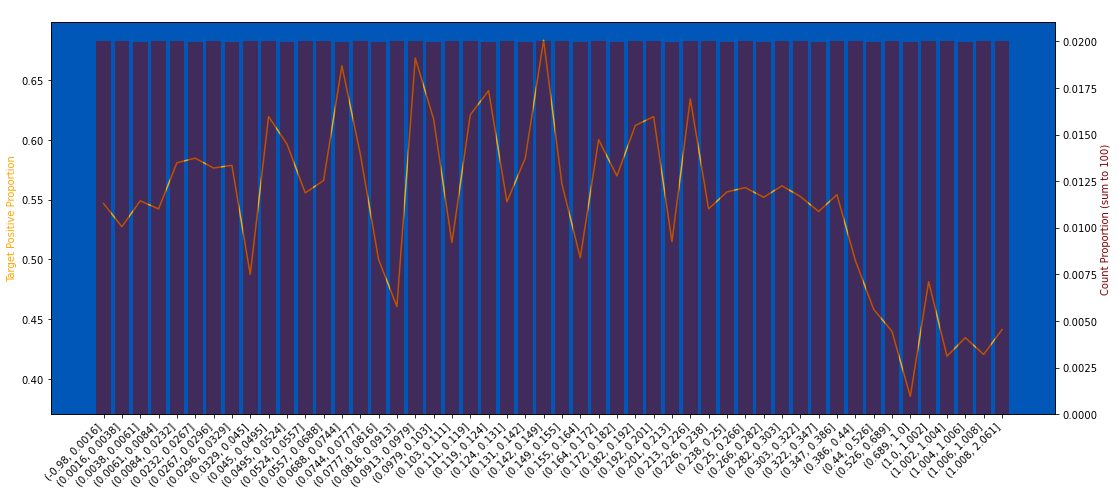

In [191]:
plot_target_check(train, "B_39", q=50, use_raw_bin=True)

In [192]:
%%time
df_list = round_dfs(df_list, col="B_39", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 203 ms, sys: 964 ms, total: 1.17 s
Wall time: 2.29 s


5497819 null count, 0.994 null proportion
0.2473 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


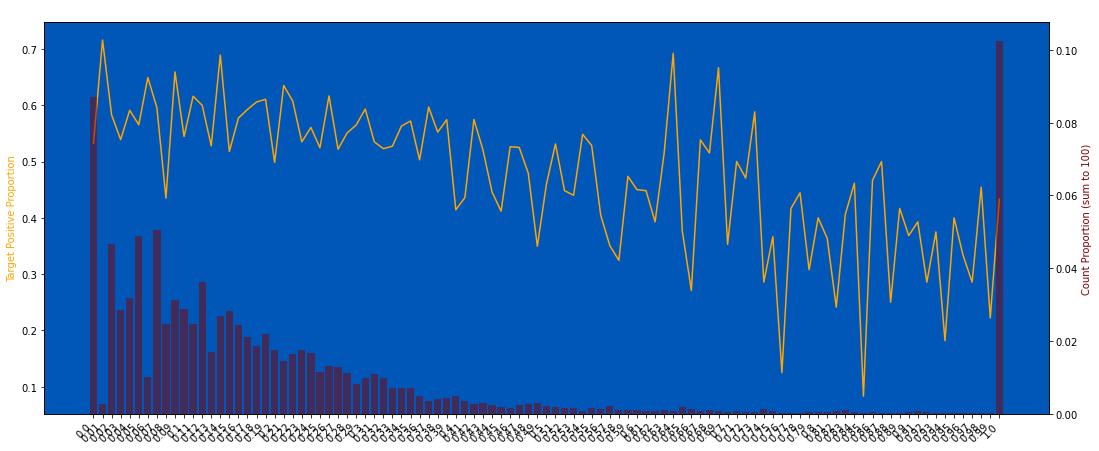

In [193]:
plot_target_check(train, "B_39", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


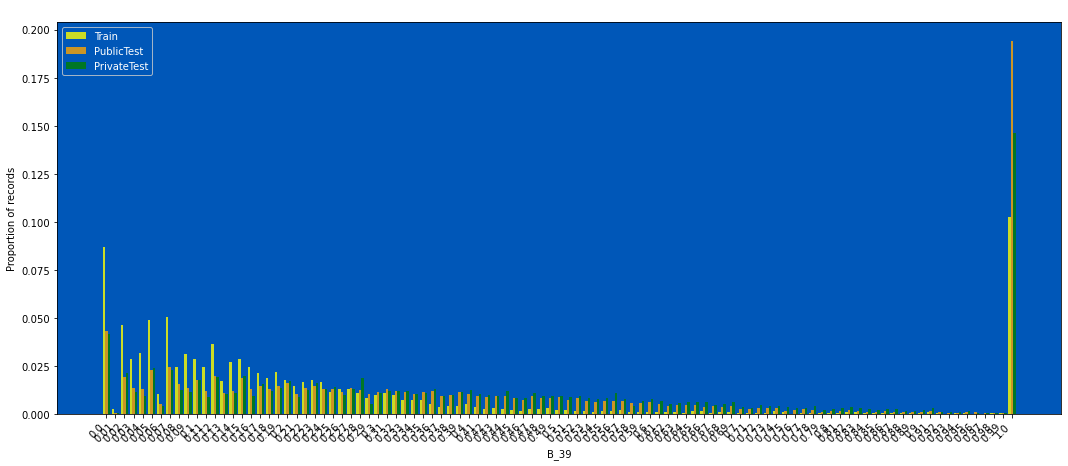

In [194]:
plot_train_test_distribution(df_list, "B_39", nunique_thr=1000)

In [195]:
for df in df_list:
    df.drop(columns=["B_39"], errors="ignore", inplace=True)

### B_40

53 null count, 0.000 null proportion
0.1698 of the targets have label = 1


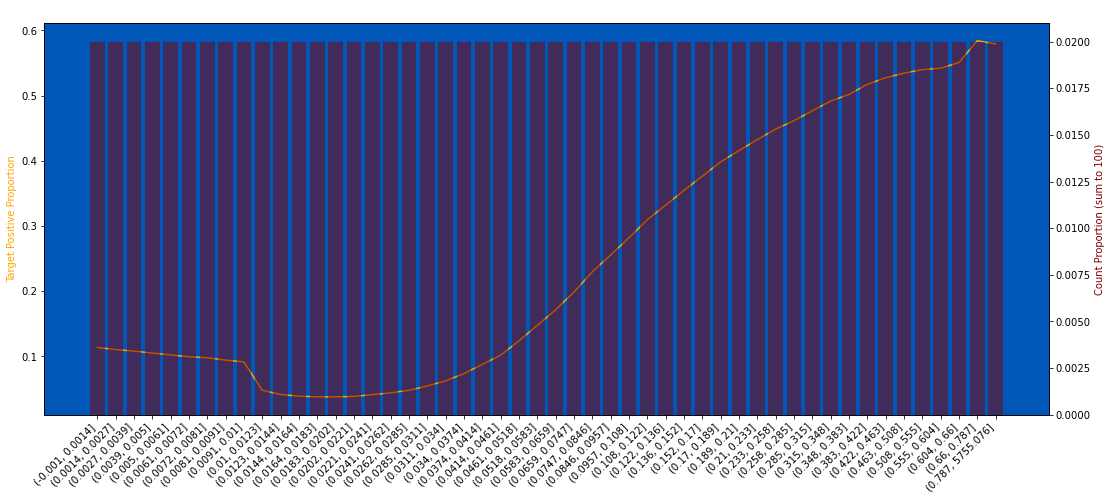

In [196]:
plot_target_check(train, "B_40", q=50, use_raw_bin=True)

In [197]:
%%time
df_list = round_dfs(df_list, col="B_40", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 363 ms, sys: 1.36 s, total: 1.72 s
Wall time: 2.64 s


53 null count, 0.000 null proportion
0.1698 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


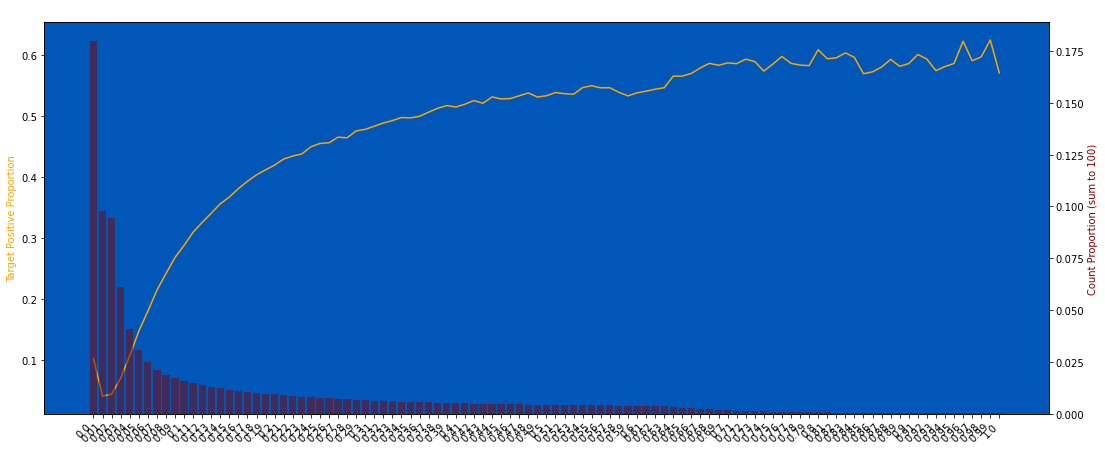

In [198]:
plot_target_check(train, "B_40", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


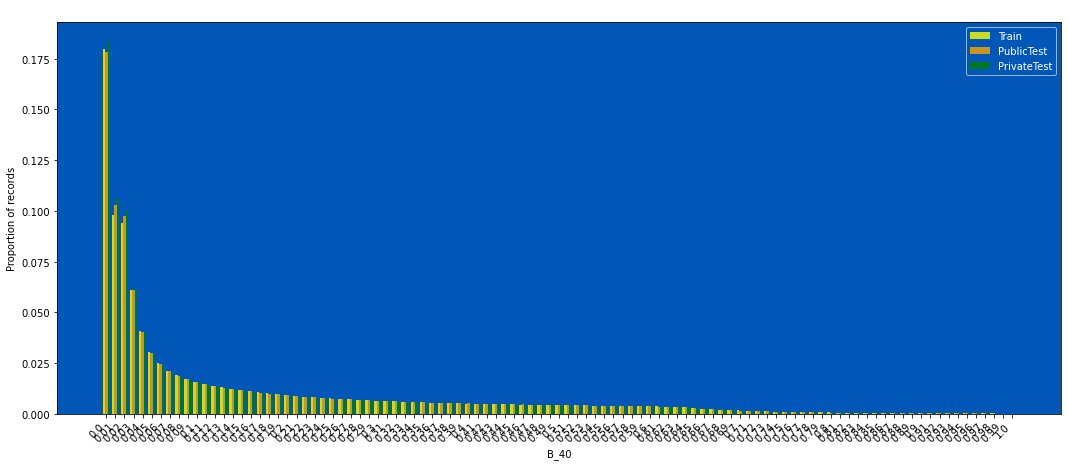

In [199]:
plot_train_test_distribution(df_list, "B_40", nunique_thr=5000)

### B_41

690 null count, 0.000 null proportion
0.1420 of the targets have label = 1


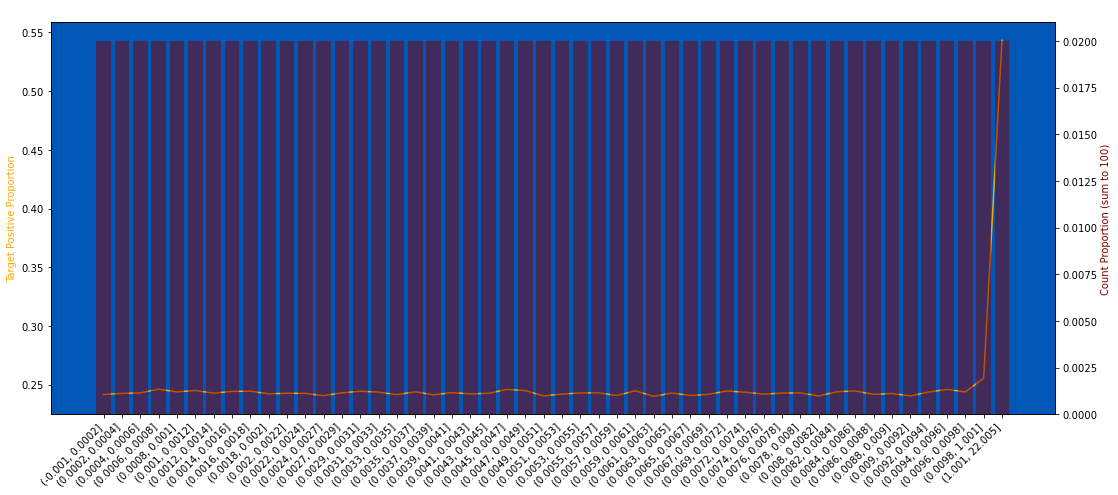

In [200]:
plot_target_check(train, "B_41", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True)

In [201]:
%%time
df_list = round_dfs(df_list, col="B_41", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 356 ms, sys: 1.32 s, total: 1.68 s
Wall time: 2.6 s


690 null count, 0.000 null proportion
0.1420 of the targets have label = 1


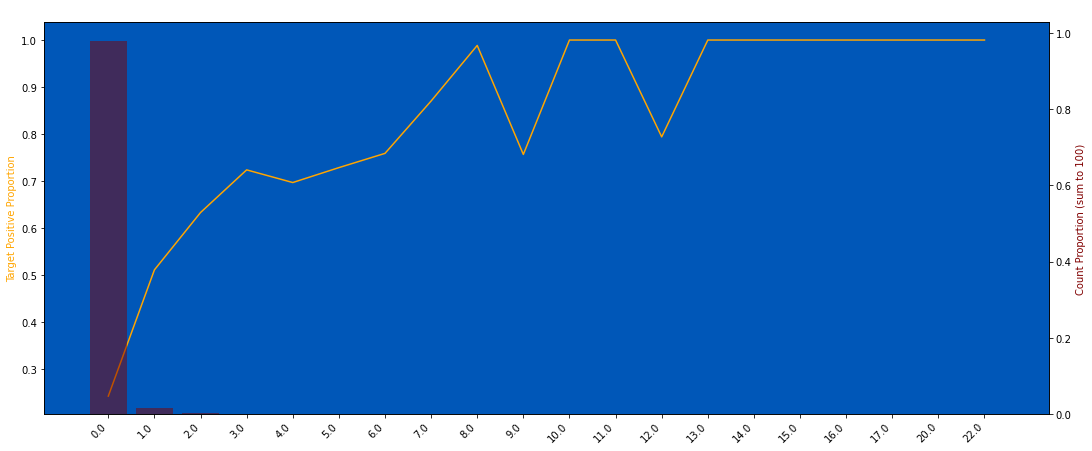

In [202]:
plot_target_check(train, "B_41", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True, without_drop_tail=True)

In [203]:
for df in df_list:
    df["B_41"] = np.where(df["B_41"] > 3, 3, df["B_41"])

690 null count, 0.000 null proportion
0.1420 of the targets have label = 1


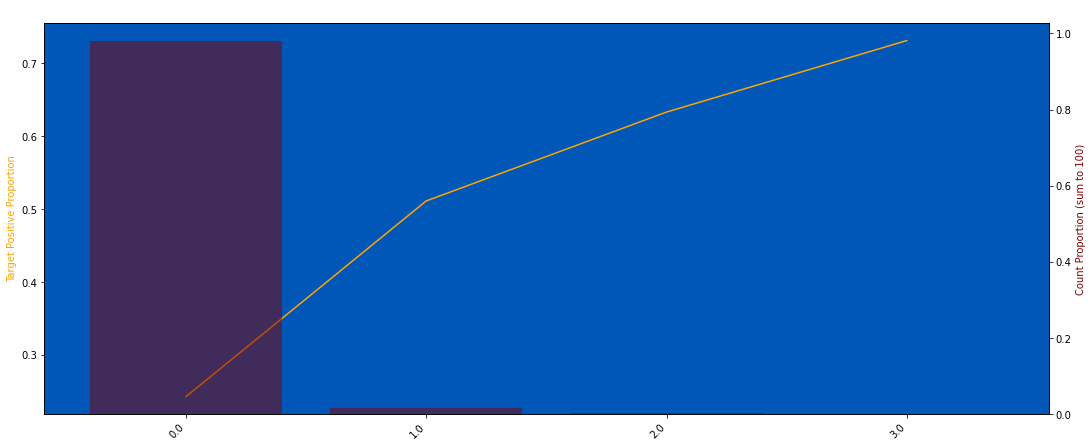

In [204]:
plot_target_check(train, "B_41", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True, without_drop_tail=True)

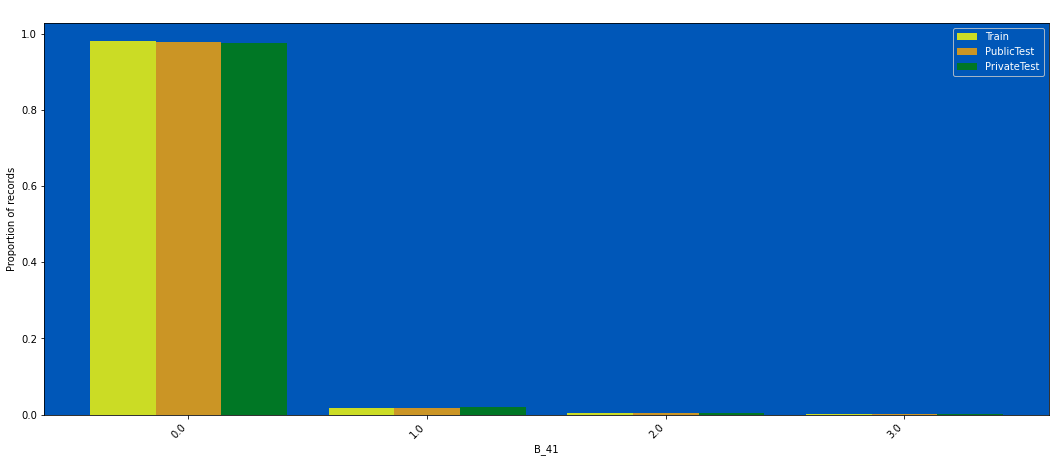

In [205]:
plot_train_test_distribution(df_list, "B_41", nunique_thr=100, without_drop_tail=True)

### B_42

5459973 null count, 0.987 null proportion
0.2508 of the targets have label = 1


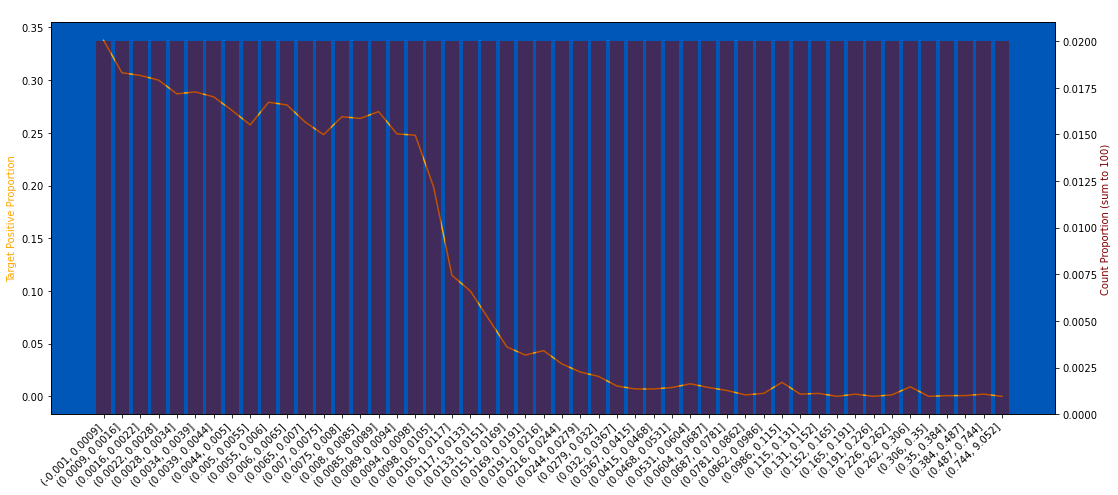

In [206]:
plot_target_check(train, "B_42", q=50, use_raw_bin=True)

In [207]:
%%time
df_list = round_dfs(df_list, col="B_42", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 374 ms, sys: 1.46 s, total: 1.83 s
Wall time: 3 s


5459973 null count, 0.987 null proportion
0.2508 of the targets have label = 1


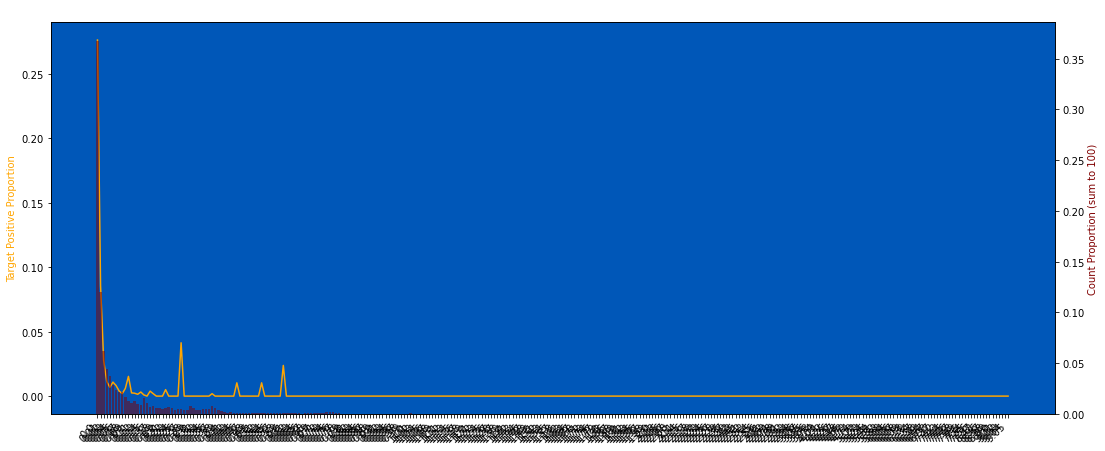

In [208]:
plot_target_check(train, "B_42", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


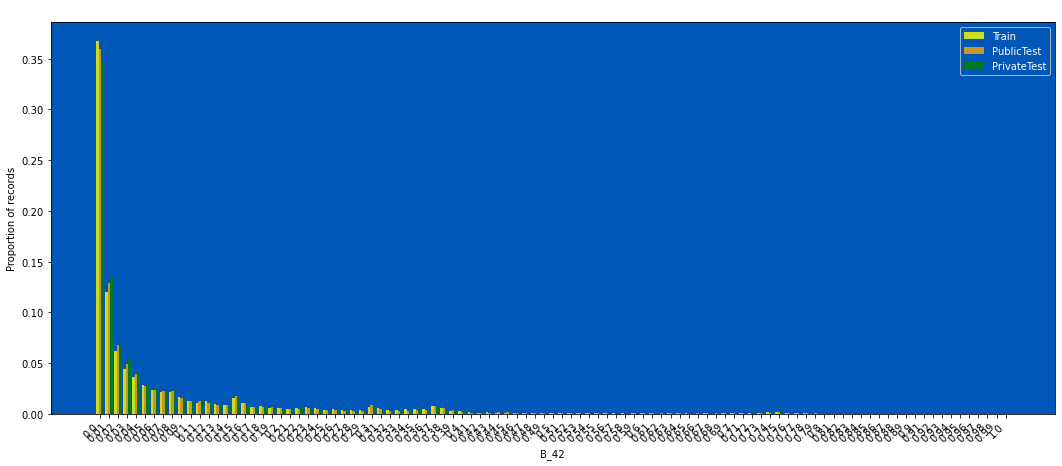

In [209]:
plot_train_test_distribution(df_list, "B_42", nunique_thr=300)

### Column checking

In [211]:
from tqdm import tqdm

In [212]:
no_use_features = ["temp"] + df_list[0].columns[df_list[0].columns.str.endswith("_")].tolist()
no_use_features

['temp', 'B_16_', 'B_18_', 'B_19_', 'B_20_', 'B_21_', 'B_24_']

In [213]:
%%time
for df in tqdm(df_list):
    df.drop(columns=no_use_features, errors="ignore", inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.34it/s]

CPU times: user 749 ms, sys: 1.46 s, total: 2.21 s
Wall time: 2.27 s


In [214]:
all_columns = get_cols(df_list[0], ["B_"])
print(all_columns)

['B_1', 'B_2', 'B_3', 'B_4', 'B_5', 'B_6', 'B_7', 'B_8', 'B_9', 'B_10', 'B_11', 'B_12', 'B_13', 'B_14', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'B_21', 'B_22', 'B_23', 'B_24', 'B_25', 'B_26', 'B_27', 'B_28', 'B_29', 'B_30', 'B_31', 'B_32', 'B_33', 'B_36', 'B_37', 'B_38', 'B_40', 'B_41', 'B_42']


In [215]:
d_col_nunique = df_list[0][all_columns].nunique()
less_unique_d_cols = d_col_nunique[d_col_nunique < 99].index.tolist()
for d in less_unique_d_cols:
    if df_list[0][d].dtype != np.int32:
        print(d, ":", df_list[0][d].dtype, "\n", sorted(df_list[0][d].unique().tolist()), "\n")

B_8 : float64 
 [0.0, 1.0, nan] 

B_16 : float64 
 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, nan] 

B_18 : float64 
 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 20.0] 

B_19 : float64 
 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, nan] 

B_20 : float64 
 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, nan] 

B_22 : float64 
 [0.0, 1.0, 2.0, 3.0, nan, 4.0, 5.0, 6.0, 7.0] 

B_27 : int64 
 [0, 1] 

B_30 : float64 
 [0.0, 1.0, 2.0, nan] 

B_31 : int64 
 [0, 1] 

B_32 : float64 
 [0.0, 1.0] 

B_33 : float64 
 [0.0, 1.0, nan] 

B_36 : int64 
 [0, 1] 

B_38 : int8 
 [0, 1, 2, 3, 4, 5, 6] 

B_41 : float64 
 [0.0, 1.0, nan, 2.0, 3.0] 



In [216]:
cols = list(
    set(less_unique_d_cols)
)

In [217]:
for col in tqdm(cols):
    for df in df_list:
        df[col] = integerize(df[col])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:06<00:00,  2.15it/s]


In [218]:
%%time
train = df_list[0]
test = pd.concat(df_list[1:], axis=0)
test = test.sort_values(by=["customer_ID", "S_2"]).reset_index(drop=True)

CPU times: user 4.62 s, sys: 4.44 s, total: 9.07 s
Wall time: 12.2 s


In [219]:
train.shape, test.shape

((5531451, 42), (11363762, 41))

In [220]:
float64_columns = train.select_dtypes("float64").columns.tolist()
for col in float64_columns:
    temp = df_list[-1][col].astype(np.float32).values
    if (temp - df_list[-1][col]).abs().max() < 1e-4:
        print(f"{col} fulfill criteria to convert to float32")
        for df in df_list:
            df[col] = df[col].astype(np.float32)

B_1 fulfill criteria to convert to float32
B_2 fulfill criteria to convert to float32
B_3 fulfill criteria to convert to float32
B_4 fulfill criteria to convert to float32
B_5 fulfill criteria to convert to float32
B_6 fulfill criteria to convert to float32
B_7 fulfill criteria to convert to float32
B_9 fulfill criteria to convert to float32
B_10 fulfill criteria to convert to float32
B_11 fulfill criteria to convert to float32
B_12 fulfill criteria to convert to float32
B_13 fulfill criteria to convert to float32
B_14 fulfill criteria to convert to float32
B_15 fulfill criteria to convert to float32
B_17 fulfill criteria to convert to float32
B_23 fulfill criteria to convert to float32
B_24 fulfill criteria to convert to float32
B_25 fulfill criteria to convert to float32
B_26 fulfill criteria to convert to float32
B_28 fulfill criteria to convert to float32
B_29 fulfill criteria to convert to float32
B_37 fulfill criteria to convert to float32
B_40 fulfill criteria to convert to floa

In [221]:
for d in tqdm(all_columns):
    for df in df_list:
        df[d] = df[d].fillna(-127)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:01<00:00, 30.61it/s]


In [222]:
%%time
train.to_parquet(f"{INTERIM_TRAIN_PARQUET_PATH}/balance2.parquet")
test.to_parquet(f"{INTERIM_TEST_PARQUET_PATH}/balance2.parquet")

CPU times: user 10.9 s, sys: 1.11 s, total: 12.1 s
Wall time: 10.9 s


In [223]:
test.shape

(11363762, 41)

In [224]:
END = time.time()

In [225]:
print(f"{END - START:.2f} seconds elapsed")

400.60 seconds elapsed


In [226]:
t = read_file(f"{INTERIM_TRAIN_PARQUET_PATH}/balance2.parquet", replace_negative127=False)

Shape of data: (5531451, 42)
